In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [5]:
dfe = df.copy()

dfe['sex'] = enc.fit_transform(df['sex'])
dfe['smoker'] = enc.fit_transform(df['smoker'])
dfe['region'] = enc.fit_transform(df['region'])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dfe.drop('charges', axis=1), dfe['charges'],\
                                                    test_size=0.2, random_state=42)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import SGD

In [9]:
from tensorflow.keras.backend import sqrt as Ksqrt
from tensorflow.keras.backend import mean as Kmean
from tensorflow.keras.backend import square as Ksquare

In [10]:
def root_mean_squared_error(y_true, y_pred):
        return Ksqrt(Kmean(Ksquare(y_pred - y_true))) 

In [11]:
def check_min_max(y_pred):
    print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred), np.min(y_pred)))
    print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

In [12]:
def epoc_plots(hist):
    fig, axs = plt.subplots(3, 1, figsize=(15,18))
    #1st plot
    axs[0].plot(hist.history['loss'], label='loss')
    axs[0].plot(hist.history['val_loss'], label='val_loss')
    axs[0].set_xlabel('Epocs', fontsize=12)
    axs[0].set_ylabel('Root Mean Squared Error (loss)', fontsize=12)
    axs[0].legend(loc='upper right', fontsize=12)

    #2nd plot 
    axs[1].plot(hist.history['mae'], label='mae')
    axs[1].plot(hist.history['val_mae'], label='val_mae')
    axs[1].set_xlabel('Epocs', fontsize=12)
    axs[1].set_ylabel('Mean Absolute Error', fontsize=12)
    axs[1].legend(loc='upper right', fontsize=12)

    #3rd plot 
    axs[2].plot(hist.history['mse'], label='mse')
    axs[2].plot(hist.history['val_mse'], label='val_mse')
    axs[2].set_xlabel('Epocs', fontsize=12)
    axs[2].set_ylabel('Mean Squared Error', fontsize=12)
    axs[2].legend(loc='upper right', fontsize=12)

    plt.tight_layout()

In [13]:
def regression_plots(y_pred, model):
    fig, axs = plt.subplots(2, 1, figsize=(15,12))
    #1st plot
    sns.scatterplot(model.predict(X_train).reshape(-1), y_train, ax=axs[0])
    axs[0].set_xlabel('Predicted Values', fontsize=12)
    axs[0].set_ylabel('Actual Values', fontsize=12)
    sns.lineplot(model.predict(X_train).reshape(-1), model.predict(X_train).reshape(-1), color='red', ax=axs[0])
    axs[0].set_title('Predictions for train data', fontsize=15)

    #2nd plot 
    sns.scatterplot(y_pred.reshape(-1), y_test, ax=axs[1])
    axs[1].set_xlabel('Predicted Values', fontsize=12)
    axs[1].set_ylabel('Actual Values', fontsize=12)
    sns.lineplot(y_pred.reshape(-1), y_pred.reshape(-1), color='red', ax=axs[1])
    axs[1].set_title('Predictions for test data', fontsize=15)

    plt.tight_layout()

In [14]:
# so I did some learning 
# and learnt about exploding and vanishing gradients 
# I suspect that these might be the reasons why 
# my NNs were not learning
# so some of the possible solutions for avoiding them are as follows:
# 1) try a leaky relu a.f. 
# 2) fix the weight inits properly to avoid gradient collapse 


# let me try the leaky relu a.f. first and see if a model which 
# wasn't learning before starts learning now

In [19]:
# lets try leaky relu on model29 arch

In [23]:
from tensorflow.keras.layers import LeakyReLU

In [24]:
# param count: 416,476
model34 = Sequential() 

model34.add(Dense(100, input_dim=6, activation=LeakyReLU(0.1), kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(20):
    model34.add(Dense(100, activation=LeakyReLU(0.1), kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(20):
    model34.add(Dense(75, activation=LeakyReLU(0.1), kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(30):
    model34.add(Dense(50, activation=LeakyReLU(0.1), kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(30):
    model34.add(Dense(25, activation=LeakyReLU(0.1), kernel_initializer='random_normal', bias_initializer='zeros'))
model34.add(Dense(1, activation=LeakyReLU(0.1), kernel_initializer='random_normal', bias_initializer='zeros'))

model34.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [27]:
history34 = model34.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 6s 396ms/step - loss: 17885.2227 - mse: 325472480.0000 - mae: 13518.7197 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 2/300
14/14 [==============================] - 1s 59ms/step - loss: 17943.0723 - mse: 325472448.0000 - mae: 13518.7188 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 3/300
14/14 [==============================] - 1s 66ms/step - loss: 17885.3652 - mse: 325472448.0000 - mae: 13518.7178 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 4/300
14/14 [==============================] - 1s 49ms/step - loss: 17965.7578 - mse: 325472448.0000 - mae: 13518.7188 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 5/300
14/14 [==============================] - 1s 52ms/step - loss: 17960.7363 - mse: 325472416.0000 - mae: 13518.7178 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 6/300
14/14 [

Epoch 43/300
14/14 [==============================] - 1s 48ms/step - loss: 17957.0977 - mse: 325472096.0000 - mae: 13518.7041 - val_loss: 17593.4609 - val_mse: 310368512.0000 - val_mae: 12655.5654
Epoch 44/300
14/14 [==============================] - 1s 39ms/step - loss: 17959.6758 - mse: 325472128.0000 - mae: 13518.7061 - val_loss: 17593.4609 - val_mse: 310368480.0000 - val_mae: 12655.5654
Epoch 45/300
14/14 [==============================] - 1s 65ms/step - loss: 17884.6211 - mse: 325472096.0000 - mae: 13518.7041 - val_loss: 17593.4609 - val_mse: 310368480.0000 - val_mae: 12655.5654
Epoch 46/300
14/14 [==============================] - 1s 45ms/step - loss: 17962.4434 - mse: 325472096.0000 - mae: 13518.7021 - val_loss: 17593.4590 - val_mse: 310368448.0000 - val_mae: 12655.5654
Epoch 47/300
14/14 [==============================] - 1s 39ms/step - loss: 17974.2676 - mse: 325472064.0000 - mae: 13518.7021 - val_loss: 17593.4590 - val_mse: 310368448.0000 - val_mae: 12655.5645
Epoch 48/300
14

14/14 [==============================] - 1s 73ms/step - loss: 17954.0391 - mse: 325470560.0000 - mae: 13518.6465 - val_loss: 17593.4180 - val_mse: 310367040.0000 - val_mae: 12655.5078
Epoch 126/300
14/14 [==============================] - 1s 36ms/step - loss: 17950.7715 - mse: 325470528.0000 - mae: 13518.6436 - val_loss: 17593.4160 - val_mse: 310366944.0000 - val_mae: 12655.5049
Epoch 127/300
14/14 [==============================] - 1s 72ms/step - loss: 17970.4727 - mse: 325470496.0000 - mae: 13518.6445 - val_loss: 17593.4141 - val_mse: 310366944.0000 - val_mae: 12655.5039
Epoch 128/300
14/14 [==============================] - 1s 67ms/step - loss: 17961.4727 - mse: 325470432.0000 - mae: 13518.6426 - val_loss: 17593.4141 - val_mse: 310366912.0000 - val_mae: 12655.5020
Epoch 129/300
14/14 [==============================] - 1s 68ms/step - loss: 17904.3262 - mse: 325470368.0000 - mae: 13518.6406 - val_loss: 17593.4141 - val_mse: 310366848.0000 - val_mae: 12655.5010
Epoch 130/300
14/14 [===

14/14 [==============================] - 1s 37ms/step - loss: 17974.8594 - mse: 325459200.0000 - mae: 13518.2275 - val_loss: 17593.1094 - val_mse: 310356192.0000 - val_mae: 12655.0791
Epoch 208/300
14/14 [==============================] - 1s 39ms/step - loss: 17976.1387 - mse: 325458784.0000 - mae: 13518.2100 - val_loss: 17593.0977 - val_mse: 310355744.0000 - val_mae: 12655.0635
Epoch 209/300
14/14 [==============================] - 0s 32ms/step - loss: 17910.2188 - mse: 325458368.0000 - mae: 13518.1953 - val_loss: 17593.0859 - val_mse: 310355360.0000 - val_mae: 12655.0469
Epoch 210/300
14/14 [==============================] - 0s 33ms/step - loss: 17992.3926 - mse: 325457856.0000 - mae: 13518.1768 - val_loss: 17593.0742 - val_mse: 310354880.0000 - val_mae: 12655.0283
Epoch 211/300
14/14 [==============================] - 0s 33ms/step - loss: 17966.4238 - mse: 325457376.0000 - mae: 13518.1572 - val_loss: 17593.0586 - val_mse: 310354400.0000 - val_mae: 12655.0098
Epoch 212/300
14/14 [===

14/14 [==============================] - 1s 49ms/step - loss: 17931.0527 - mse: 324780992.0000 - mae: 13493.1328 - val_loss: 17574.3652 - val_mse: 309696576.0000 - val_mae: 12628.9922
Epoch 290/300
14/14 [==============================] - 1s 38ms/step - loss: 17943.6758 - mse: 324731392.0000 - mae: 13491.2939 - val_loss: 17572.9805 - val_mse: 309648000.0000 - val_mae: 12627.0674
Epoch 291/300
14/14 [==============================] - 1s 45ms/step - loss: 17912.6191 - mse: 324677984.0000 - mae: 13489.2988 - val_loss: 17571.4844 - val_mse: 309595328.0000 - val_mae: 12624.9834
Epoch 292/300
14/14 [==============================] - 1s 41ms/step - loss: 17899.0742 - mse: 324619584.0000 - mae: 13487.1387 - val_loss: 17569.8652 - val_mse: 309538496.0000 - val_mae: 12622.7305
Epoch 293/300
14/14 [==============================] - 1s 37ms/step - loss: 17879.5625 - mse: 324555872.0000 - mae: 13484.7988 - val_loss: 17568.1035 - val_mse: 309476480.0000 - val_mae: 12620.2754
Epoch 294/300
14/14 [===

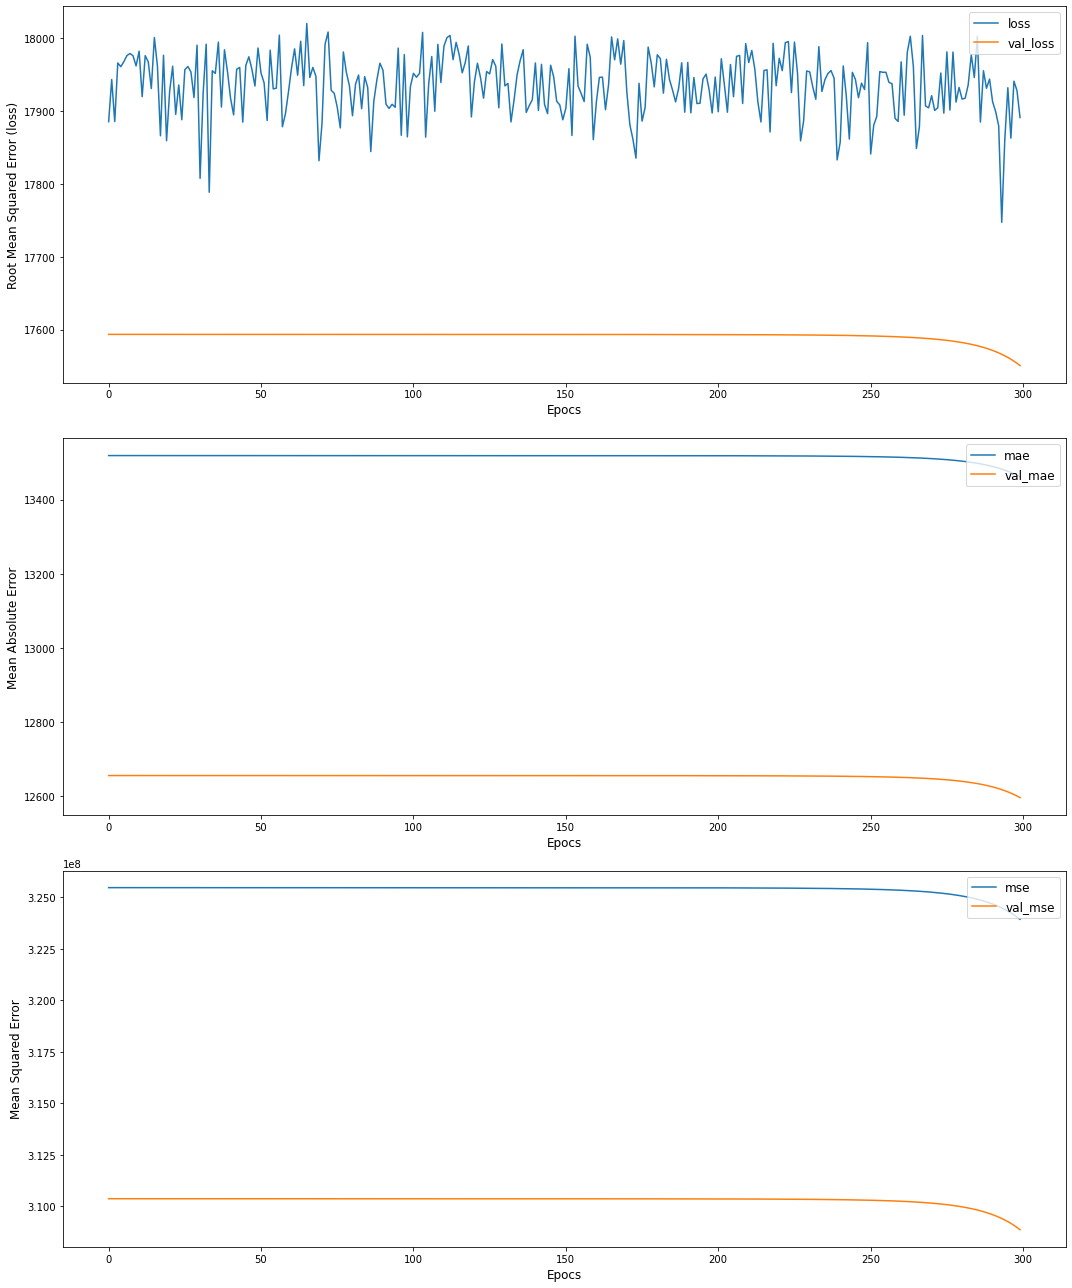

In [28]:
epoc_plots(history34)

In [32]:
# huh, ngl I was expecting it to perform slighlty better than THAT
# lets try weight init

# I tried few different weight inits, and they didn't work
# then I found out that the default kernel init is the 
# Xavier Norm, so I tried it below

In [48]:
# param count: 416,476
model35 = Sequential() 

model35.add(Dense(100, input_dim=6, activation=LeakyReLU(0.3), bias_initializer='zeros'))
for i in range(20):
    model35.add(Dense(100, activation=LeakyReLU(0.3), bias_initializer='zeros'))
for i in range(20):
    model35.add(Dense(75, activation=LeakyReLU(0.3), bias_initializer='zeros'))
for i in range(30):
    model35.add(Dense(50, activation=LeakyReLU(0.3), bias_initializer='zeros'))
for i in range(30):
    model35.add(Dense(25, activation=LeakyReLU(0.3), bias_initializer='zeros'))
model35.add(Dense(1, activation=LeakyReLU(0.3), bias_initializer='zeros'))

model35.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [49]:
history35 = model35.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 5s 333ms/step - loss: 17983.0039 - mse: 325470752.0000 - mae: 13518.6543 - val_loss: 17593.3242 - val_mse: 310363712.0000 - val_mae: 12655.3760
Epoch 2/300
14/14 [==============================] - 1s 45ms/step - loss: 17939.7422 - mse: 325449568.0000 - mae: 13517.8975 - val_loss: 17590.5605 - val_mse: 310266400.0000 - val_mae: 12651.5312
Epoch 3/300
14/14 [==============================] - 1s 53ms/step - loss: 17438.0684 - mse: 307431936.0000 - mae: 13059.4062 - val_loss: 12399.0576 - val_mse: 154227120.0000 - val_mae: 7513.6587
Epoch 4/300
14/14 [==============================] - 1s 61ms/step - loss: 15116.0674 - mse: 232193456.0000 - mae: 10099.8252 - val_loss: 12221.5938 - val_mse: 149647712.0000 - val_mae: 8846.2480
Epoch 5/300
14/14 [==============================] - 1s 64ms/step - loss: 11999.8594 - mse: 145737392.0000 - mae: 9278.1016 - val_loss: 12401.9248 - val_mse: 153960608.0000 - val_mae: 9811.9414
Epoch 6/300
14/14 [====

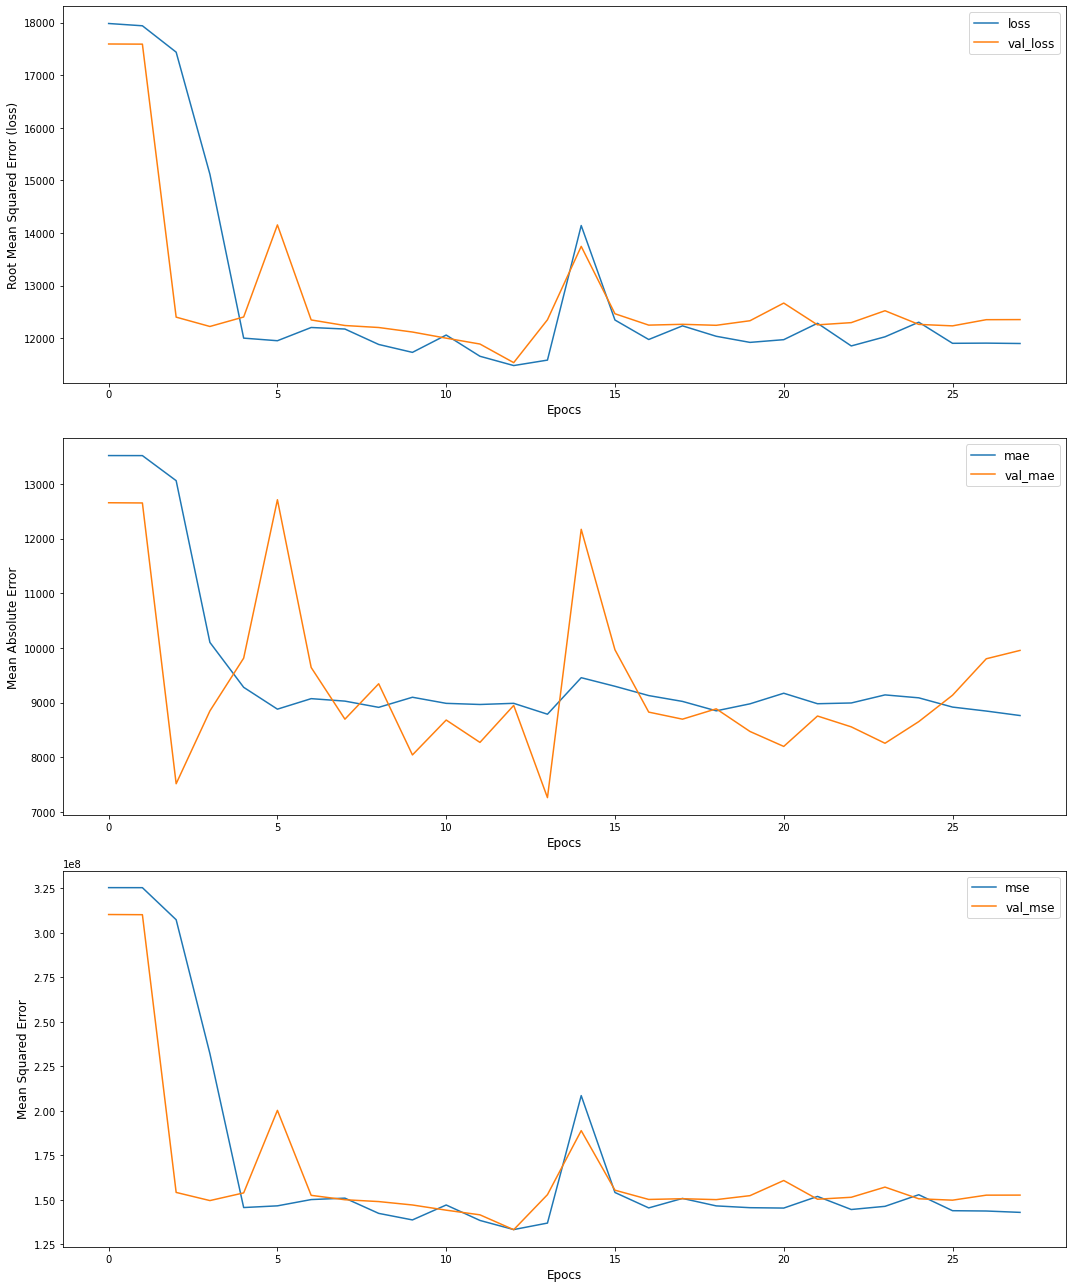

In [50]:
epoc_plots(history35)

In [52]:
y_pred35 = model35.predict(X_test)
r2_score(y_test, y_pred35) 

0.007069502123362437

In [53]:
check_min_max(y_pred35)

Predicted values

max: 15515.5234375
min: 14497.0791015625

Actual values

max: 63770.42801
min: 1131.5066


In [74]:
# welp, that is also not great 
# I found out that Xavier Norm works with tanh activation fucn
# For ReLU (and Leaky ReLU) I found that the
# Variance Scaling is recommended 

In [55]:
from tensorflow.keras.initializers import VarianceScaling

In [ ]:
# the model was not learning even with the variance scaling a.f.
# so I changed the Leaky ReLU alpha param from 0.3 to 0.01
# and voila, the model learns 

In [68]:
# param count: 416,476
model36 = Sequential() 

model36.add(Dense(100, input_dim=6, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(), bias_initializer='zeros'))
for i in range(20):
    model36.add(Dense(100, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(), bias_initializer='zeros'))
for i in range(20):
    model36.add(Dense(75, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(), bias_initializer='zeros'))
for i in range(30):
    model36.add(Dense(50, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(), bias_initializer='zeros'))
for i in range(30):
    model36.add(Dense(25, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(), bias_initializer='zeros'))
model36.add(Dense(1, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(), bias_initializer='zeros'))

model36.compile(loss=root_mean_squared_error, optimizer=Adam(0.0001),
             metrics=['mse', 'mae'])

In [69]:
history36 = model36.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 5s 327ms/step - loss: 17896.2246 - mse: 325472384.0000 - mae: 13518.7139 - val_loss: 17593.4629 - val_mse: 310368576.0000 - val_mae: 12655.5674
Epoch 2/300
14/14 [==============================] - 1s 46ms/step - loss: 17941.3320 - mse: 325472064.0000 - mae: 13518.7031 - val_loss: 17593.4512 - val_mse: 310368224.0000 - val_mae: 12655.5576
Epoch 3/300
14/14 [==============================] - 1s 44ms/step - loss: 17935.8672 - mse: 325471712.0000 - mae: 13518.6895 - val_loss: 17593.4434 - val_mse: 310367904.0000 - val_mae: 12655.5420
Epoch 4/300
14/14 [==============================] - 1s 45ms/step - loss: 17902.6094 - mse: 325471296.0000 - mae: 13518.6748 - val_loss: 17593.4316 - val_mse: 310367456.0000 - val_mae: 12655.5254
Epoch 5/300
14/14 [==============================] - 1s 40ms/step - loss: 17946.3848 - mse: 325470752.0000 - mae: 13518.6543 - val_loss: 17593.4141 - val_mse: 310366912.0000 - val_mae: 12655.5020
Epoch 6/300
14/14 [

Epoch 43/300
14/14 [==============================] - ETA: 0s - loss: 11071.4365 - mse: 123879512.0000 - mae: 8906.15 - 0s 28ms/step - loss: 11231.8506 - mse: 127714352.0000 - mae: 8958.2197 - val_loss: 11398.1436 - val_mse: 130227344.0000 - val_mae: 8588.8086
Epoch 44/300
14/14 [==============================] - 0s 27ms/step - loss: 11171.7227 - mse: 126035352.0000 - mae: 9136.6240 - val_loss: 11366.8584 - val_mse: 129495464.0000 - val_mae: 8868.4287
Epoch 45/300
14/14 [==============================] - 0s 29ms/step - loss: 11174.6055 - mse: 125874120.0000 - mae: 8931.7139 - val_loss: 11373.0117 - val_mse: 129612416.0000 - val_mae: 9208.9023
Epoch 46/300
14/14 [==============================] - 0s 27ms/step - loss: 11240.9941 - mse: 128086744.0000 - mae: 8664.3086 - val_loss: 11342.4922 - val_mse: 128986016.0000 - val_mae: 8353.5010
Epoch 47/300
14/14 [==============================] - 0s 26ms/step - loss: 11168.2344 - mse: 125721096.0000 - mae: 9045.5986 - val_loss: 11273.6084 - val_

Epoch 128/300
14/14 [==============================] - 0s 25ms/step - loss: 5287.9590 - mse: 29353598.0000 - mae: 3279.9775 - val_loss: 4760.7090 - val_mse: 23023468.0000 - val_mae: 2560.8442
Epoch 129/300
14/14 [==============================] - 0s 27ms/step - loss: 4754.8594 - mse: 23575596.0000 - mae: 2731.5398 - val_loss: 4544.8618 - val_mse: 20863194.0000 - val_mae: 2692.5132
Epoch 130/300
14/14 [==============================] - 0s 25ms/step - loss: 4911.3398 - mse: 24559680.0000 - mae: 3099.0735 - val_loss: 5232.1982 - val_mse: 27749164.0000 - val_mae: 3004.3303
Epoch 131/300
14/14 [==============================] - 0s 25ms/step - loss: 4822.9692 - mse: 24041414.0000 - mae: 2773.2424 - val_loss: 4618.8389 - val_mse: 21606254.0000 - val_mae: 2916.5042
Epoch 132/300
14/14 [==============================] - 0s 26ms/step - loss: 4759.6582 - mse: 22997014.0000 - mae: 2735.8320 - val_loss: 4514.9790 - val_mse: 20562874.0000 - val_mae: 2392.0745
Epoch 133/300
14/14 [===================

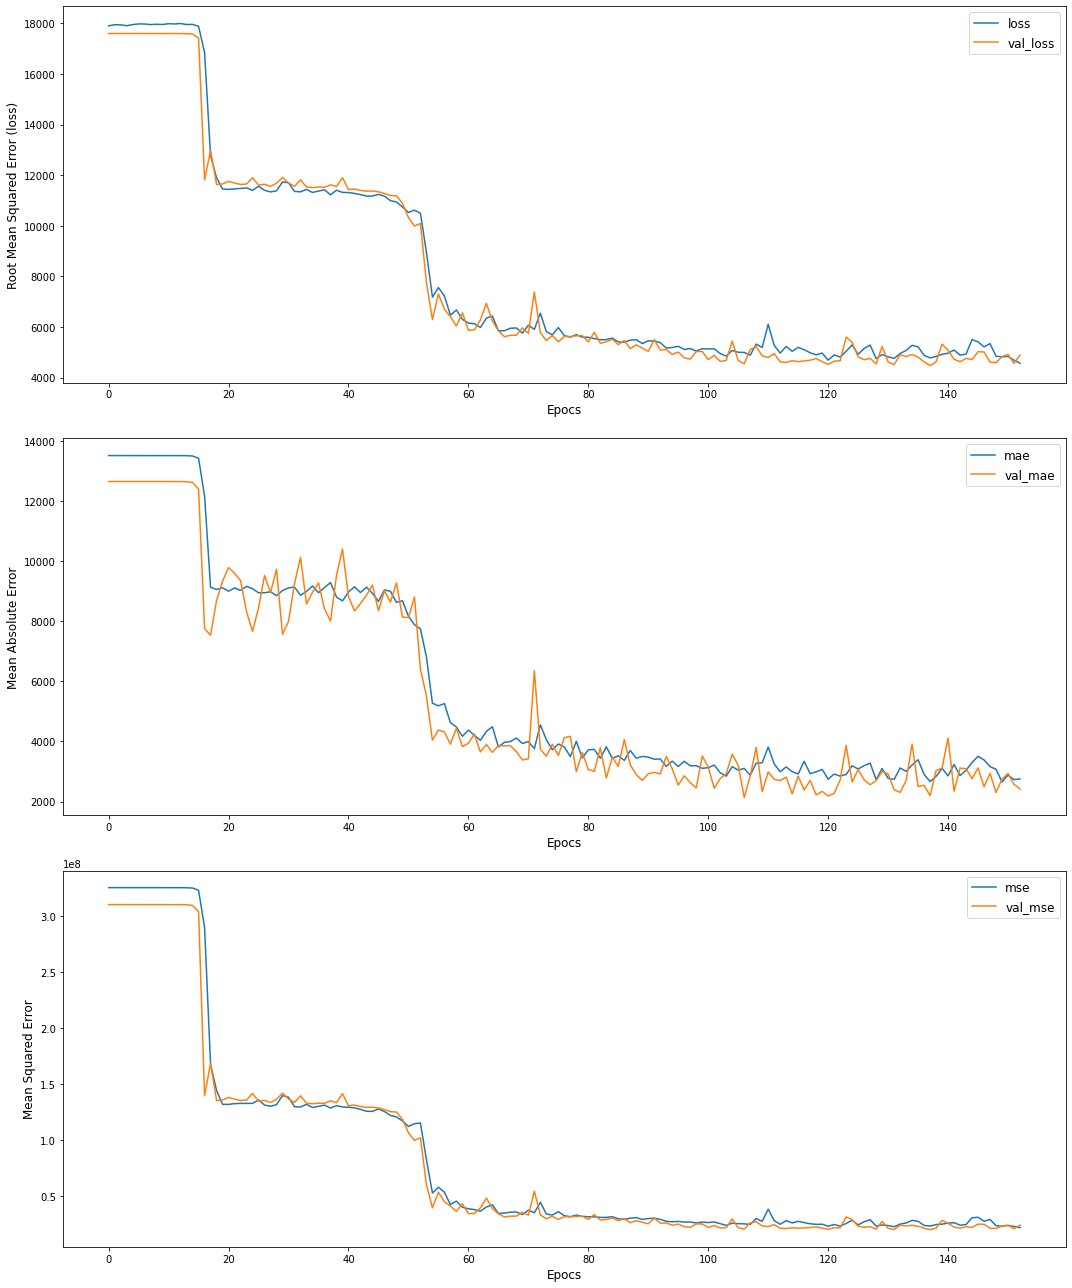

In [70]:
epoc_plots(history36)

In [71]:
y_pred36 = model36.predict(X_test)
r2_score(y_test, y_pred36) 

0.854324926179497

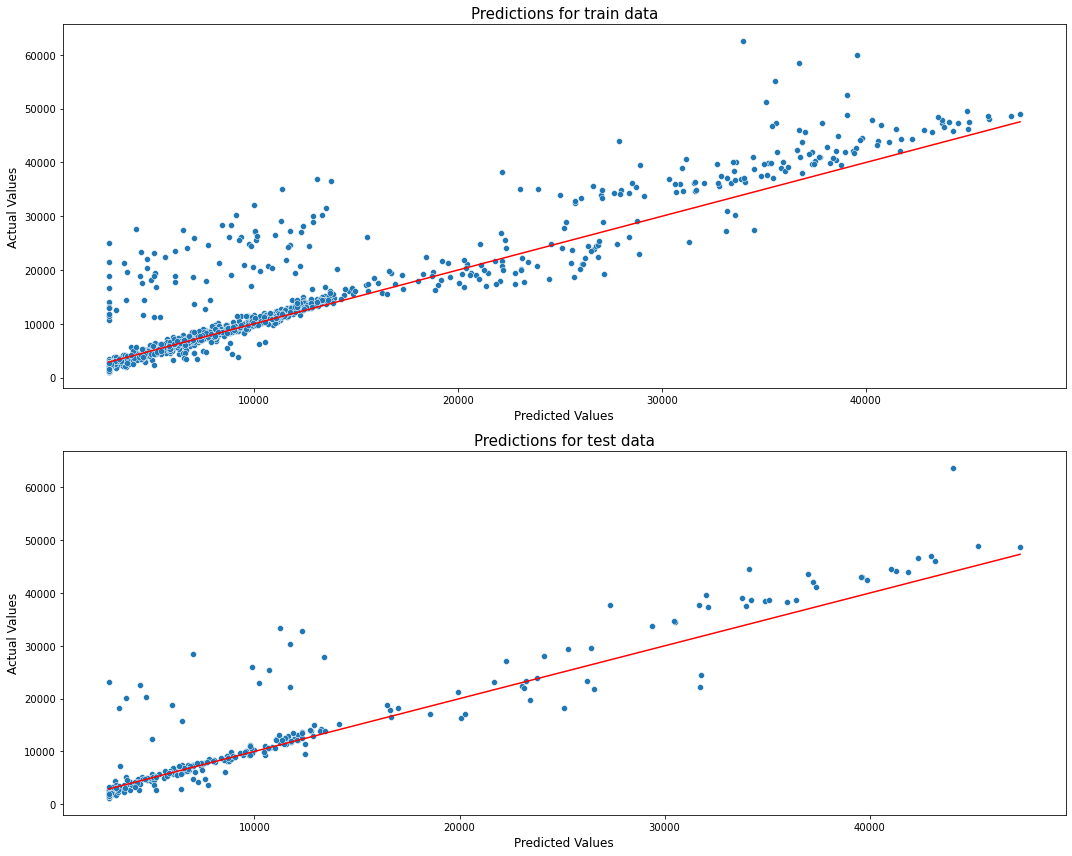

In [72]:
regression_plots(y_pred36, model36)

In [73]:
check_min_max(y_pred36)

Predicted values

max: 47330.765625
min: 2892.6015625

Actual values

max: 63770.42801
min: 1131.5066


In [75]:
# POG!
# the moedls learnt
# now I want to confirm whether it was the combination of 
# LeakyReLU alpha to 0.01 and the Variance Scaling
# or just the alpha was good enough to make the model train

In [76]:
# param count: 416,476
model37 = Sequential() 

model37.add(Dense(100, input_dim=6, activation=LeakyReLU(0.01), bias_initializer='zeros'))
for i in range(20):
    model37.add(Dense(100, activation=LeakyReLU(0.01), bias_initializer='zeros'))
for i in range(20):
    model37.add(Dense(75, activation=LeakyReLU(0.01), bias_initializer='zeros'))
for i in range(30):
    model37.add(Dense(50, activation=LeakyReLU(0.01), bias_initializer='zeros'))
for i in range(30):
    model37.add(Dense(25, activation=LeakyReLU(0.01), bias_initializer='zeros'))
model37.add(Dense(1, activation=LeakyReLU(0.01), bias_initializer='zeros'))

model37.compile(loss=root_mean_squared_error, optimizer=Adam(0.0001),
             metrics=['mse', 'mae'])

In [77]:
history37 = model37.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 4s 261ms/step - loss: 17930.7188 - mse: 325472320.0000 - mae: 13518.7129 - val_loss: 17593.4590 - val_mse: 310368448.0000 - val_mae: 12655.5654
Epoch 2/300
14/14 [==============================] - 1s 53ms/step - loss: 17989.6895 - mse: 325471904.0000 - mae: 13518.6963 - val_loss: 17593.4473 - val_mse: 310368064.0000 - val_mae: 12655.5479
Epoch 3/300
14/14 [==============================] - 1s 38ms/step - loss: 17930.2480 - mse: 325471360.0000 - mae: 13518.6787 - val_loss: 17593.4316 - val_mse: 310367520.0000 - val_mae: 12655.5283
Epoch 4/300
14/14 [==============================] - 1s 37ms/step - loss: 17941.4629 - mse: 325470752.0000 - mae: 13518.6533 - val_loss: 17593.4141 - val_mse: 310366848.0000 - val_mae: 12655.5000
Epoch 5/300
14/14 [==============================] - 1s 41ms/step - loss: 17964.6738 - mse: 325469952.0000 - mae: 13518.6250 - val_loss: 17593.3887 - val_mse: 310365984.0000 - val_mae: 12655.4658
Epoch 6/300
14/14 [

Epoch 43/300
14/14 [==============================] - 1s 78ms/step - loss: 11050.7266 - mse: 124404336.0000 - mae: 8781.8066 - val_loss: 11324.6143 - val_mse: 128501752.0000 - val_mae: 9368.2783
Epoch 44/300
14/14 [==============================] - 0s 35ms/step - loss: 11109.3926 - mse: 126471184.0000 - mae: 8842.1631 - val_loss: 11227.5156 - val_mse: 126345448.0000 - val_mae: 8884.6982
Epoch 45/300
14/14 [==============================] - 0s 29ms/step - loss: 11306.7480 - mse: 128536704.0000 - mae: 8962.7051 - val_loss: 11258.0068 - val_mse: 127005800.0000 - val_mae: 9224.2314
Epoch 46/300
14/14 [==============================] - 1s 73ms/step - loss: 11198.9629 - mse: 126336288.0000 - mae: 8832.1582 - val_loss: 11562.8291 - val_mse: 133914056.0000 - val_mae: 10078.6240
Epoch 47/300
14/14 [==============================] - 1s 53ms/step - loss: 11182.4512 - mse: 126093208.0000 - mae: 8977.0508 - val_loss: 11257.3633 - val_mse: 126980624.0000 - val_mae: 9372.8818
Epoch 48/300
14/14 [====

Epoch 128/300
14/14 [==============================] - 0s 28ms/step - loss: 5180.9473 - mse: 27525734.0000 - mae: 3019.6262 - val_loss: 4742.4683 - val_mse: 22556450.0000 - val_mae: 2290.8801
Epoch 129/300
14/14 [==============================] - 0s 27ms/step - loss: 5060.2578 - mse: 26249888.0000 - mae: 3047.7019 - val_loss: 4546.2612 - val_mse: 20851086.0000 - val_mae: 2431.9622
Epoch 130/300
14/14 [==============================] - 0s 30ms/step - loss: 4632.3833 - mse: 23070746.0000 - mae: 2658.6863 - val_loss: 4605.9697 - val_mse: 21518272.0000 - val_mae: 2168.1882
Epoch 131/300
14/14 [==============================] - 0s 27ms/step - loss: 4920.0239 - mse: 24649926.0000 - mae: 2854.8433 - val_loss: 4709.6226 - val_mse: 22260740.0000 - val_mae: 2577.9199
Epoch 132/300
14/14 [==============================] - 0s 28ms/step - loss: 5166.5762 - mse: 27540890.0000 - mae: 3220.1548 - val_loss: 4683.5322 - val_mse: 22117764.0000 - val_mae: 3503.9629
Epoch 133/300
14/14 [===================

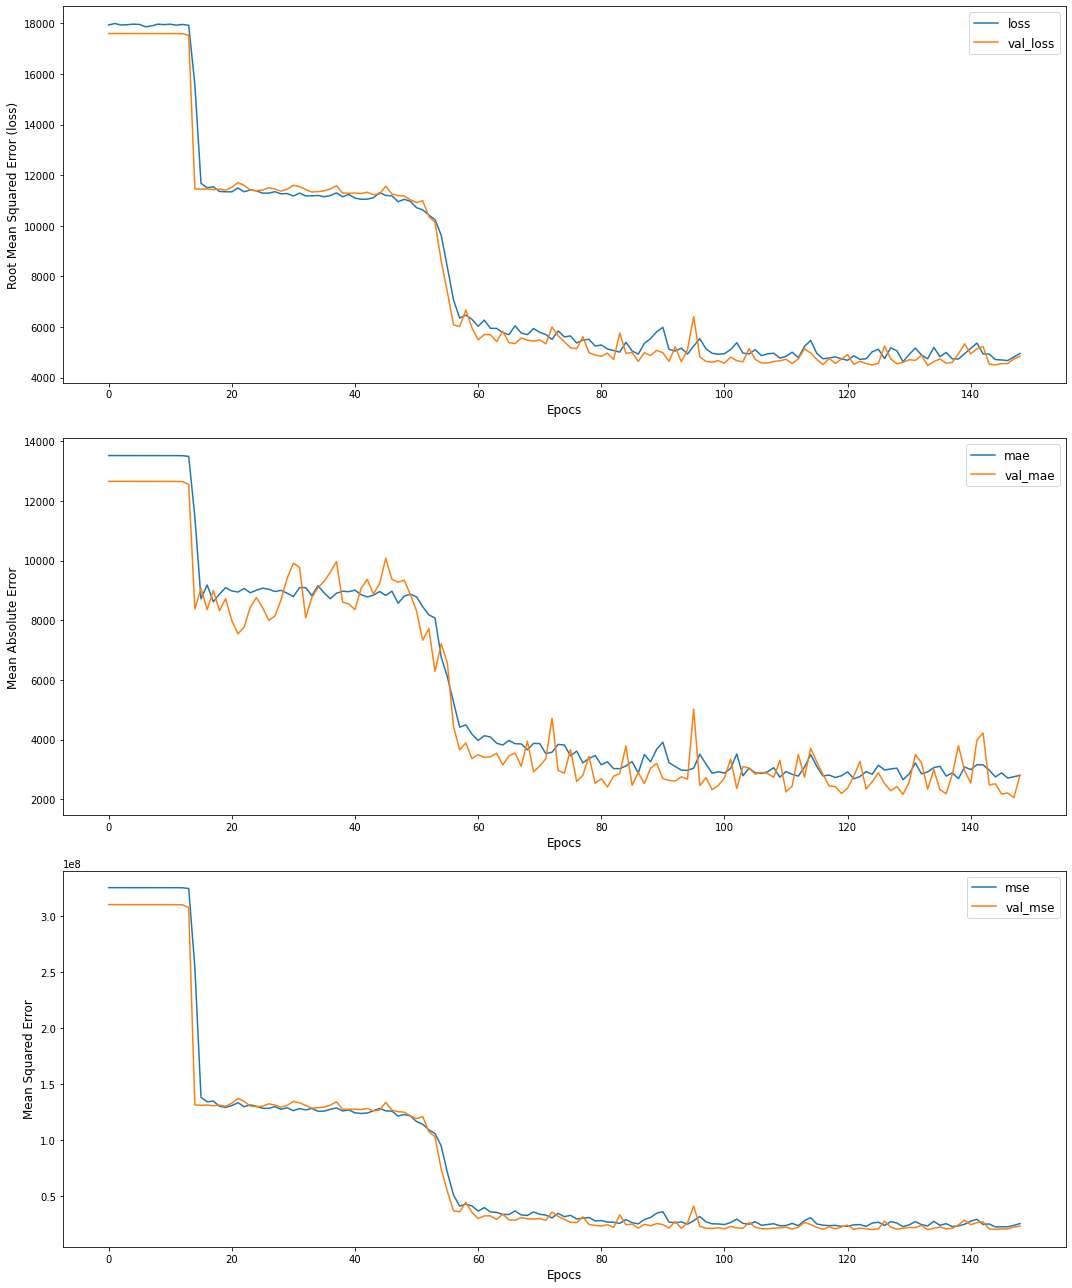

In [78]:
epoc_plots(history37)

In [79]:
y_pred37 = model37.predict(X_test)
r2_score(y_test, y_pred37) 

0.8180408578534704

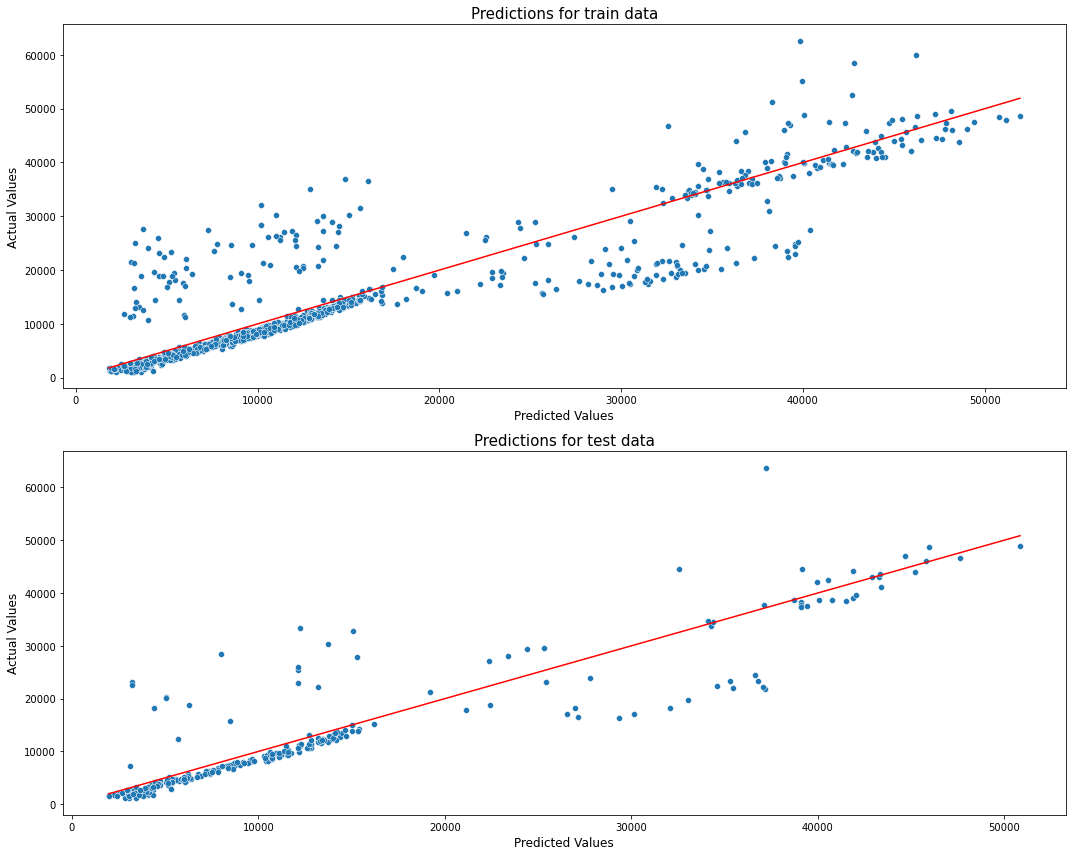

In [80]:
regression_plots(y_pred37, model37)

In [81]:
check_min_max(y_pred37)

Predicted values

max: 50855.03515625
min: 1968.970458984375

Actual values

max: 63770.42801
min: 1131.5066


In [84]:
# hmmm, not terrible 
# but not better 
# let's try the Variance Scaling to scale to 
# something else rather than the default (1 to, say, 2)
# and see how the model performs

In [93]:
# param count: 416,476
model38 = Sequential() 

model38.add(Dense(100, input_dim=6, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=2.0), bias_initializer='zeros'))
for i in range(20):
    model38.add(Dense(100, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=2.0), bias_initializer='zeros'))
for i in range(20):
    model38.add(Dense(75, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=2.0), bias_initializer='zeros'))
for i in range(30):
    model38.add(Dense(50, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=2.0), bias_initializer='zeros'))
for i in range(30):
    model38.add(Dense(25, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=2.0), bias_initializer='zeros'))
model38.add(Dense(1, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=2.0), bias_initializer='zeros'))

model38.compile(loss=root_mean_squared_error, optimizer=Adam(0.00001),
             metrics=['mse', 'mae'])

In [94]:
history38 = model38.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 3s 219ms/step - loss: 17936.4258 - mse: 325467136.0000 - mae: 13518.5254 - val_loss: 17593.1641 - val_mse: 310358112.0000 - val_mae: 12655.1738
Epoch 2/300
14/14 [==============================] - 0s 34ms/step - loss: 17926.5586 - mse: 325453920.0000 - mae: 13518.0479 - val_loss: 17592.6152 - val_mse: 310338720.0000 - val_mae: 12654.4463
Epoch 3/300
14/14 [==============================] - 1s 40ms/step - loss: 17986.1328 - mse: 325419424.0000 - mae: 13516.8369 - val_loss: 17591.0332 - val_mse: 310283072.0000 - val_mae: 12652.3574
Epoch 4/300
14/14 [==============================] - 1s 38ms/step - loss: 17942.9785 - mse: 325313760.0000 - mae: 13513.0967 - val_loss: 17585.7305 - val_mse: 310096416.0000 - val_mae: 12645.3535
Epoch 5/300
14/14 [==============================] - 1s 40ms/step - loss: 17913.2227 - mse: 324973344.0000 - mae: 13501.1436 - val_loss: 17569.9082 - val_mse: 309539744.0000 - val_mae: 12624.4346
Epoch 6/300
14/14 [

Epoch 43/300
14/14 [==============================] - 0s 27ms/step - loss: 11286.1904 - mse: 129230080.0000 - mae: 9007.5010 - val_loss: 11489.0996 - val_mse: 132337360.0000 - val_mae: 8651.4902
Epoch 44/300
14/14 [==============================] - 0s 33ms/step - loss: 11344.7178 - mse: 130252992.0000 - mae: 8817.6475 - val_loss: 11497.1768 - val_mse: 132488928.0000 - val_mae: 9098.8623
Epoch 45/300
14/14 [==============================] - 0s 29ms/step - loss: 11270.3730 - mse: 129369128.0000 - mae: 9180.3916 - val_loss: 11490.9355 - val_mse: 132347776.0000 - val_mae: 9060.1621
Epoch 46/300
14/14 [==============================] - 0s 28ms/step - loss: 11278.2441 - mse: 129153760.0000 - mae: 9000.7754 - val_loss: 11478.5527 - val_mse: 132081520.0000 - val_mae: 8809.4854
Epoch 47/300
14/14 [==============================] - 1s 50ms/step - loss: 11330.3643 - mse: 129480712.0000 - mae: 8941.6758 - val_loss: 11480.1016 - val_mse: 132104552.0000 - val_mae: 8971.5732
Epoch 48/300
14/14 [=====

14/14 [==============================] - 0s 28ms/step - loss: 11221.5957 - mse: 127460416.0000 - mae: 9024.9512 - val_loss: 11405.4834 - val_mse: 130395856.0000 - val_mae: 8836.8760
Epoch 86/300
14/14 [==============================] - 0s 27ms/step - loss: 11240.4238 - mse: 127630136.0000 - mae: 9091.9053 - val_loss: 11407.5586 - val_mse: 130434920.0000 - val_mae: 8947.8535
Epoch 87/300
14/14 [==============================] - 0s 26ms/step - loss: 11248.5703 - mse: 127186832.0000 - mae: 9068.3916 - val_loss: 11417.5635 - val_mse: 130653896.0000 - val_mae: 9083.3730
Epoch 88/300
14/14 [==============================] - 0s 27ms/step - loss: 11211.5020 - mse: 127627248.0000 - mae: 8948.7959 - val_loss: 11405.0352 - val_mse: 130376032.0000 - val_mae: 8967.9150
Epoch 89/300
14/14 [==============================] - 0s 27ms/step - loss: 11235.0049 - mse: 127365608.0000 - mae: 9221.8506 - val_loss: 11407.4951 - val_mse: 130428064.0000 - val_mae: 9022.0371
Epoch 90/300
14/14 [==================

Epoch 127/300
14/14 [==============================] - 0s 27ms/step - loss: 10782.5010 - mse: 119952400.0000 - mae: 8537.7217 - val_loss: 11223.7930 - val_mse: 126216816.0000 - val_mae: 9276.5811
Epoch 128/300
14/14 [==============================] - 0s 26ms/step - loss: 10898.8145 - mse: 120135384.0000 - mae: 8936.6387 - val_loss: 11121.9717 - val_mse: 123974744.0000 - val_mae: 8824.7500
Epoch 129/300
14/14 [==============================] - 0s 29ms/step - loss: 10776.9902 - mse: 119022440.0000 - mae: 8648.9150 - val_loss: 11093.3232 - val_mse: 123343616.0000 - val_mae: 8719.2520
Epoch 130/300
14/14 [==============================] - 0s 27ms/step - loss: 10831.1133 - mse: 118295520.0000 - mae: 8979.2197 - val_loss: 11074.3477 - val_mse: 122913384.0000 - val_mae: 8773.5244
Epoch 131/300
14/14 [==============================] - 0s 27ms/step - loss: 10753.9121 - mse: 116971176.0000 - mae: 8736.3057 - val_loss: 11049.9629 - val_mse: 122373496.0000 - val_mae: 8768.6855
Epoch 132/300
14/14 

Epoch 212/300
14/14 [==============================] - 0s 30ms/step - loss: 5470.4663 - mse: 30615898.0000 - mae: 3818.3748 - val_loss: 5610.2510 - val_mse: 31675608.0000 - val_mae: 4212.4590
Epoch 213/300
14/14 [==============================] - 0s 30ms/step - loss: 5569.4204 - mse: 31290970.0000 - mae: 3794.9094 - val_loss: 5362.3096 - val_mse: 28994584.0000 - val_mae: 3583.3167
Epoch 214/300
14/14 [==============================] - 0s 29ms/step - loss: 5391.3120 - mse: 29542120.0000 - mae: 3596.6736 - val_loss: 5376.5498 - val_mse: 29196766.0000 - val_mae: 3436.2603
Epoch 215/300
14/14 [==============================] - 0s 28ms/step - loss: 5360.4678 - mse: 29583944.0000 - mae: 3694.9478 - val_loss: 5254.7314 - val_mse: 27840904.0000 - val_mae: 3446.3643
Epoch 216/300
14/14 [==============================] - 0s 29ms/step - loss: 5393.9829 - mse: 29532462.0000 - mae: 3671.2056 - val_loss: 5383.2808 - val_mse: 29282134.0000 - val_mae: 3381.6082
Epoch 217/300
14/14 [===================

Epoch 255/300
14/14 [==============================] - 0s 34ms/step - loss: 5175.1655 - mse: 27172364.0000 - mae: 3320.3752 - val_loss: 5246.5508 - val_mse: 27823828.0000 - val_mae: 3446.5193
Epoch 256/300
14/14 [==============================] - 1s 41ms/step - loss: 5211.3594 - mse: 28090500.0000 - mae: 3355.5908 - val_loss: 5079.2319 - val_mse: 25946400.0000 - val_mae: 3261.4595
Epoch 257/300
14/14 [==============================] - 1s 39ms/step - loss: 5154.6094 - mse: 27436376.0000 - mae: 3368.6128 - val_loss: 5236.1938 - val_mse: 27692218.0000 - val_mae: 3482.1951
Epoch 258/300
14/14 [==============================] - 0s 30ms/step - loss: 5265.7598 - mse: 28260240.0000 - mae: 3430.1953 - val_loss: 5265.5649 - val_mse: 27887888.0000 - val_mae: 3892.6296
Epoch 259/300
14/14 [==============================] - 0s 32ms/step - loss: 5286.0508 - mse: 29013086.0000 - mae: 3530.6130 - val_loss: 5086.3545 - val_mse: 26049046.0000 - val_mae: 3308.6531
Epoch 260/300
14/14 [===================

Epoch 298/300
14/14 [==============================] - 0s 28ms/step - loss: 4965.0454 - mse: 25522968.0000 - mae: 3197.1338 - val_loss: 4913.8672 - val_mse: 24351852.0000 - val_mae: 2959.8826
Epoch 299/300
14/14 [==============================] - 0s 27ms/step - loss: 5092.5898 - mse: 26274476.0000 - mae: 3189.7297 - val_loss: 4881.5991 - val_mse: 23950528.0000 - val_mae: 2999.0188
Epoch 300/300
14/14 [==============================] - 0s 27ms/step - loss: 5018.2983 - mse: 25855306.0000 - mae: 3189.0786 - val_loss: 4953.4199 - val_mse: 24783876.0000 - val_mae: 2958.8020


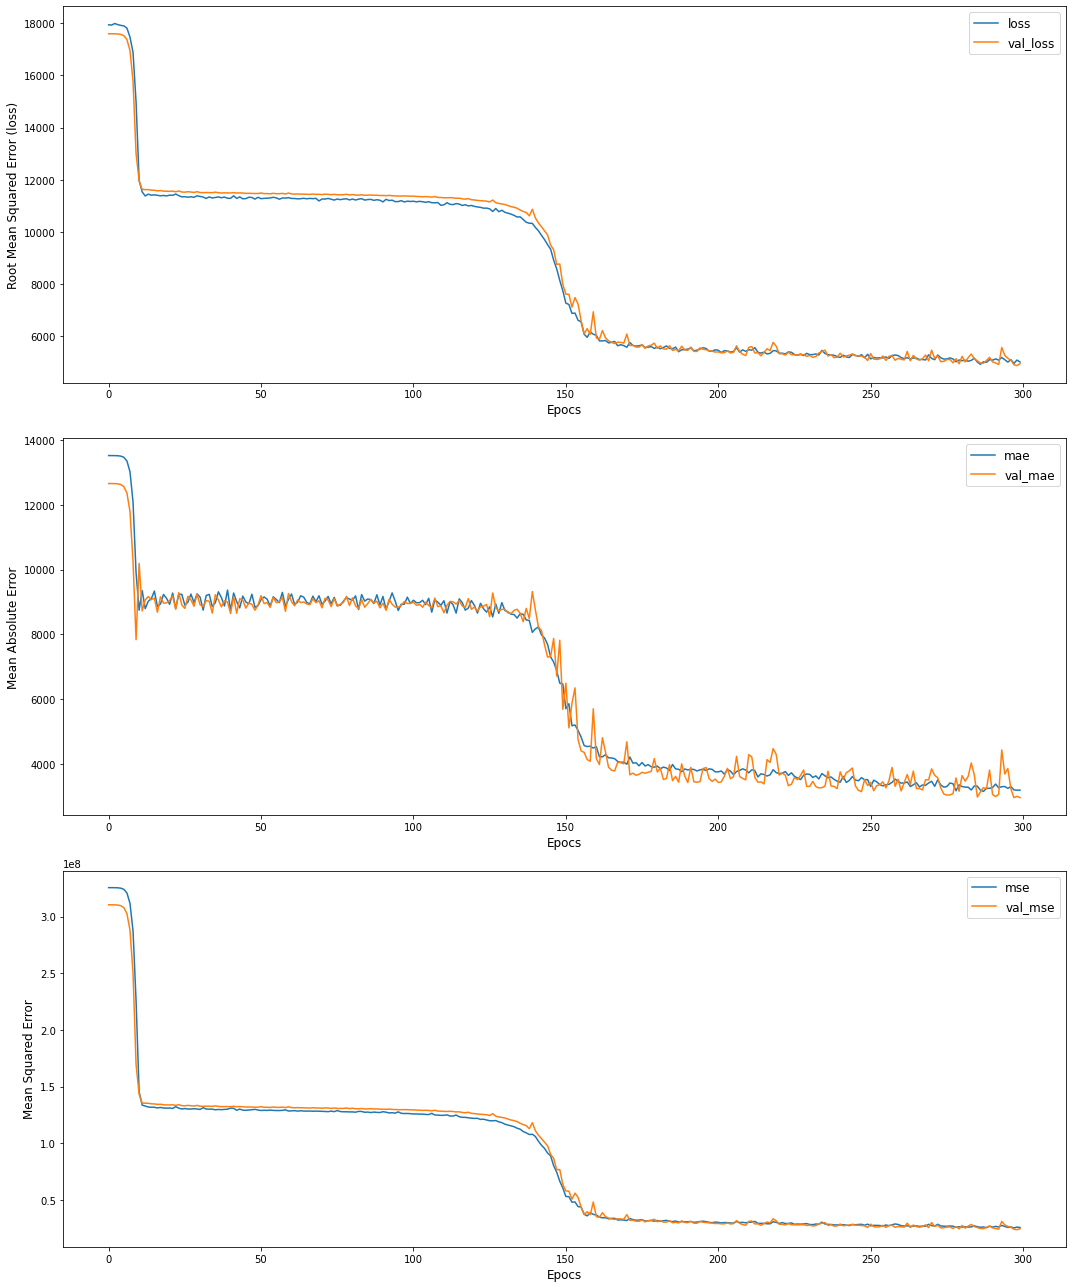

In [95]:
epoc_plots(history38)

In [96]:
y_pred38 = model38.predict(X_test)
r2_score(y_test, y_pred38) 

0.8455348772522895

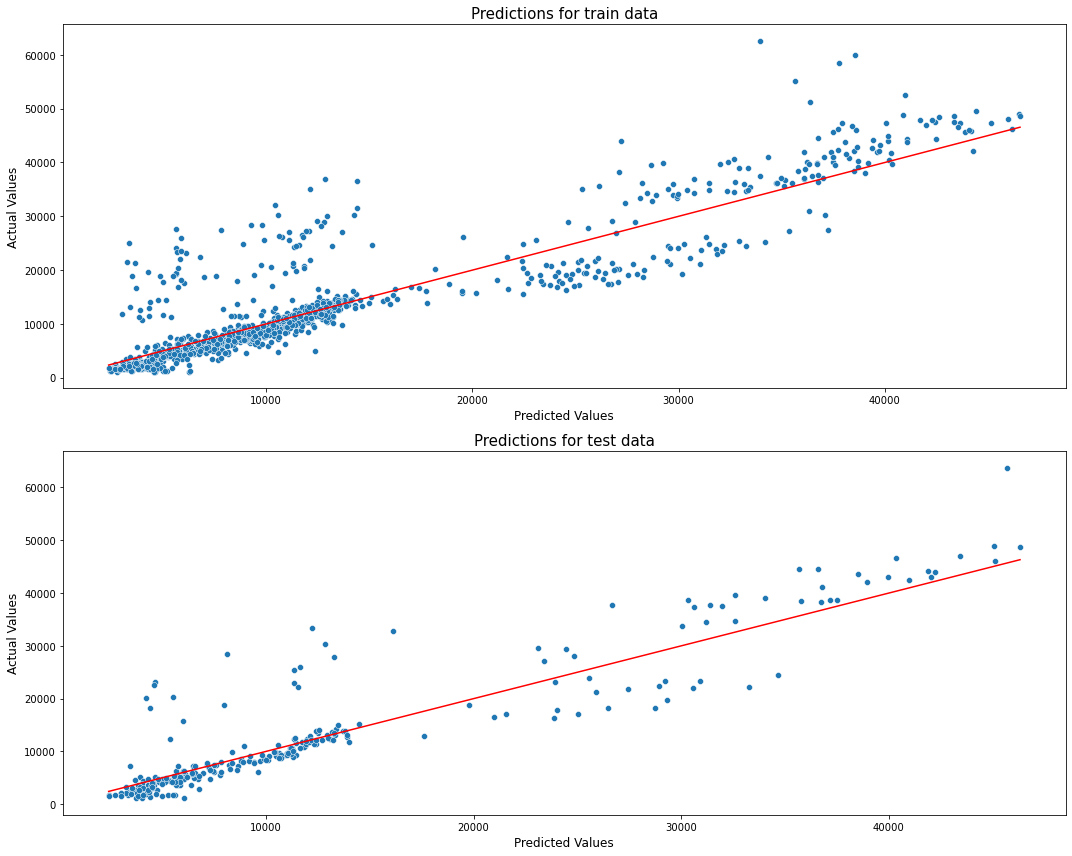

In [97]:
regression_plots(y_pred38, model38)

In [98]:
check_min_max(y_pred38)

Predicted values

max: 46314.9765625
min: 2428.897216796875

Actual values

max: 63770.42801
min: 1131.5066


In [99]:
# I had to decrease the learning rate slightly to 
# make the model learn better

# that being said the scale=1 perfored slightly better 
# than scale=2
# I wanna try a much higher scale just to see how 
# the model performs  

In [100]:
# param count: 416,476
model39 = Sequential() 

model39.add(Dense(100, input_dim=6, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=10.0), bias_initializer='zeros'))
for i in range(20):
    model39.add(Dense(100, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=10.0), bias_initializer='zeros'))
for i in range(20):
    model39.add(Dense(75, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=10.0), bias_initializer='zeros'))
for i in range(30):
    model39.add(Dense(50, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=10.0), bias_initializer='zeros'))
for i in range(30):
    model39.add(Dense(25, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=10.0), bias_initializer='zeros'))
model39.add(Dense(1, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=10.0), bias_initializer='zeros'))

model39.compile(loss=root_mean_squared_error, optimizer=Adam(0.00001),
             metrics=['mse', 'mae'])

In [101]:
history39 = model39.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 5s 358ms/step - loss: inf - mse: inf - mae: 236643132381746150893386707710771200.0000 - val_loss: inf - val_mse: inf - val_mae: 236041988698669170231895692987596800.0000
Epoch 2/300
14/14 [==============================] - 1s 38ms/step - loss: inf - mse: inf - mae: 236643112574705522327302309324783616.0000 - val_loss: inf - val_mse: inf - val_mae: 236041988698669170231895692987596800.0000
Epoch 3/300
14/14 [==============================] - 1s 41ms/step - loss: inf - mse: inf - mae: 236643132381746150893386707710771200.0000 - val_loss: inf - val_mse: inf - val_mae: 236041988698669170231895692987596800.0000
Epoch 4/300
14/14 [==============================] - 1s 41ms/step - loss: inf - mse: inf - mae: 236643112574705522327302309324783616.0000 - val_loss: inf - val_mse: inf - val_mae: 236041988698669170231895692987596800.0000
Epoch 5/300
14/14 [==============================] - 1s 40ms/step - loss: inf - mse: inf - mae: 236643092767664

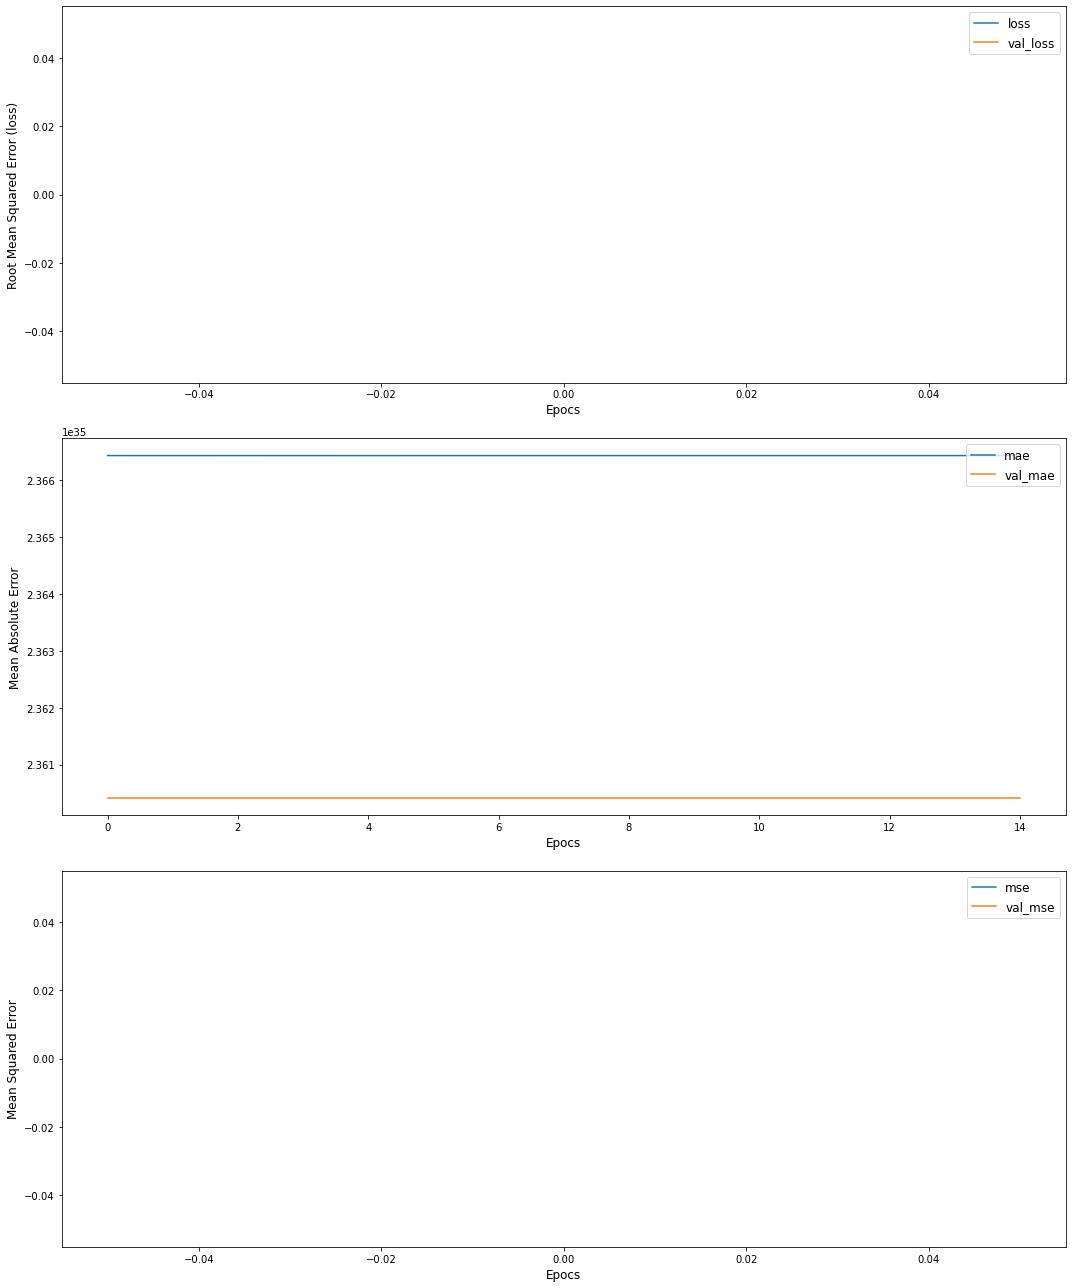

In [102]:
epoc_plots(history39)

In [103]:
y_pred39 = model39.predict(X_test)
r2_score(y_test, y_pred39) 

-3.9780091114742276e+62

In [121]:
# I usualy don't save the models that don't perform well
# but I feel like this result is worth saving 
# anyway, TL;DR don't scale the weights this much 
# another scaling? 
# note: 5 didn't work, neither did 3. So I trained another with scale=2

In [115]:
# param count: 416,476
model40 = Sequential() 

model40.add(Dense(100, input_dim=6, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=2), bias_initializer='zeros'))
for i in range(20):
    model40.add(Dense(100, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=2), bias_initializer='zeros'))
for i in range(20):
    model40.add(Dense(75, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=2), bias_initializer='zeros'))
for i in range(30):
    model40.add(Dense(50, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=2), bias_initializer='zeros'))
for i in range(30):
    model40.add(Dense(25, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=2), bias_initializer='zeros'))
model40.add(Dense(1, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(scale=2), bias_initializer='zeros'))

model40.compile(loss=root_mean_squared_error, optimizer=Adam(0.0001),
             metrics=['mse', 'mae'])

In [116]:
history40 = model40.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 3s 210ms/step - loss: 17951.1250 - mse: 325472480.0000 - mae: 13518.7207 - val_loss: 17593.4668 - val_mse: 310368736.0000 - val_mae: 12655.5762
Epoch 2/300
14/14 [==============================] - 1s 38ms/step - loss: 17963.1641 - mse: 325471552.0000 - mae: 13518.6846 - val_loss: 17593.3496 - val_mse: 310364672.0000 - val_mae: 12655.4219
Epoch 3/300
14/14 [==============================] - 0s 34ms/step - loss: 17934.6484 - mse: 325168576.0000 - mae: 13508.4121 - val_loss: 17523.7207 - val_mse: 307916160.0000 - val_mae: 12565.3115
Epoch 4/300
14/14 [==============================] - 1s 39ms/step - loss: 15765.7871 - mse: 254546512.0000 - mae: 11331.2275 - val_loss: 14250.7314 - val_mse: 203336848.0000 - val_mae: 13230.4355
Epoch 5/300
14/14 [==============================] - 0s 35ms/step - loss: 11870.4004 - mse: 143338224.0000 - mae: 8582.2207 - val_loss: 11793.2686 - val_mse: 139333856.0000 - val_mae: 10146.8760
Epoch 6/300
14/14 [=

Epoch 86/300
14/14 [==============================] - 0s 30ms/step - loss: 4996.4502 - mse: 26080678.0000 - mae: 3148.5657 - val_loss: 4799.7695 - val_mse: 23447624.0000 - val_mae: 2579.4163
Epoch 87/300
14/14 [==============================] - 0s 28ms/step - loss: 4952.0391 - mse: 25547810.0000 - mae: 2779.1587 - val_loss: 4718.1494 - val_mse: 22637374.0000 - val_mae: 2987.6572
Epoch 88/300
14/14 [==============================] - 0s 28ms/step - loss: 4850.1689 - mse: 24072424.0000 - mae: 2958.9087 - val_loss: 4707.4341 - val_mse: 22503530.0000 - val_mae: 3108.6033
Epoch 89/300
14/14 [==============================] - 0s 29ms/step - loss: 4770.4990 - mse: 24263858.0000 - mae: 2874.2410 - val_loss: 4647.8945 - val_mse: 21976110.0000 - val_mae: 2983.8584
Epoch 90/300
14/14 [==============================] - 0s 28ms/step - loss: 4924.1099 - mse: 24906334.0000 - mae: 2927.7397 - val_loss: 5049.2339 - val_mse: 25767464.0000 - val_mae: 2599.8149
Epoch 91/300
14/14 [=========================

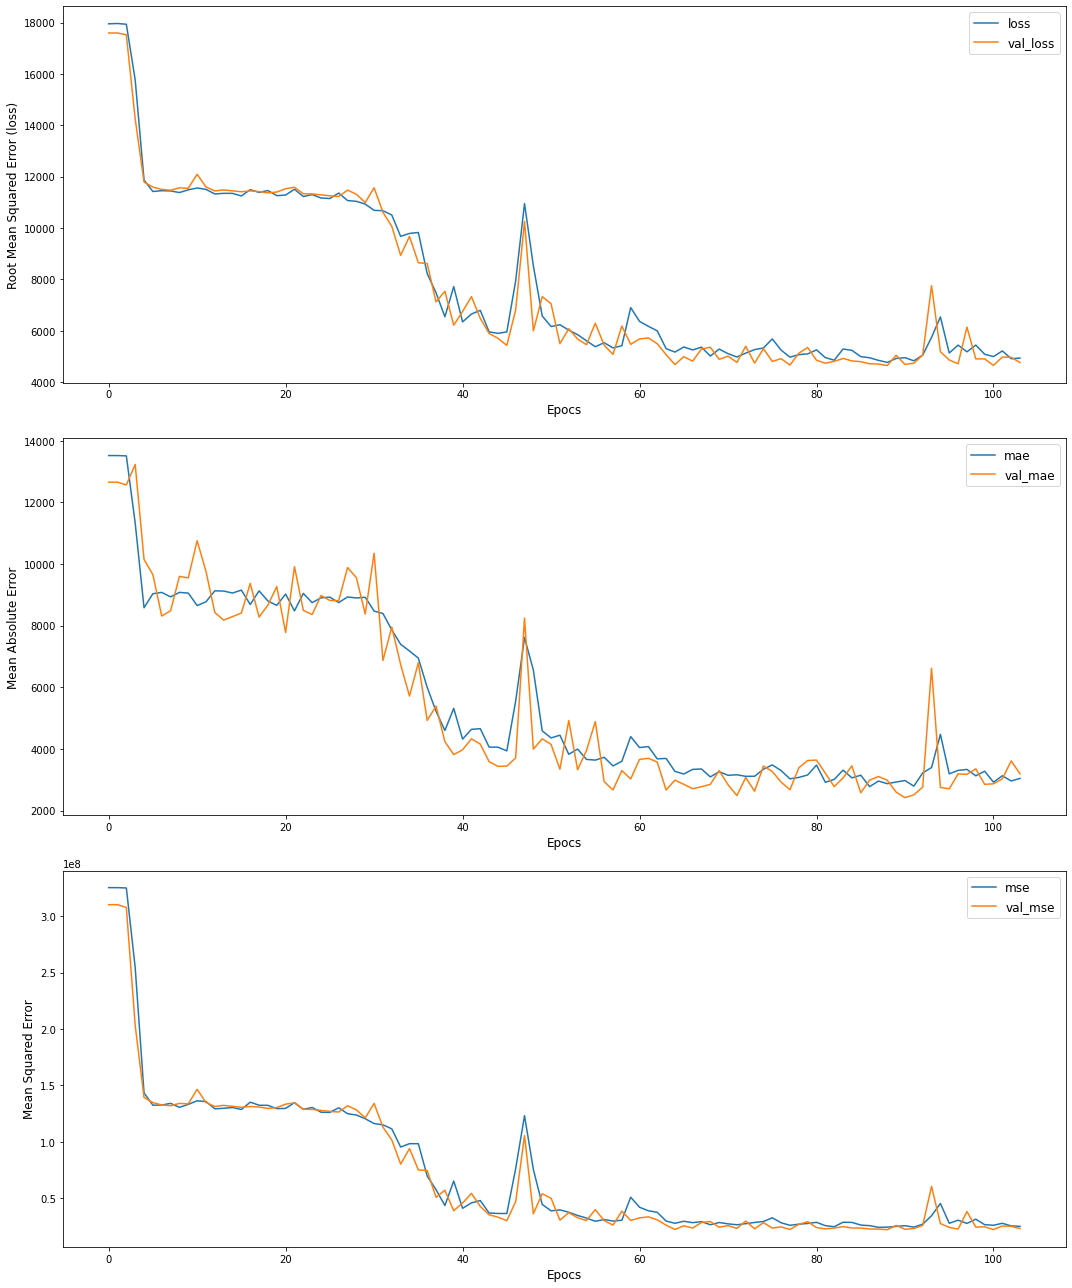

In [117]:
epoc_plots(history40)

In [118]:
y_pred40 = model40.predict(X_test)
r2_score(y_test, y_pred40) 

0.8586094530464732

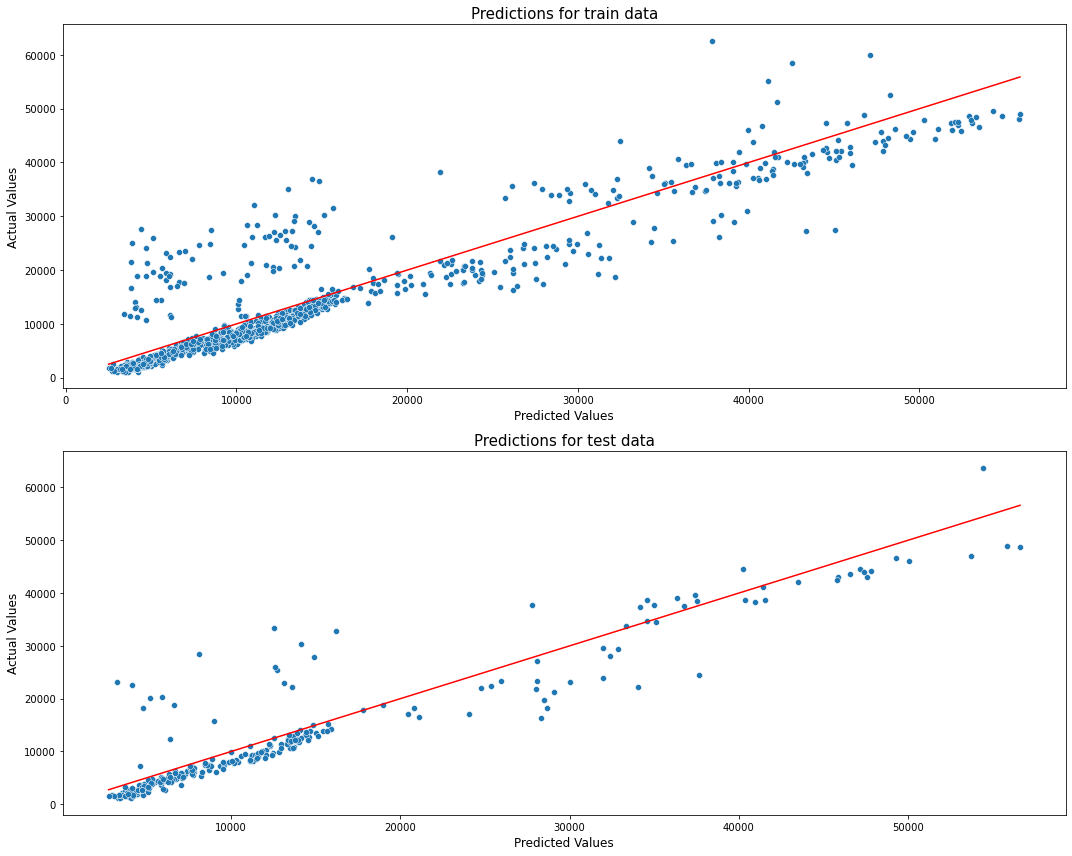

In [119]:
regression_plots(y_pred40, model40)

In [120]:
check_min_max(y_pred40)

Predicted values

max: 56614.68359375
min: 2754.218017578125

Actual values

max: 63770.42801
min: 1131.5066


In [137]:
# hmm, this model worked slightly better than the last one
# with scale=2
# the max predicted price is much closer to the actual max
# value than the last model
# I now want to move on to another NN arch
# trying the model31 arch again with leaky ReLU alone first
# without changing the weight init (PS didn't work)
# trying with weight intits

In [150]:
# param count: 5,201
model41 = Sequential() 

model41.add(Dense(100, input_dim=6, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(1), bias_initializer='zeros'))
model41.add(Dense(75, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(1), bias_initializer='zeros'))
model41.add(Dense(50, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(1), bias_initializer='zeros'))
model41.add(Dense(25, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(1), bias_initializer='zeros'))
model41.add(Dense(1, activation=LeakyReLU(0.01), kernel_initializer=VarianceScaling(1), bias_initializer='zeros'))

model41.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [151]:
history41 = model41.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 0s 34ms/step - loss: 17921.0547 - mse: 324768064.0000 - mae: 13494.3574 - val_loss: 17554.8438 - val_mse: 309009120.0000 - val_mae: 12606.1367
Epoch 2/300
14/14 [==============================] - 0s 11ms/step - loss: 17886.3008 - mse: 322859136.0000 - mae: 13427.2803 - val_loss: 17461.9746 - val_mse: 305752320.0000 - val_mae: 12486.9834
Epoch 3/300
14/14 [==============================] - 0s 9ms/step - loss: 17708.4082 - mse: 316601632.0000 - mae: 13207.5889 - val_loss: 17154.0215 - val_mse: 295076384.0000 - val_mae: 12087.7930
Epoch 4/300
14/14 [==============================] - 0s 11ms/step - loss: 17201.4180 - mse: 297917024.0000 - mae: 12520.8926 - val_loss: 16285.5928 - val_mse: 265990400.0000 - val_mae: 10931.7822
Epoch 5/300
14/14 [==============================] - 0s 11ms/step - loss: 15794.7197 - mse: 251587904.0000 - mae: 10766.4336 - val_loss: 14303.9326 - val_mse: 205254544.0000 - val_mae: 8528.4219
Epoch 6/300
14/14 [===

Epoch 86/300
14/14 [==============================] - 0s 9ms/step - loss: 6546.8354 - mse: 43976580.0000 - mae: 4755.9458 - val_loss: 6394.4146 - val_mse: 41084148.0000 - val_mae: 5081.7749
Epoch 87/300
14/14 [==============================] - 0s 8ms/step - loss: 6336.2197 - mse: 40745916.0000 - mae: 4455.6543 - val_loss: 6229.0049 - val_mse: 38999116.0000 - val_mae: 4528.8452
Epoch 88/300
14/14 [==============================] - 0s 11ms/step - loss: 6345.2310 - mse: 40417720.0000 - mae: 4400.1450 - val_loss: 6317.1538 - val_mse: 40122236.0000 - val_mae: 3624.9685
Epoch 89/300
14/14 [==============================] - 0s 7ms/step - loss: 6297.1343 - mse: 40037324.0000 - mae: 4336.8911 - val_loss: 6208.3076 - val_mse: 38751824.0000 - val_mae: 3987.6472
Epoch 90/300
14/14 [==============================] - 0s 7ms/step - loss: 6287.9165 - mse: 40053536.0000 - mae: 4263.6567 - val_loss: 6287.8818 - val_mse: 39740100.0000 - val_mae: 4908.7988
Epoch 91/300
14/14 [=============================

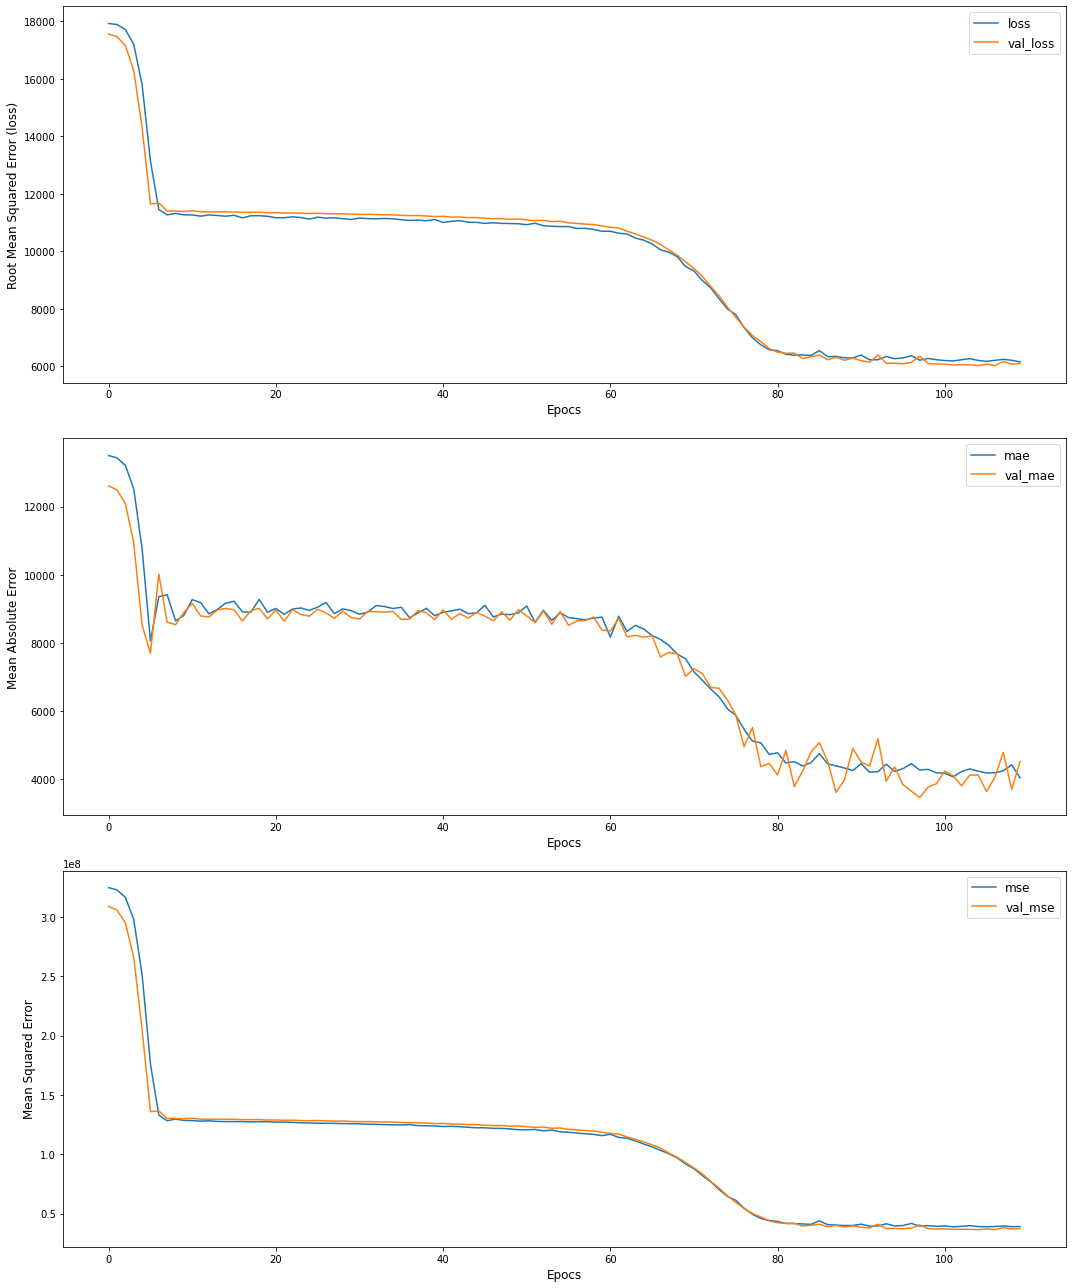

In [152]:
epoc_plots(history41)

In [153]:
y_pred41 = model41.predict(X_test)
r2_score(y_test, y_pred41) 

0.7749817301866482

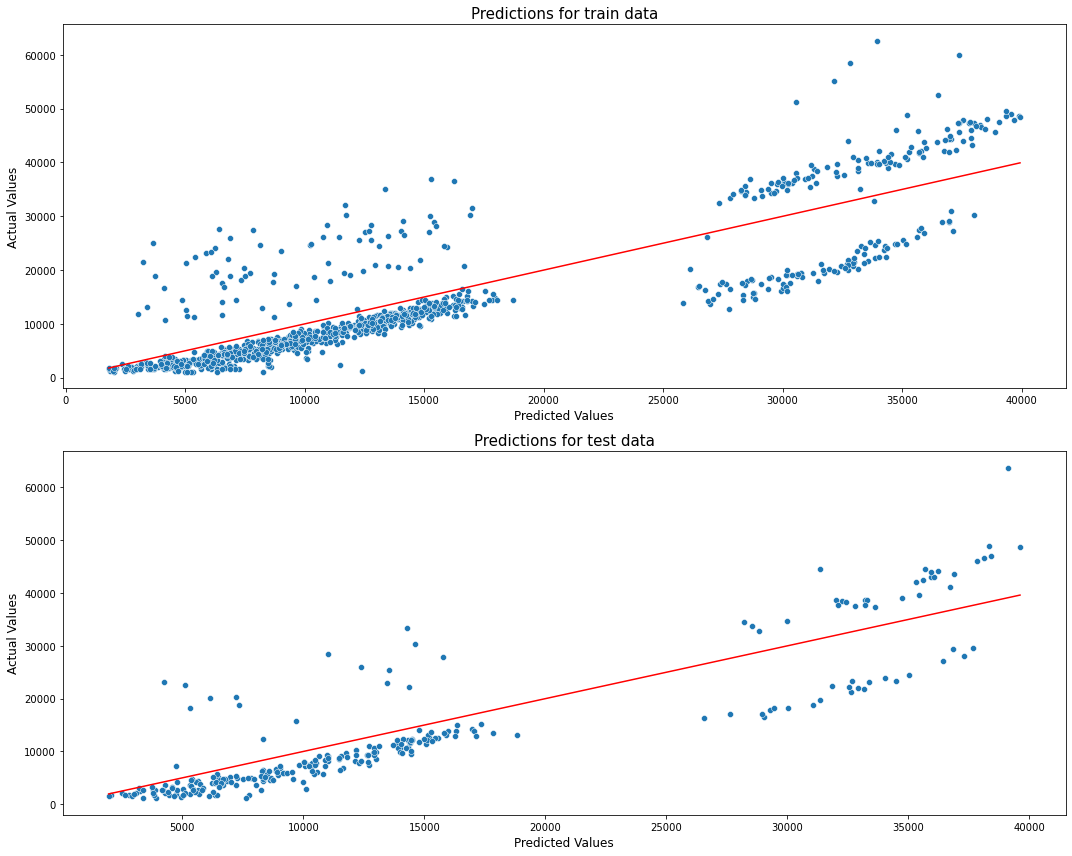

In [154]:
regression_plots(y_pred41, model41)

In [155]:
check_min_max(y_pred41)

Predicted values

max: 39613.25390625
min: 1952.7061767578125

Actual values

max: 63770.42801
min: 1131.5066


In [157]:
# I mean not a great performing model,
# but the model is training now 
# also I had to change the optimizer from SGD to Adam
# for some reason SGD was giving huge loss 
# (didn't bother hyperparameter optimization)

# let me try some other models 

In [233]:
# param count: 41,202
model42 = Sequential() 

model42.add(Dense(100, input_dim=6, activation=LeakyReLU(0.000001), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model42.add(Dense(100, activation=LeakyReLU(0.000001), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model42.add(Dense(100, activation=LeakyReLU(0.000001), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model42.add(Dense(100, activation=LeakyReLU(0.000001), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model42.add(Dense(100, activation=LeakyReLU(0.000001), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model42.add(Dense(1, activation='relu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))

model42.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [234]:
history42 = model42.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 0s 35ms/step - loss: 17843.2812 - mse: 321375424.0000 - mae: 13378.4346 - val_loss: 17283.5625 - val_mse: 299544928.0000 - val_mae: 12255.0215
Epoch 2/300
14/14 [==============================] - 0s 11ms/step - loss: 17100.8184 - mse: 298065408.0000 - mae: 12492.2402 - val_loss: 15790.2031 - val_mse: 250074848.0000 - val_mae: 10269.5713
Epoch 3/300
14/14 [==============================] - 0s 9ms/step - loss: 14011.5879 - mse: 204509856.0000 - mae: 9079.2549 - val_loss: 11439.5703 - val_mse: 131189504.0000 - val_mae: 8435.4404
Epoch 4/300
14/14 [==============================] - 0s 10ms/step - loss: 11626.4453 - mse: 136904816.0000 - mae: 10090.7256 - val_loss: 11408.5732 - val_mse: 130456488.0000 - val_mae: 8771.9375
Epoch 5/300
14/14 [==============================] - 0s 9ms/step - loss: 11329.6055 - mse: 131139928.0000 - mae: 8483.2969 - val_loss: 11406.2441 - val_mse: 130410648.0000 - val_mae: 8648.8682
Epoch 6/300
14/14 [========

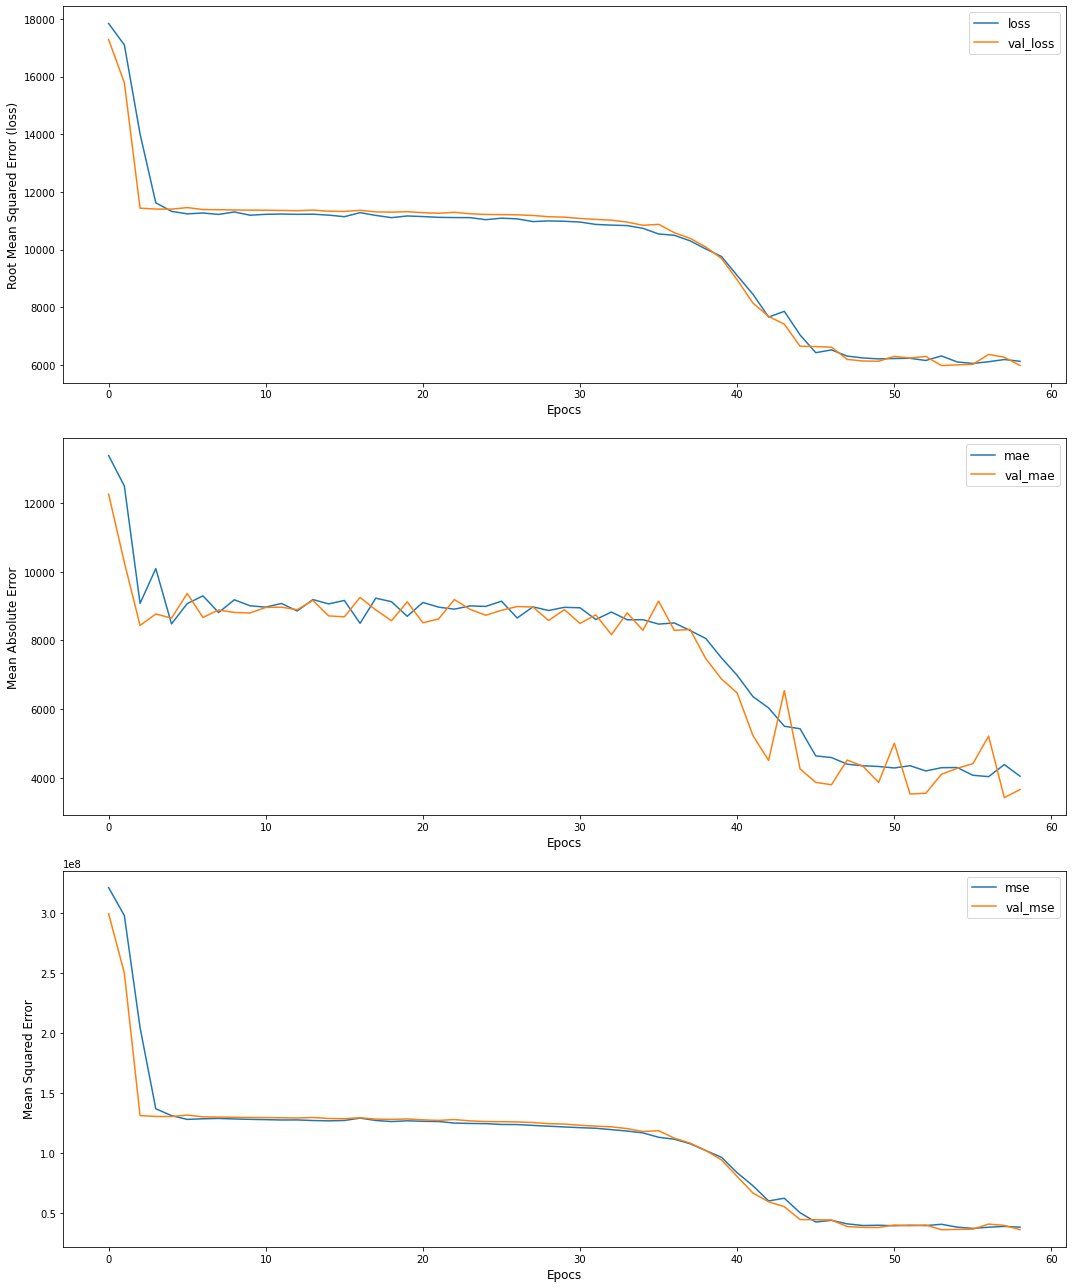

In [235]:
epoc_plots(history42)

In [236]:
y_pred42 = model42.predict(X_test)
r2_score(y_test, y_pred42) 

0.792612467226789

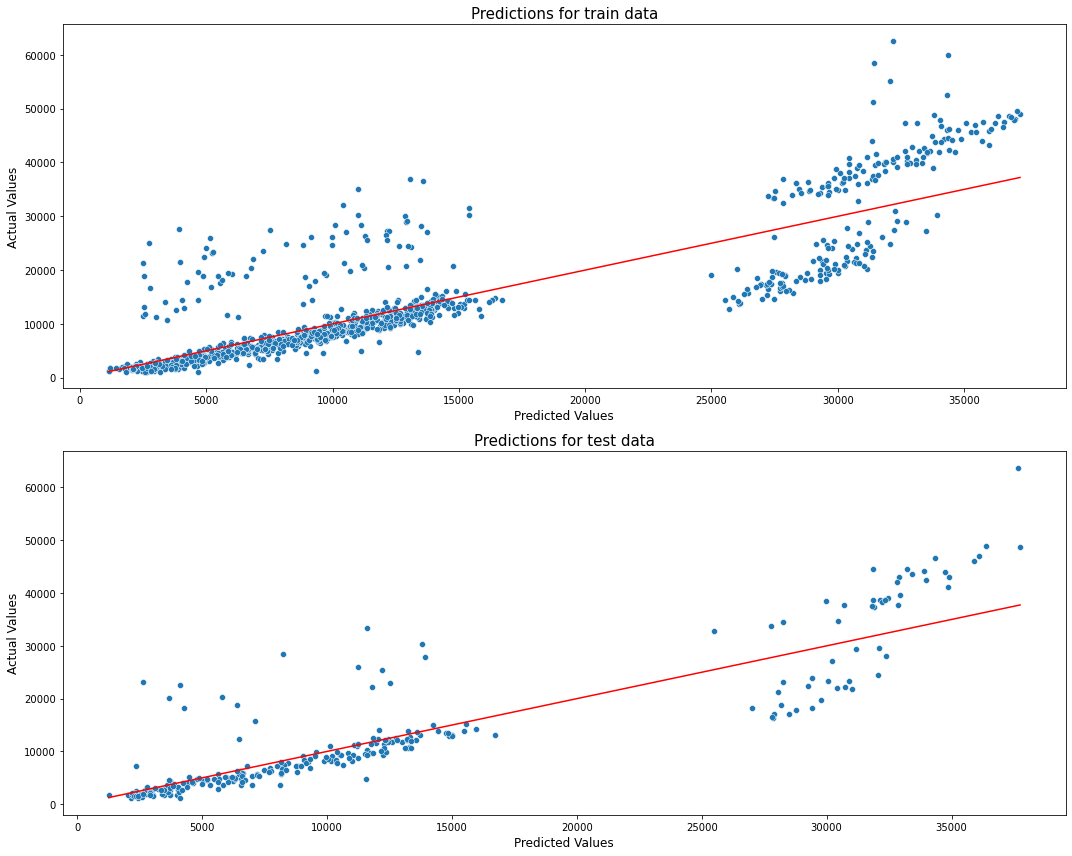

In [237]:
regression_plots(y_pred42, model42)

In [238]:
check_min_max(y_pred42)

Predicted values

max: 37739.0234375
min: 1259.99853515625

Actual values

max: 63770.42801
min: 1131.5066


In [241]:
# hmmm, meh 
# not that happy 
# I looked at some alternative activation functions
# and ELU came to my notice
# lets try that 

In [246]:
# param count: 41,202
model43 = Sequential() 

model43.add(Dense(100, input_dim=6, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model43.add(Dense(100, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model43.add(Dense(100, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model43.add(Dense(100, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model43.add(Dense(100, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model43.add(Dense(1, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))

model43.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [247]:
history43 = model43.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 0s 35ms/step - loss: 17888.1172 - mse: 322741568.0000 - mae: 13420.4004 - val_loss: 17354.5586 - val_mse: 302005760.0000 - val_mae: 12348.3340
Epoch 2/300
14/14 [==============================] - 0s 20ms/step - loss: 17284.1758 - mse: 302098272.0000 - mae: 12668.6006 - val_loss: 16057.1416 - val_mse: 258581552.0000 - val_mae: 10622.1064
Epoch 3/300
14/14 [==============================] - 0s 16ms/step - loss: 14547.2129 - mse: 215245872.0000 - mae: 9378.3252 - val_loss: 11717.8867 - val_mse: 137683568.0000 - val_mae: 7607.9106
Epoch 4/300
14/14 [==============================] - 0s 9ms/step - loss: 11521.5967 - mse: 134824144.0000 - mae: 9762.8857 - val_loss: 11488.9697 - val_mse: 132252368.0000 - val_mae: 9310.7803
Epoch 5/300
14/14 [==============================] - 0s 14ms/step - loss: 11278.1768 - mse: 130007176.0000 - mae: 8930.4629 - val_loss: 11457.2852 - val_mse: 131578120.0000 - val_mae: 8440.7305
Epoch 6/300
14/14 [========

14/14 [==============================] - 0s 10ms/step - loss: 5536.3486 - mse: 31181174.0000 - mae: 3598.4109 - val_loss: 5271.9702 - val_mse: 27975014.0000 - val_mae: 2832.9177
Epoch 87/300
14/14 [==============================] - 0s 14ms/step - loss: 5400.1089 - mse: 29596054.0000 - mae: 3449.5002 - val_loss: 4950.0239 - val_mse: 24643112.0000 - val_mae: 3134.4944
Epoch 88/300
14/14 [==============================] - 0s 13ms/step - loss: 5343.9565 - mse: 29428030.0000 - mae: 3376.1968 - val_loss: 4960.7583 - val_mse: 24752364.0000 - val_mae: 2947.1072
Epoch 89/300
14/14 [==============================] - 0s 9ms/step - loss: 5349.1519 - mse: 29332602.0000 - mae: 3520.5762 - val_loss: 4944.8032 - val_mse: 24607618.0000 - val_mae: 2775.1025
Epoch 90/300
14/14 [==============================] - 0s 9ms/step - loss: 5303.0923 - mse: 29371896.0000 - mae: 3220.5430 - val_loss: 5010.8613 - val_mse: 25215406.0000 - val_mae: 3571.1196
Epoch 91/300
14/14 [==============================] - 0s 13m

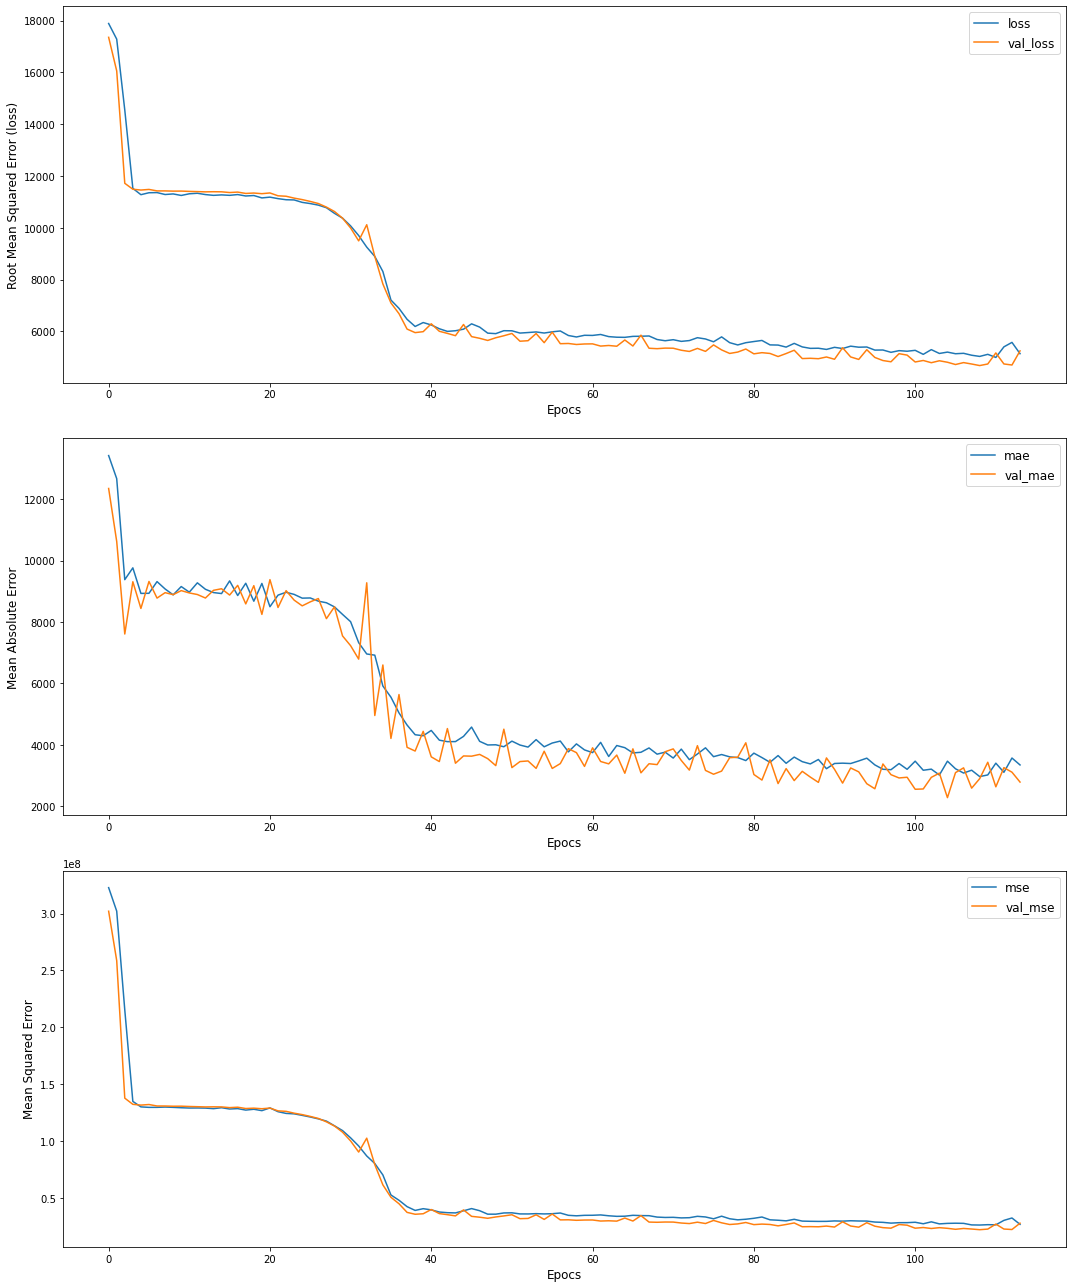

In [248]:
epoc_plots(history43)

In [249]:
y_pred43 = model43.predict(X_test)
r2_score(y_test, y_pred43) 

0.8378844871306358

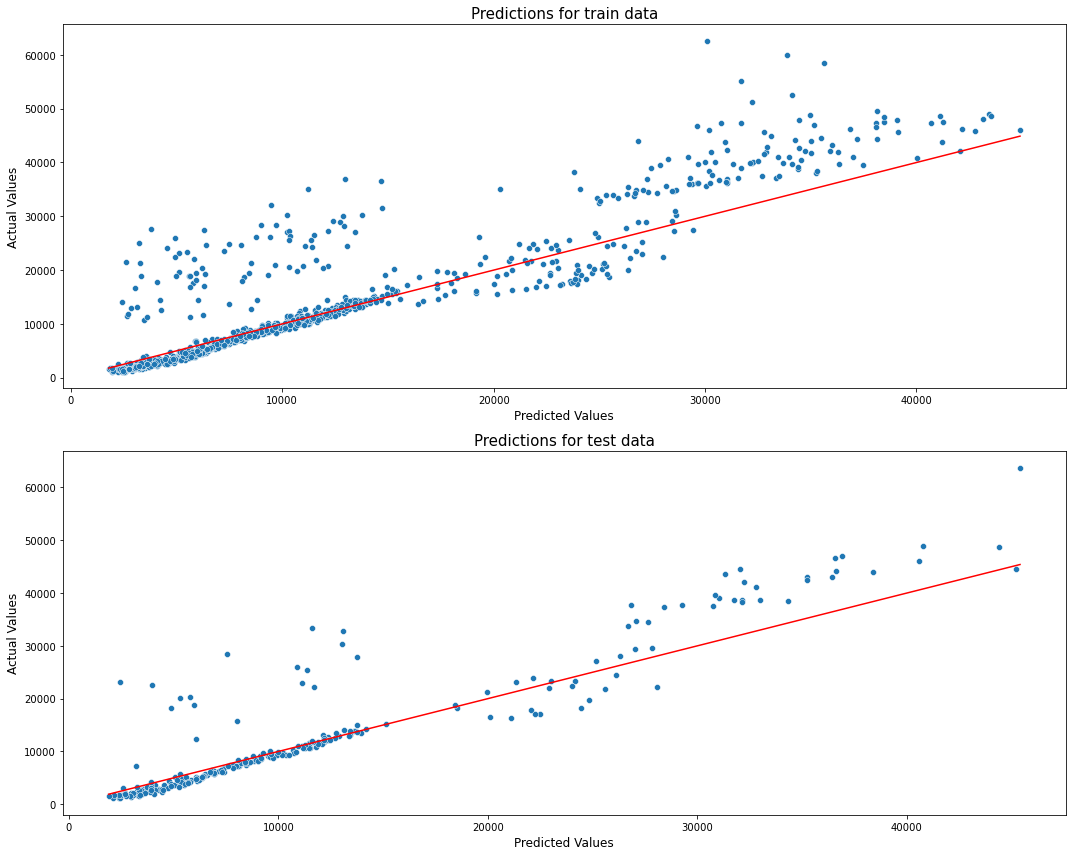

In [250]:
regression_plots(y_pred43, model43)

In [251]:
check_min_max(y_pred43)

Predicted values

max: 45402.77734375
min: 1897.8101806640625

Actual values

max: 63770.42801
min: 1131.5066


In [254]:
# interesting, ELU works very well 
# I almost want to try and experiment with ELUs 
# with their alpha values as well
# for reference ELU (exponential linear unit) is:
# x, x>=0
# alpha*(exp(x)-1), x<0

In [255]:
from tensorflow.keras.layers import ELU

In [311]:
# param count: 41,202
model44 = Sequential() 

model44.add(Dense(100, input_dim=6, activation=ELU(0.0001), kernel_initializer=VarianceScaling(2.0), bias_initializer='zeros'))
model44.add(Dense(100, activation=ELU(0.0001), kernel_initializer=VarianceScaling(2.0), bias_initializer='zeros'))
model44.add(Dense(100, activation=ELU(0.0001), kernel_initializer=VarianceScaling(2.0), bias_initializer='zeros'))
model44.add(Dense(100, activation=ELU(0.0001), kernel_initializer=VarianceScaling(2.0), bias_initializer='zeros'))
model44.add(Dense(100, activation=ELU(0.0001), kernel_initializer=VarianceScaling(2.0), bias_initializer='zeros'))
model44.add(Dense(1, activation=ELU(0.0001), kernel_initializer=VarianceScaling(2.0), bias_initializer='zeros'))

model44.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [312]:
history44 = model44.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=5))

Epoch 1/300
14/14 [==============================] - 1s 54ms/step - loss: 17870.5469 - mse: 325472480.0000 - mae: 13518.7188 - val_loss: 17588.3301 - val_mse: 310187616.0000 - val_mae: 12649.3799
Epoch 2/300
14/14 [==============================] - 0s 13ms/step - loss: 17810.8008 - mse: 321964768.0000 - mae: 13390.7637 - val_loss: 17278.1328 - val_mse: 299353856.0000 - val_mae: 12252.0557
Epoch 3/300
14/14 [==============================] - 0s 14ms/step - loss: 17040.7520 - mse: 293787712.0000 - mae: 12358.7090 - val_loss: 15455.7900 - val_mse: 239591248.0000 - val_mae: 9828.5713
Epoch 4/300
14/14 [==============================] - 0s 13ms/step - loss: 13402.4561 - mse: 185659360.0000 - mae: 8692.3906 - val_loss: 11616.6084 - val_mse: 135191984.0000 - val_mae: 9762.5762
Epoch 5/300
14/14 [==============================] - 0s 14ms/step - loss: 11589.2998 - mse: 135516800.0000 - mae: 10031.0283 - val_loss: 11455.0703 - val_mse: 131534944.0000 - val_mae: 8394.6924
Epoch 6/300
14/14 [=====

14/14 [==============================] - 0s 17ms/step - loss: 10243.7744 - mse: 105719864.0000 - mae: 8178.1313 - val_loss: 10317.0557 - val_mse: 106665056.0000 - val_mae: 7967.4043
Epoch 44/300
14/14 [==============================] - 0s 21ms/step - loss: 9980.0322 - mse: 100571072.0000 - mae: 7784.7524 - val_loss: 10098.5352 - val_mse: 102154344.0000 - val_mae: 8220.6035
Epoch 45/300
14/14 [==============================] - 0s 8ms/step - loss: 9615.8203 - mse: 93587424.0000 - mae: 7527.4258 - val_loss: 9640.2207 - val_mse: 93148688.0000 - val_mae: 6885.3433
Epoch 46/300
14/14 [==============================] - 0s 9ms/step - loss: 9396.2842 - mse: 89225296.0000 - mae: 7158.7837 - val_loss: 9469.5518 - val_mse: 89785392.0000 - val_mae: 8114.8838
Epoch 47/300
14/14 [==============================] - 0s 9ms/step - loss: 8799.5332 - mse: 78938416.0000 - mae: 6538.7808 - val_loss: 8546.1143 - val_mse: 73177304.0000 - val_mae: 6396.9380
Epoch 48/300
14/14 [==============================] - 

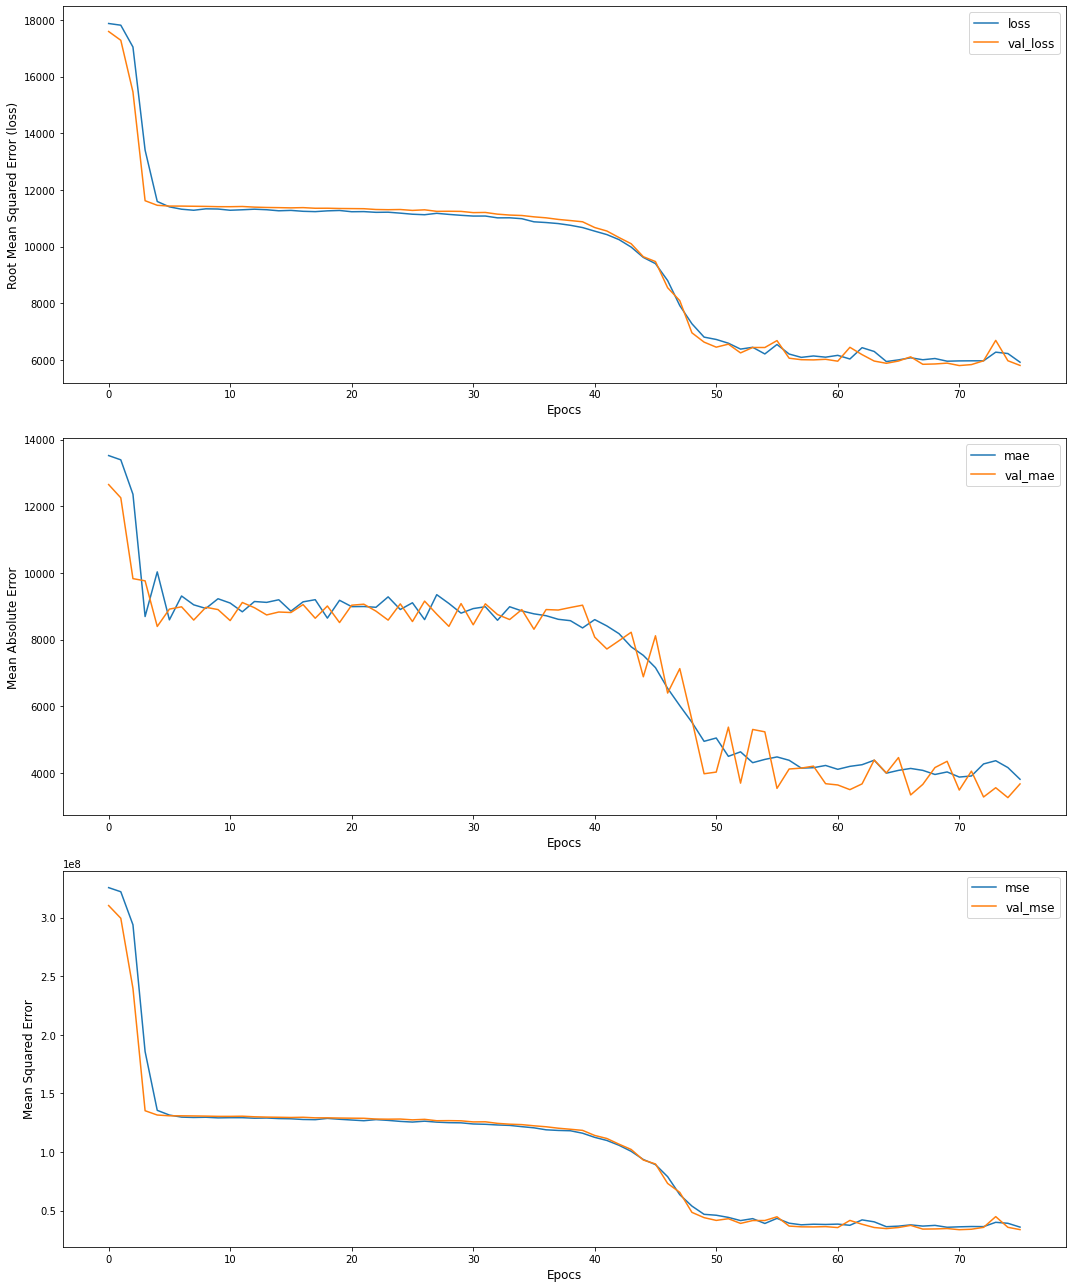

In [313]:
epoc_plots(history44)

In [314]:
y_pred44 = model44.predict(X_test)
r2_score(y_test, y_pred44) 

0.8012109951708464

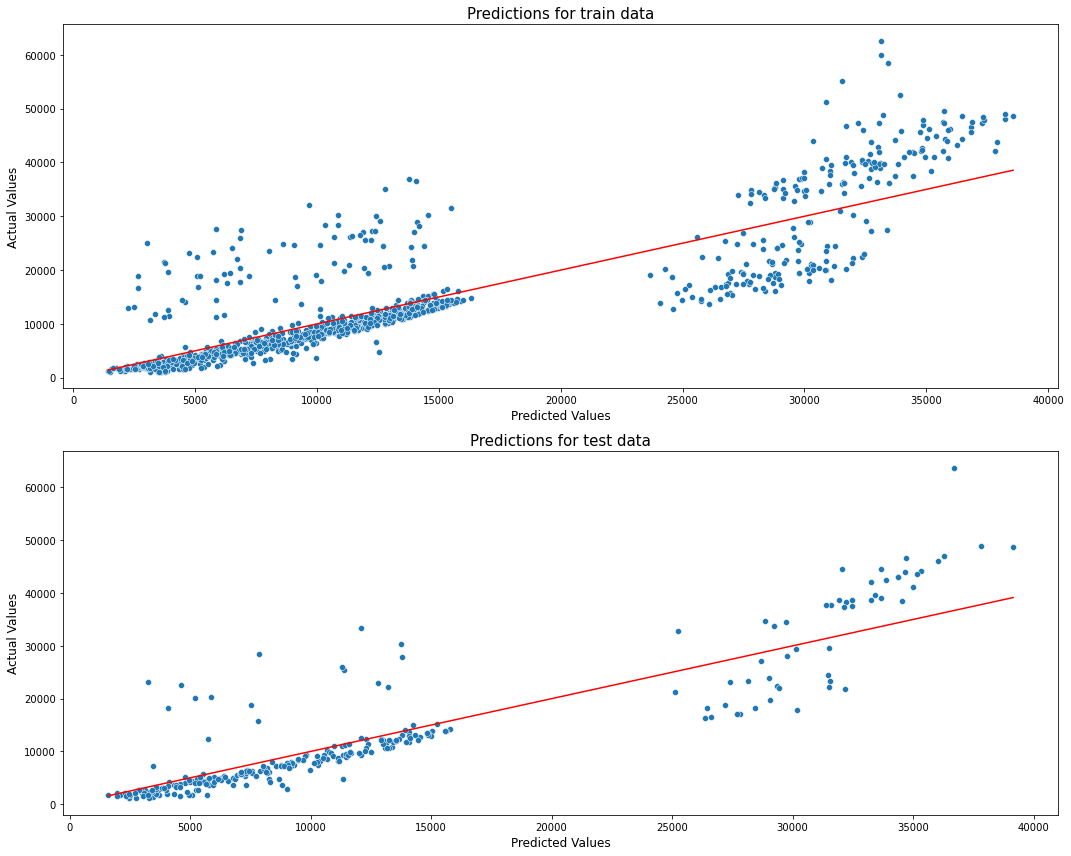

In [315]:
regression_plots(y_pred44, model44)

In [316]:
check_min_max(y_pred44)

Predicted values

max: 39144.43359375
min: 1607.0364990234375

Actual values

max: 63770.42801
min: 1131.5066


In [301]:
# I ran the model and realized that last few 
# models were being trained with callback patience as 5
# with patience=5 the r2 score was 0.80
# and with patience=15 the model performed with 0.85
# huh, makes me think how the previous few models 
# would perform with patience=15 

In [302]:
# training model43 with patience=15

In [317]:
# param count: 41,202
model45 = Sequential() 

model45.add(Dense(100, input_dim=6, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model45.add(Dense(100, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model45.add(Dense(100, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model45.add(Dense(100, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model45.add(Dense(100, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model45.add(Dense(1, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))

model45.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [318]:
history45 = model45.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 55ms/step - loss: 17891.5039 - mse: 322244544.0000 - mae: 13406.4932 - val_loss: 17343.6621 - val_mse: 301627424.0000 - val_mae: 12334.1475
Epoch 2/300
14/14 [==============================] - 0s 21ms/step - loss: 17307.6074 - mse: 302914240.0000 - mae: 12701.9863 - val_loss: 16171.6865 - val_mse: 262283872.0000 - val_mae: 10773.0410
Epoch 3/300
14/14 [==============================] - 0s 16ms/step - loss: 14672.3984 - mse: 222406448.0000 - mae: 9619.7480 - val_loss: 12022.7549 - val_mse: 144984528.0000 - val_mae: 7253.2300
Epoch 4/300
14/14 [==============================] - 0s 14ms/step - loss: 11661.4307 - mse: 137497952.0000 - mae: 9736.5488 - val_loss: 11657.1143 - val_mse: 136127792.0000 - val_mae: 9879.7715
Epoch 5/300
14/14 [==============================] - 0s 15ms/step - loss: 11574.5557 - mse: 136003312.0000 - mae: 8556.3936 - val_loss: 11534.8652 - val_mse: 133399424.0000 - val_mae: 8109.2197
Epoch 6/300
14/14 [=======

14/14 [==============================] - 0s 9ms/step - loss: 5534.6460 - mse: 31334994.0000 - mae: 3685.0850 - val_loss: 5146.0762 - val_mse: 26599506.0000 - val_mae: 3260.0757
Epoch 87/300
14/14 [==============================] - 0s 8ms/step - loss: 5465.3398 - mse: 31093654.0000 - mae: 3389.0876 - val_loss: 5130.5830 - val_mse: 26443056.0000 - val_mae: 3092.9778
Epoch 88/300
14/14 [==============================] - 0s 8ms/step - loss: 5565.1641 - mse: 31227854.0000 - mae: 3760.5242 - val_loss: 5319.5396 - val_mse: 28447644.0000 - val_mae: 2904.6216
Epoch 89/300
14/14 [==============================] - 0s 8ms/step - loss: 5592.6138 - mse: 31866096.0000 - mae: 3392.7468 - val_loss: 5498.8667 - val_mse: 30399490.0000 - val_mae: 2862.6072
Epoch 90/300
14/14 [==============================] - 0s 8ms/step - loss: 5902.7261 - mse: 35657796.0000 - mae: 3842.0466 - val_loss: 5205.3096 - val_mse: 27229808.0000 - val_mae: 3443.9209
Epoch 91/300
14/14 [==============================] - 0s 8ms/st

Epoch 172/300
14/14 [==============================] - 0s 9ms/step - loss: 4849.3335 - mse: 24444100.0000 - mae: 2905.4861 - val_loss: 4496.4814 - val_mse: 20401334.0000 - val_mae: 2594.3662
Epoch 173/300
14/14 [==============================] - 0s 8ms/step - loss: 4901.2817 - mse: 25376184.0000 - mae: 3062.5813 - val_loss: 4698.1958 - val_mse: 22326810.0000 - val_mae: 2565.6104
Epoch 174/300
14/14 [==============================] - 0s 9ms/step - loss: 4823.7563 - mse: 24182386.0000 - mae: 2860.4104 - val_loss: 4798.9839 - val_mse: 23137044.0000 - val_mae: 3469.8499
Epoch 175/300
14/14 [==============================] - 0s 9ms/step - loss: 5007.5942 - mse: 25509152.0000 - mae: 3099.4202 - val_loss: 5193.0981 - val_mse: 27270432.0000 - val_mae: 2776.0435
Epoch 176/300
14/14 [==============================] - 0s 8ms/step - loss: 4915.4624 - mse: 25082714.0000 - mae: 2902.6633 - val_loss: 4563.5298 - val_mse: 21014870.0000 - val_mae: 2883.3545
Epoch 177/300
14/14 [========================

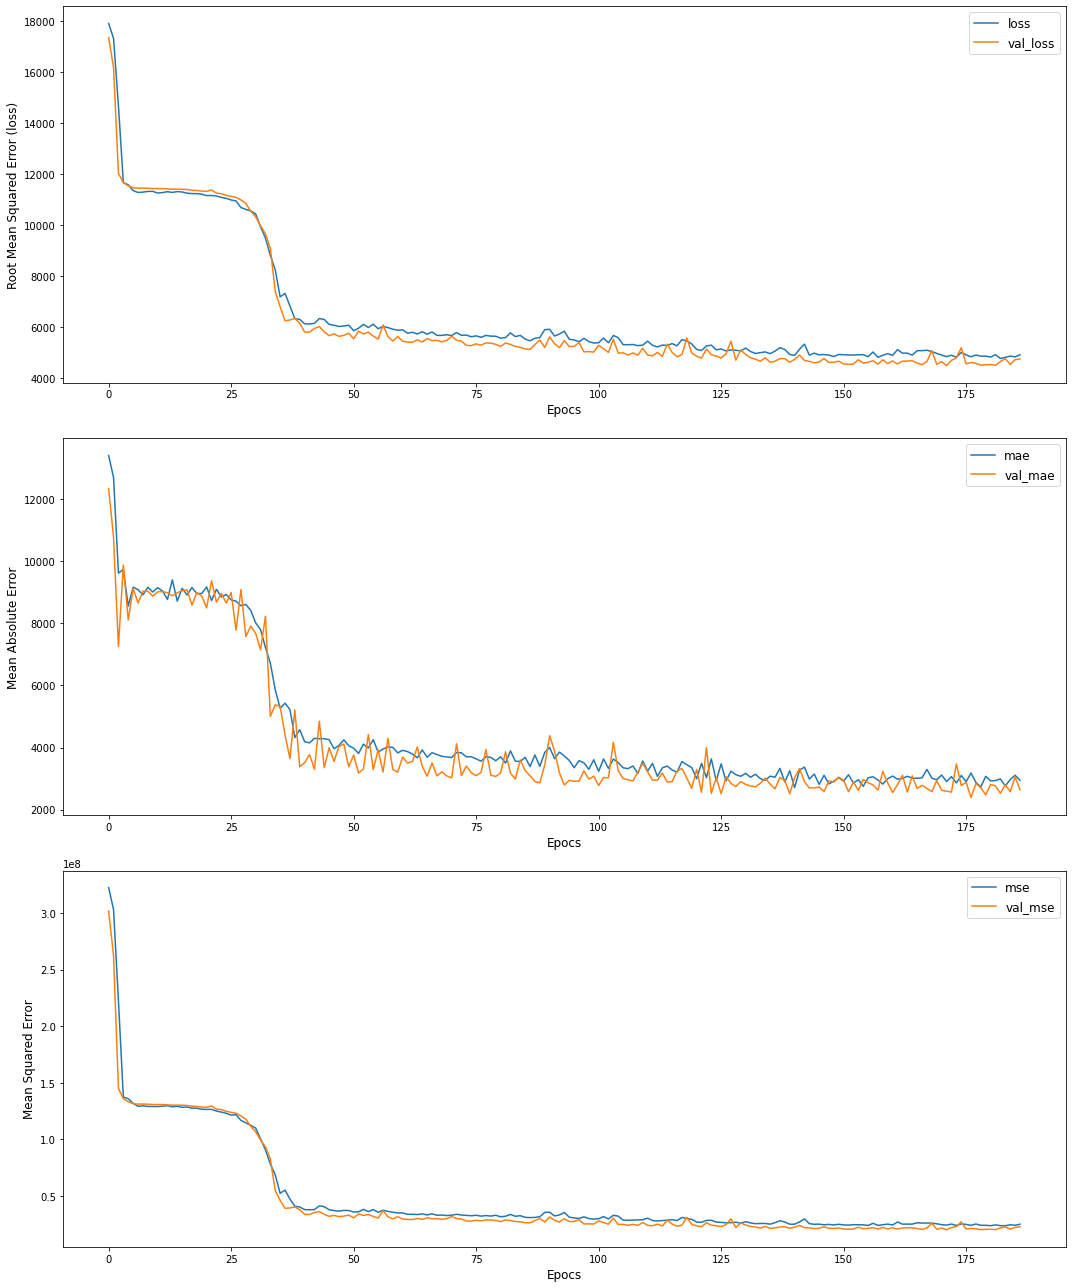

In [319]:
epoc_plots(history45)

In [320]:
y_pred45 = model45.predict(X_test)
r2_score(y_test, y_pred45) 

0.8635818258440346

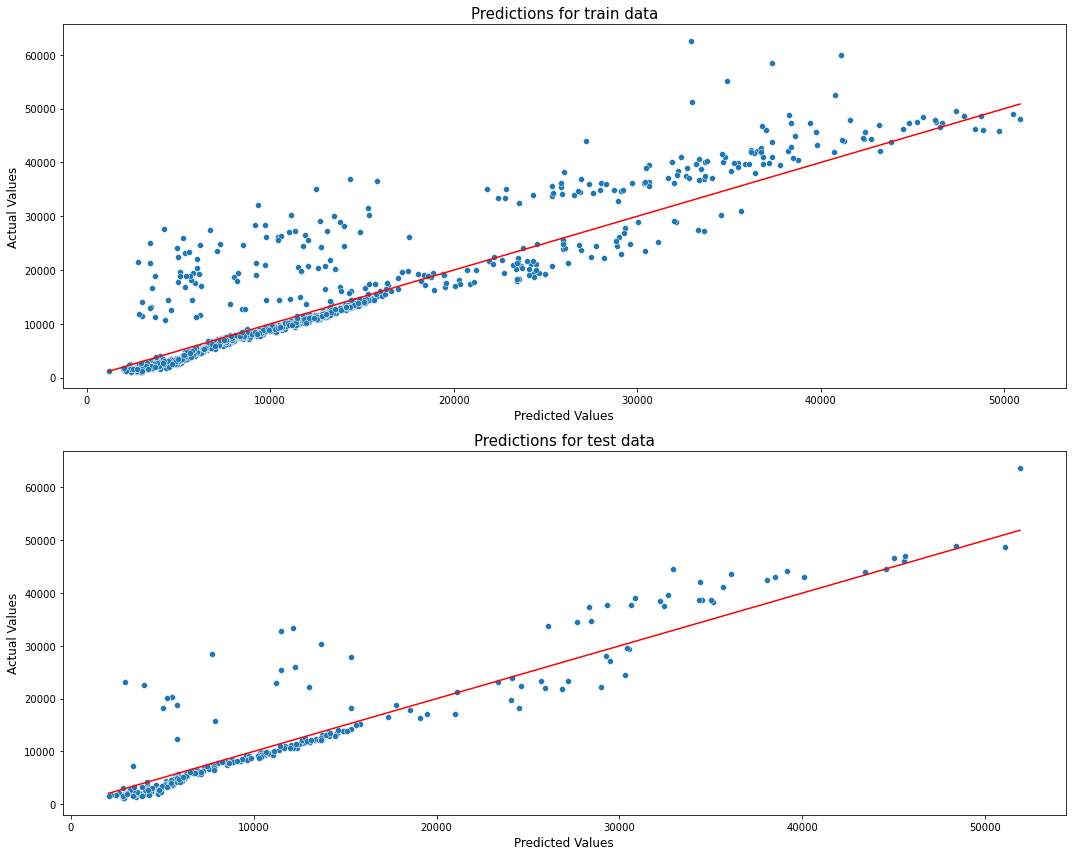

In [321]:
regression_plots(y_pred45, model45)

In [322]:
check_min_max(y_pred45)

Predicted values

max: 51893.54296875
min: 2078.074951171875

Actual values

max: 63770.42801
min: 1131.5066


In [323]:
# hmmm, the first 'good' model 
# or at least in the ballpark of being among the best from before
# 0.863 is an ok r2 score among others
# models [9, 10, 11, 25]
# these are the models with 0.87+ r2 score
# I thought that I had 0.88 r2 score models as well
# but I might be wrong about that :/ 
# ok
# I want to decrese the number of total params, 
# but increase the r2 score 
# lets try a deeper model 

In [324]:
# param count: 18,251
model46 = Sequential() 

model46.add(Dense(50, input_dim=6, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model46.add(Dense(50, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model46.add(Dense(50, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model46.add(Dense(50, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model46.add(Dense(50, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model46.add(Dense(50, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model46.add(Dense(50, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model46.add(Dense(50, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model46.add(Dense(1, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))

model46.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [325]:
history46 = model46.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 59ms/step - loss: 17947.1055 - mse: 324187648.0000 - mae: 13474.2539 - val_loss: 17485.4727 - val_mse: 306575328.0000 - val_mae: 12515.3076
Epoch 2/300
14/14 [==============================] - 0s 18ms/step - loss: 17620.8496 - mse: 314277856.0000 - mae: 13111.9414 - val_loss: 16789.3633 - val_mse: 282682368.0000 - val_mae: 11596.3525
Epoch 3/300
14/14 [==============================] - 0s 19ms/step - loss: 15811.8828 - mse: 253157008.0000 - mae: 10788.8877 - val_loss: 12786.3730 - val_mse: 164024320.0000 - val_mae: 7369.2441
Epoch 4/300
14/14 [==============================] - 0s 15ms/step - loss: 11683.7061 - mse: 138025456.0000 - mae: 9400.9473 - val_loss: 11549.2178 - val_mse: 133636376.0000 - val_mae: 9556.7686
Epoch 5/300
14/14 [==============================] - 0s 23ms/step - loss: 11477.6895 - mse: 134263456.0000 - mae: 8447.1719 - val_loss: 11440.9355 - val_mse: 131196192.0000 - val_mae: 8699.5547
Epoch 6/300
14/14 [======

14/14 [==============================] - 0s 9ms/step - loss: 4909.4473 - mse: 24965512.0000 - mae: 3044.7231 - val_loss: 4576.9282 - val_mse: 21100608.0000 - val_mae: 2467.3628
Epoch 87/300
14/14 [==============================] - 0s 8ms/step - loss: 4906.4263 - mse: 24682292.0000 - mae: 2928.0967 - val_loss: 4606.9619 - val_mse: 21381852.0000 - val_mae: 3025.3369
Epoch 88/300
14/14 [==============================] - 0s 9ms/step - loss: 4904.1499 - mse: 24902990.0000 - mae: 3140.8591 - val_loss: 4725.8940 - val_mse: 22523358.0000 - val_mae: 2214.4880
Epoch 89/300
14/14 [==============================] - 0s 8ms/step - loss: 4860.8550 - mse: 24987546.0000 - mae: 3006.3823 - val_loss: 4886.7075 - val_mse: 24083830.0000 - val_mae: 2331.0422
Epoch 90/300
14/14 [==============================] - 0s 8ms/step - loss: 5135.1187 - mse: 27113140.0000 - mae: 2824.4500 - val_loss: 4699.9580 - val_mse: 22209818.0000 - val_mae: 3443.4431
Epoch 91/300
14/14 [==============================] - 0s 9ms/st

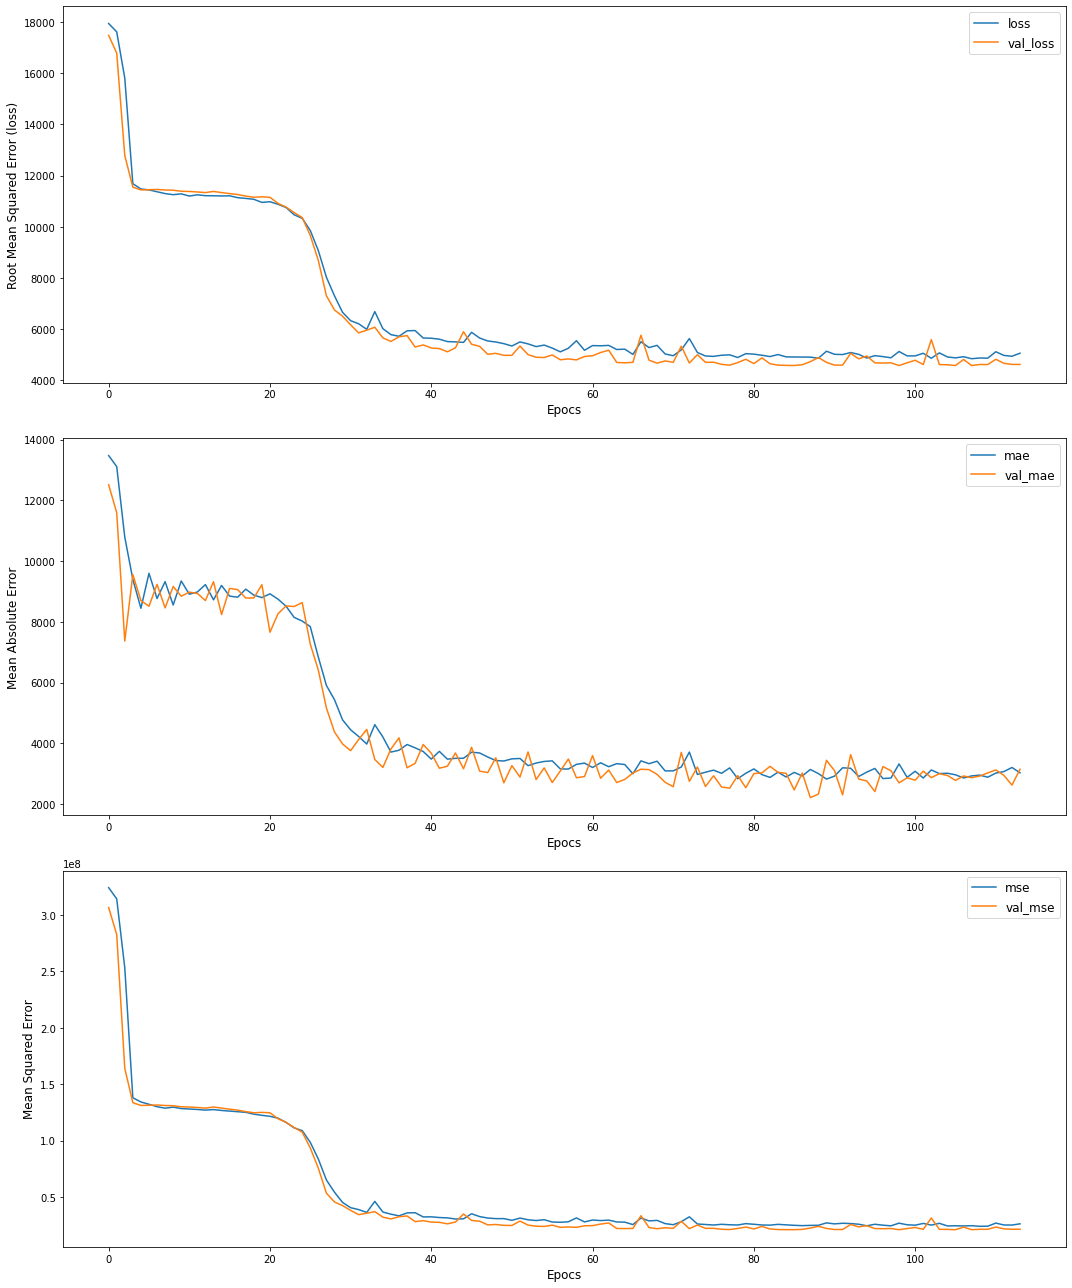

In [326]:
epoc_plots(history46)

In [327]:
y_pred46 = model46.predict(X_test)
r2_score(y_test, y_pred46) 

0.8670883505038971

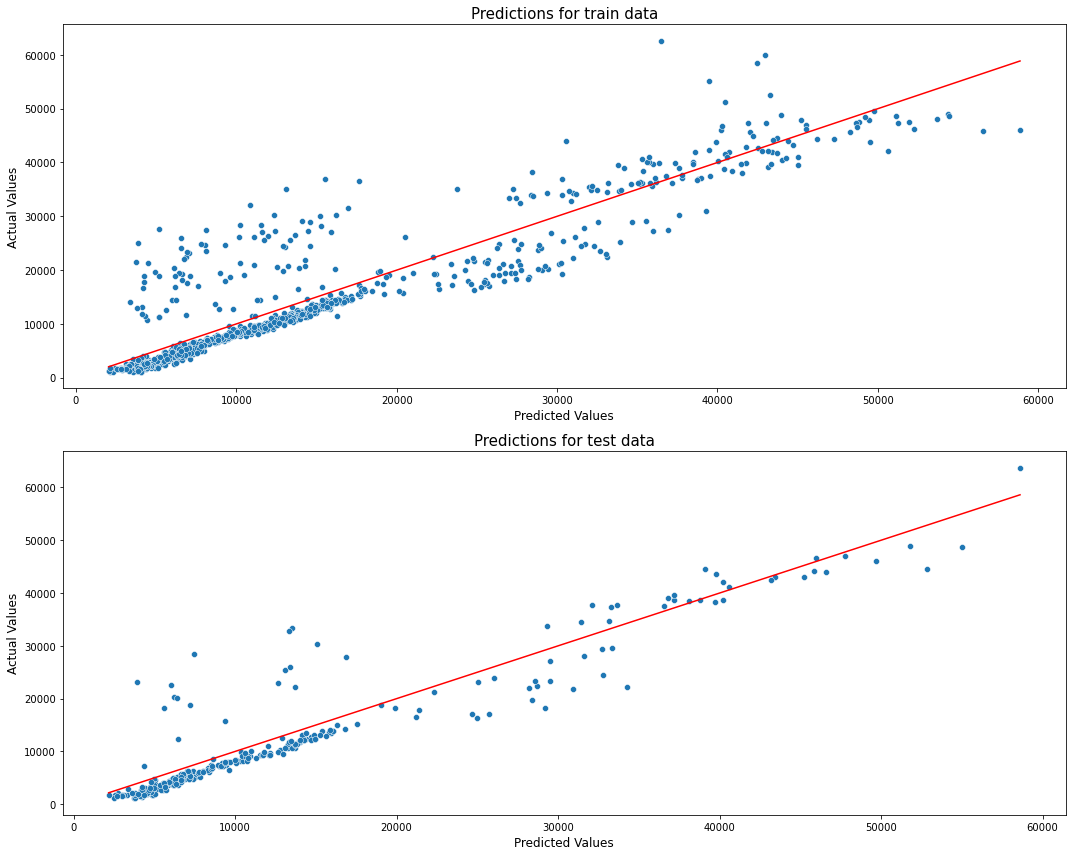

In [329]:
regression_plots(y_pred46, model46)

In [330]:
check_min_max(y_pred46)

Predicted values

max: 58606.63671875
min: 2169.442626953125

Actual values

max: 63770.42801
min: 1131.5066


In [331]:
# goal achieved!
# less params, slightly better r2 score

In [332]:
# param count: 7,351
model47 = Sequential() 

model47.add(Dense(25, input_dim=6, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model47.add(Dense(25, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model47.add(Dense(25, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model47.add(Dense(25, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model47.add(Dense(25, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model47.add(Dense(25, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model47.add(Dense(25, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model47.add(Dense(25, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model47.add(Dense(25, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model47.add(Dense(25, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model47.add(Dense(25, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model47.add(Dense(25, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model47.add(Dense(1, activation='elu', kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))

model47.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [334]:
history47 = model47.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 48ms/step - loss: 17935.8457 - mse: 325090560.0000 - mae: 13504.4131 - val_loss: 17559.9395 - val_mse: 309188736.0000 - val_mae: 12611.8691
Epoch 2/300
14/14 [==============================] - 0s 16ms/step - loss: 17872.1172 - mse: 322094880.0000 - mae: 13401.2783 - val_loss: 17368.3066 - val_mse: 302486496.0000 - val_mae: 12362.7227
Epoch 3/300
14/14 [==============================] - 0s 11ms/step - loss: 17293.0566 - mse: 304615392.0000 - mae: 12745.0771 - val_loss: 16170.4238 - val_mse: 262251888.0000 - val_mae: 10761.7285
Epoch 4/300
14/14 [==============================] - 0s 14ms/step - loss: 14396.2178 - mse: 209620192.0000 - mae: 9351.5176 - val_loss: 11501.9580 - val_mse: 132626672.0000 - val_mae: 8439.6260
Epoch 5/300
14/14 [==============================] - 0s 10ms/step - loss: 11791.5186 - mse: 140449808.0000 - mae: 10157.4678 - val_loss: 11521.1445 - val_mse: 133078200.0000 - val_mae: 8311.6426
Epoch 6/300
14/14 [====

14/14 [==============================] - 0s 23ms/step - loss: 10801.3037 - mse: 118748344.0000 - mae: 8855.1074 - val_loss: 10965.5996 - val_mse: 120549096.0000 - val_mae: 8053.0601
Epoch 44/300
14/14 [==============================] - 0s 14ms/step - loss: 10682.9844 - mse: 116370320.0000 - mae: 8592.7285 - val_loss: 10845.8906 - val_mse: 117866312.0000 - val_mae: 8774.5859
Epoch 45/300
14/14 [==============================] - 0s 9ms/step - loss: 10684.7686 - mse: 116908040.0000 - mae: 8425.8027 - val_loss: 10663.6240 - val_mse: 113951112.0000 - val_mae: 8436.1553
Epoch 46/300
14/14 [==============================] - 0s 9ms/step - loss: 10544.5127 - mse: 112648128.0000 - mae: 8131.4443 - val_loss: 10536.1895 - val_mse: 111215944.0000 - val_mae: 8580.5088
Epoch 47/300
14/14 [==============================] - 0s 8ms/step - loss: 10127.8789 - mse: 103496368.0000 - mae: 8106.6870 - val_loss: 10209.6143 - val_mse: 104507384.0000 - val_mae: 7128.8237
Epoch 48/300
14/14 [=====================

14/14 [==============================] - 0s 10ms/step - loss: 5355.1406 - mse: 29336994.0000 - mae: 3597.8909 - val_loss: 5277.4404 - val_mse: 28105406.0000 - val_mae: 2780.7920
Epoch 87/300
14/14 [==============================] - 0s 9ms/step - loss: 5607.8364 - mse: 32075948.0000 - mae: 3359.2307 - val_loss: 5152.5210 - val_mse: 26652392.0000 - val_mae: 3768.6191
Epoch 88/300
14/14 [==============================] - 0s 8ms/step - loss: 5434.8965 - mse: 31011890.0000 - mae: 3402.8330 - val_loss: 5131.9712 - val_mse: 26582438.0000 - val_mae: 2849.5234
Epoch 89/300
14/14 [==============================] - 0s 11ms/step - loss: 5308.4482 - mse: 29327136.0000 - mae: 3434.2327 - val_loss: 4922.8857 - val_mse: 24388264.0000 - val_mae: 3086.8599
Epoch 90/300
14/14 [==============================] - 0s 12ms/step - loss: 5254.0771 - mse: 28299336.0000 - mae: 3211.7559 - val_loss: 4953.0874 - val_mse: 24737102.0000 - val_mae: 3359.6514
Epoch 91/300
14/14 [==============================] - 0s 12m

Epoch 129/300
14/14 [==============================] - 0s 9ms/step - loss: 5035.0518 - mse: 26076954.0000 - mae: 3216.9805 - val_loss: 4572.5806 - val_mse: 21162864.0000 - val_mae: 2434.3367
Epoch 130/300
14/14 [==============================] - 0s 9ms/step - loss: 4924.2021 - mse: 24813758.0000 - mae: 3097.3687 - val_loss: 4658.3813 - val_mse: 21870762.0000 - val_mae: 2897.9597
Epoch 131/300
14/14 [==============================] - 0s 10ms/step - loss: 4945.1274 - mse: 25141002.0000 - mae: 2893.8398 - val_loss: 4639.4590 - val_mse: 21793496.0000 - val_mae: 2745.9893
Epoch 132/300
14/14 [==============================] - 0s 8ms/step - loss: 4965.3745 - mse: 25536240.0000 - mae: 3254.6687 - val_loss: 4577.2998 - val_mse: 21195402.0000 - val_mae: 2369.5454
Epoch 133/300
14/14 [==============================] - 0s 9ms/step - loss: 4998.1606 - mse: 25847576.0000 - mae: 3052.7036 - val_loss: 4580.2983 - val_mse: 21213176.0000 - val_mae: 2722.6558
Epoch 134/300
14/14 [=======================

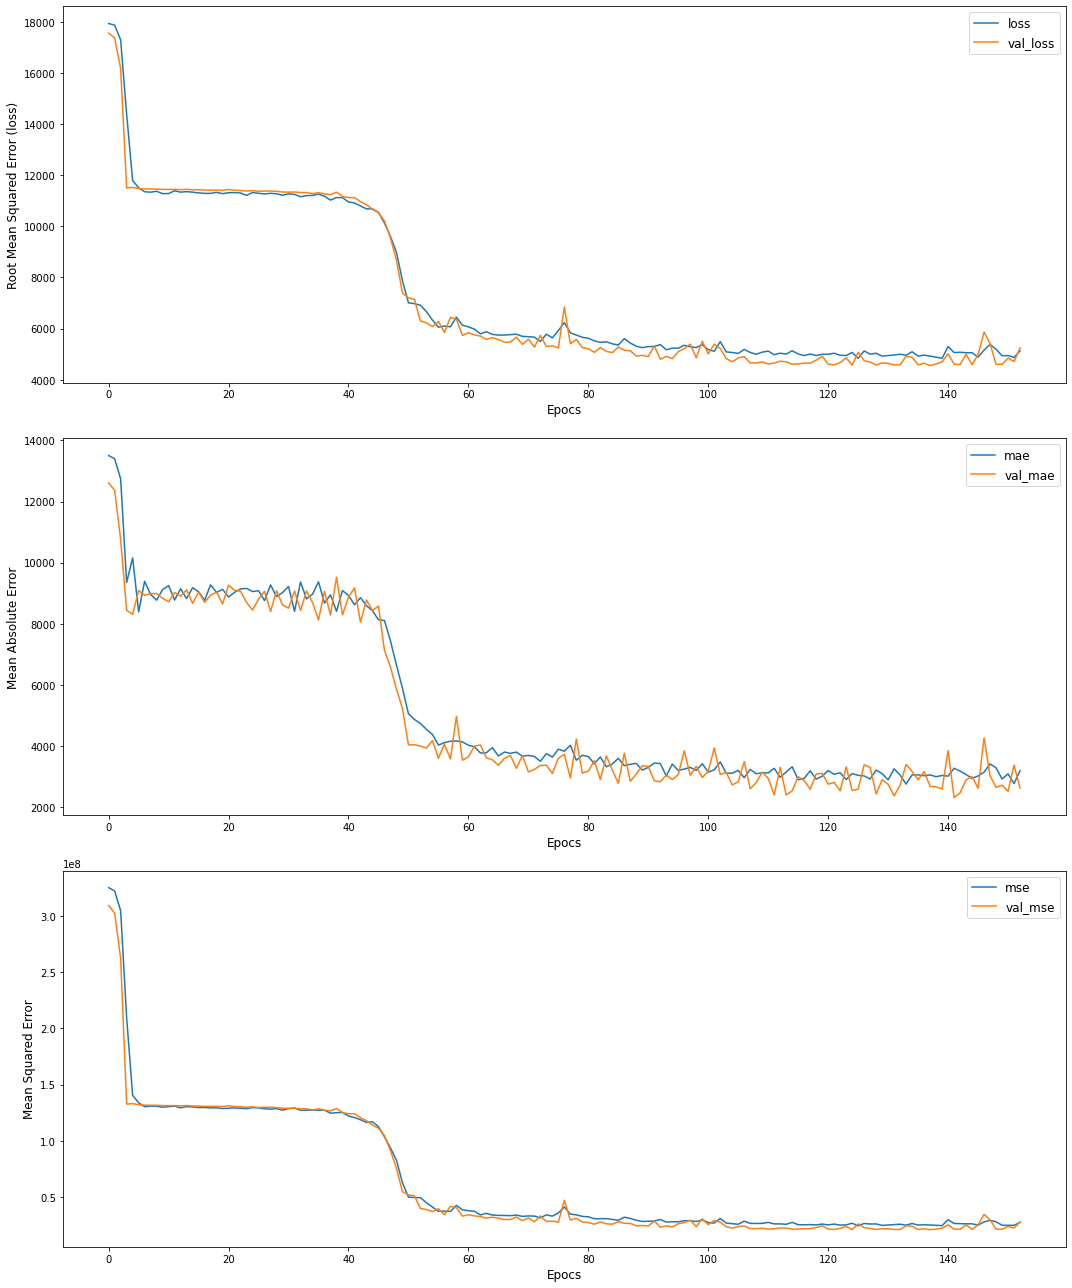

In [335]:
epoc_plots(history47)

In [336]:
y_pred47 = model47.predict(X_test)
r2_score(y_test, y_pred47) 

0.8284890021914393

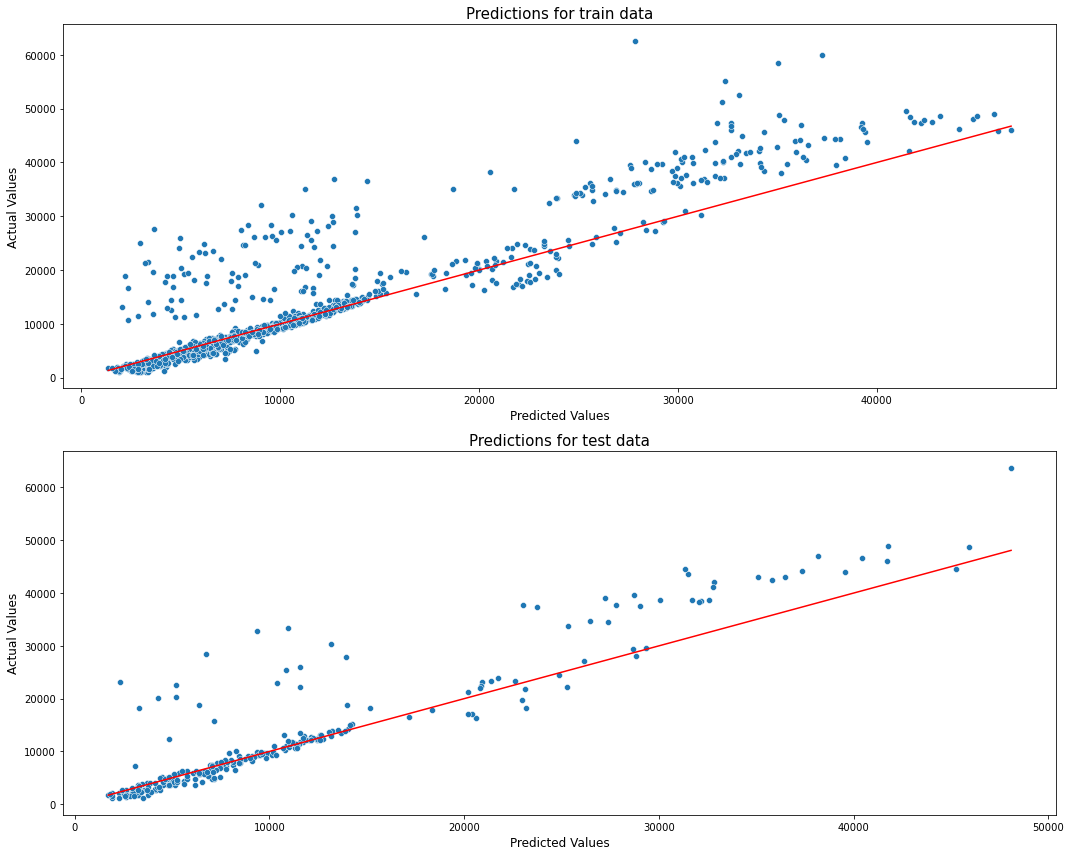

In [337]:
regression_plots(y_pred47, model47)

In [338]:
check_min_max(y_pred47)

Predicted values

max: 48081.82421875
min: 1721.4981689453125

Actual values

max: 63770.42801
min: 1131.5066


In [339]:
# hmmm, something happened that is bad
# let me try to make the same arch perform better

In [346]:
# param count: 7,401
model48 = Sequential() 

model48.add(Dense(25, input_dim=6, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model48.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model48.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model48.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model48.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model48.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model48.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model48.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model48.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model48.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model48.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model48.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model48.add(Dense(1, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))

model48.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [347]:
history48 = model48.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 55ms/step - loss: 17932.1777 - mse: 325280192.0000 - mae: 13511.6406 - val_loss: 17574.3418 - val_mse: 309695808.0000 - val_mae: 12629.9170
Epoch 2/300
14/14 [==============================] - 0s 13ms/step - loss: 17913.5195 - mse: 323406144.0000 - mae: 13446.2842 - val_loss: 17454.3516 - val_mse: 305488256.0000 - val_mae: 12472.1299
Epoch 3/300
14/14 [==============================] - 0s 14ms/step - loss: 17590.5840 - mse: 312370496.0000 - mae: 13042.3203 - val_loss: 16714.6504 - val_mse: 280180960.0000 - val_mae: 11485.8535
Epoch 4/300
14/14 [==============================] - 0s 12ms/step - loss: 15779.6387 - mse: 253065216.0000 - mae: 10761.9561 - val_loss: 12983.8672 - val_mse: 169144720.0000 - val_mae: 7590.5469
Epoch 5/300
14/14 [==============================] - 0s 14ms/step - loss: 11973.2373 - mse: 144762800.0000 - mae: 9446.0908 - val_loss: 11599.8213 - val_mse: 134815680.0000 - val_mae: 9635.2627
Epoch 6/300
14/14 [====

Epoch 43/300
14/14 [==============================] - 0s 8ms/step - loss: 6181.7988 - mse: 38889208.0000 - mae: 4135.3003 - val_loss: 7251.0723 - val_mse: 52743460.0000 - val_mae: 4007.9016
Epoch 44/300
14/14 [==============================] - 0s 8ms/step - loss: 6470.4023 - mse: 43355284.0000 - mae: 4301.5122 - val_loss: 6274.1611 - val_mse: 39513824.0000 - val_mae: 5097.1943
Epoch 45/300
14/14 [==============================] - 0s 9ms/step - loss: 6234.5977 - mse: 39908616.0000 - mae: 4330.8906 - val_loss: 5545.6763 - val_mse: 30924420.0000 - val_mae: 3509.9048
Epoch 46/300
14/14 [==============================] - 0s 13ms/step - loss: 5783.7866 - mse: 34081412.0000 - mae: 3595.7134 - val_loss: 5464.9722 - val_mse: 30022998.0000 - val_mae: 3731.9795
Epoch 47/300
14/14 [==============================] - 0s 14ms/step - loss: 5803.8203 - mse: 34048148.0000 - mae: 3996.4360 - val_loss: 5595.0986 - val_mse: 31441160.0000 - val_mae: 4148.3174
Epoch 48/300
14/14 [============================

Epoch 86/300
14/14 [==============================] - 0s 8ms/step - loss: 5047.8252 - mse: 26554640.0000 - mae: 3104.2754 - val_loss: 4907.8804 - val_mse: 24282208.0000 - val_mae: 3020.0193
Epoch 87/300
14/14 [==============================] - 0s 10ms/step - loss: 5131.1333 - mse: 27440420.0000 - mae: 3121.8926 - val_loss: 5049.8809 - val_mse: 25757844.0000 - val_mae: 3286.6187
Epoch 88/300
14/14 [==============================] - 0s 10ms/step - loss: 5140.4668 - mse: 27123546.0000 - mae: 3179.8120 - val_loss: 4843.2280 - val_mse: 23663182.0000 - val_mae: 2973.9551
Epoch 89/300
14/14 [==============================] - 0s 10ms/step - loss: 5094.2285 - mse: 26669724.0000 - mae: 2885.3708 - val_loss: 4963.3018 - val_mse: 24755252.0000 - val_mae: 3762.4922
Epoch 90/300
14/14 [==============================] - 0s 8ms/step - loss: 5121.3740 - mse: 27026428.0000 - mae: 3042.0254 - val_loss: 4980.4556 - val_mse: 25037880.0000 - val_mae: 3253.0544
Epoch 91/300
14/14 [===========================

Epoch 129/300
14/14 [==============================] - 0s 13ms/step - loss: 4796.7837 - mse: 24853470.0000 - mae: 2845.4316 - val_loss: 4856.9966 - val_mse: 23751648.0000 - val_mae: 3652.6321
Epoch 130/300
14/14 [==============================] - 0s 8ms/step - loss: 4861.5122 - mse: 24807658.0000 - mae: 3069.0601 - val_loss: 4693.8252 - val_mse: 22224346.0000 - val_mae: 2785.6746
Epoch 131/300
14/14 [==============================] - 0s 9ms/step - loss: 4951.5708 - mse: 25277840.0000 - mae: 2693.4839 - val_loss: 4821.3452 - val_mse: 23392870.0000 - val_mae: 3739.5391
Epoch 132/300
14/14 [==============================] - 0s 10ms/step - loss: 4993.4463 - mse: 26306036.0000 - mae: 3055.7505 - val_loss: 4779.9761 - val_mse: 22971868.0000 - val_mae: 2642.7510
Epoch 133/300
14/14 [==============================] - 0s 8ms/step - loss: 4887.2520 - mse: 24822594.0000 - mae: 3168.1519 - val_loss: 4913.6997 - val_mse: 24353584.0000 - val_mae: 2628.8193
Epoch 134/300
14/14 [======================

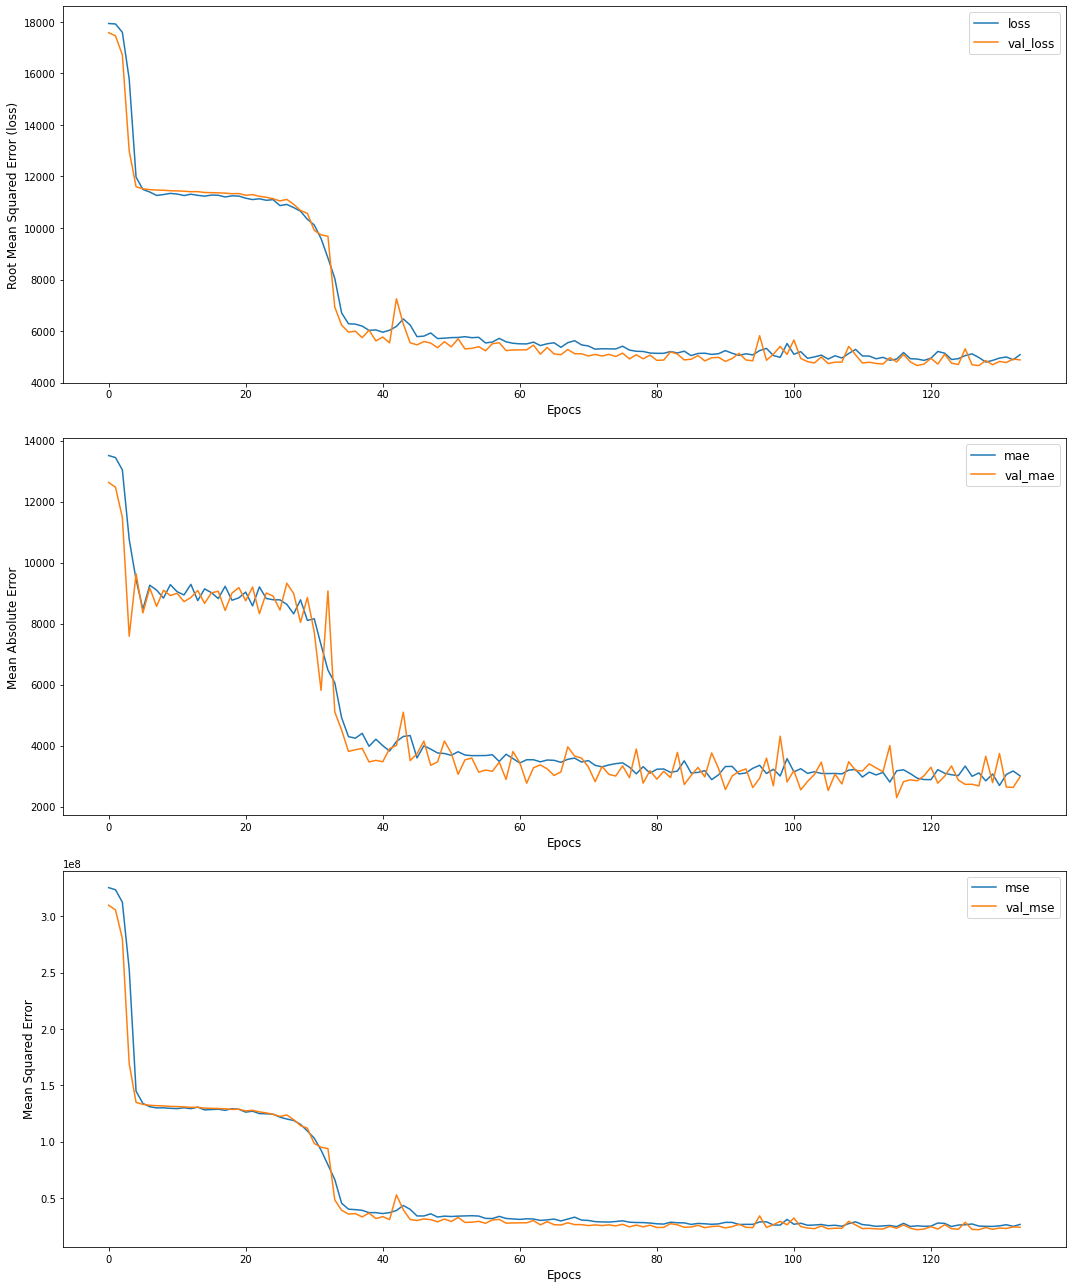

In [348]:
epoc_plots(history48)

In [349]:
y_pred48 = model48.predict(X_test)
r2_score(y_test, y_pred48) 

0.8644383694917573

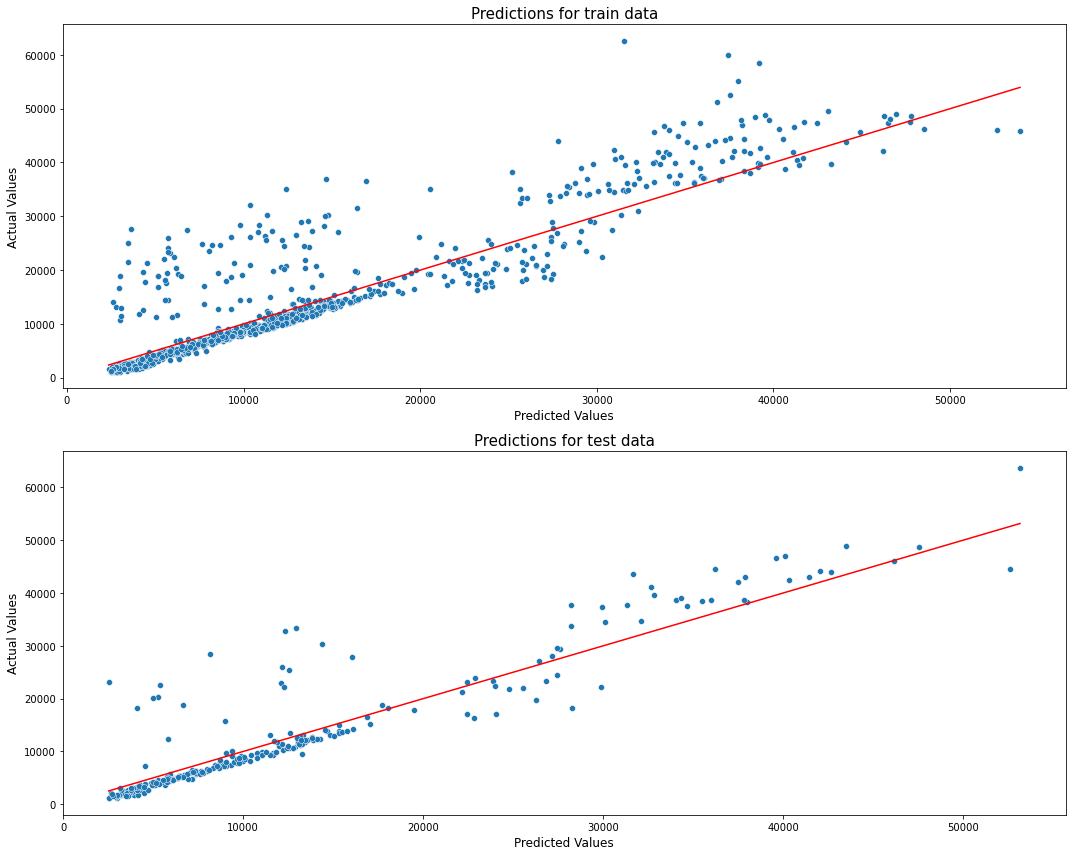

In [350]:
regression_plots(y_pred48, model48)

In [351]:
check_min_max(y_pred48)

Predicted values

max: 53172.88671875
min: 2519.046630859375

Actual values

max: 63770.42801
min: 1131.5066


In [354]:
# param count: 13,851
model49 = Sequential() 

model49.add(Dense(25, input_dim=6, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model49.add(Dense(1, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))

model49.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [356]:
history49 = model49.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 84ms/step - loss: 17920.8887 - mse: 324810880.0000 - mae: 13493.9824 - val_loss: 17510.9316 - val_mse: 307467232.0000 - val_mae: 12547.7617
Epoch 2/300
14/14 [==============================] - 0s 24ms/step - loss: 17400.0527 - mse: 307609152.0000 - mae: 12878.1504 - val_loss: 15677.7285 - val_mse: 246512960.0000 - val_mae: 10100.1494
Epoch 3/300
14/14 [==============================] - 0s 16ms/step - loss: 12978.8408 - mse: 171345072.0000 - mae: 9675.4473 - val_loss: 11601.1113 - val_mse: 134856352.0000 - val_mae: 9267.1270
Epoch 4/300
14/14 [==============================] - 0s 14ms/step - loss: 11691.4053 - mse: 139386896.0000 - mae: 8307.1982 - val_loss: 11625.3564 - val_mse: 135412576.0000 - val_mae: 9432.9287
Epoch 5/300
14/14 [==============================] - 0s 21ms/step - loss: 11438.2734 - mse: 133116056.0000 - mae: 9147.2402 - val_loss: 11537.9844 - val_mse: 133433896.0000 - val_mae: 8658.4688
Epoch 6/300
14/14 [=======

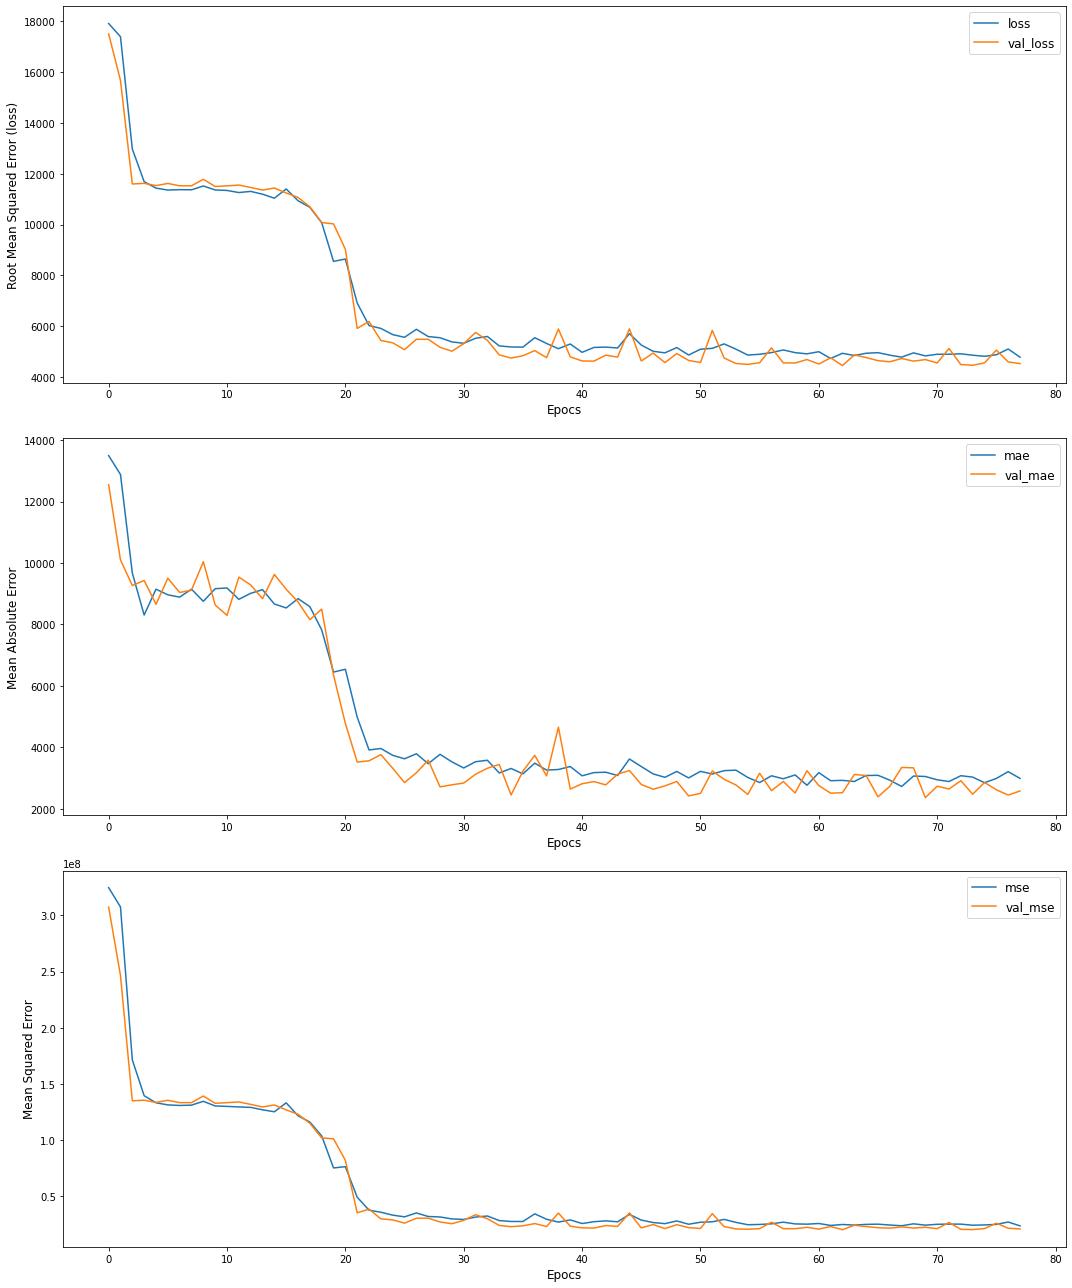

In [357]:
epoc_plots(history49)

In [358]:
y_pred49 = model49.predict(X_test)
r2_score(y_test, y_pred49) 

0.875263411675966

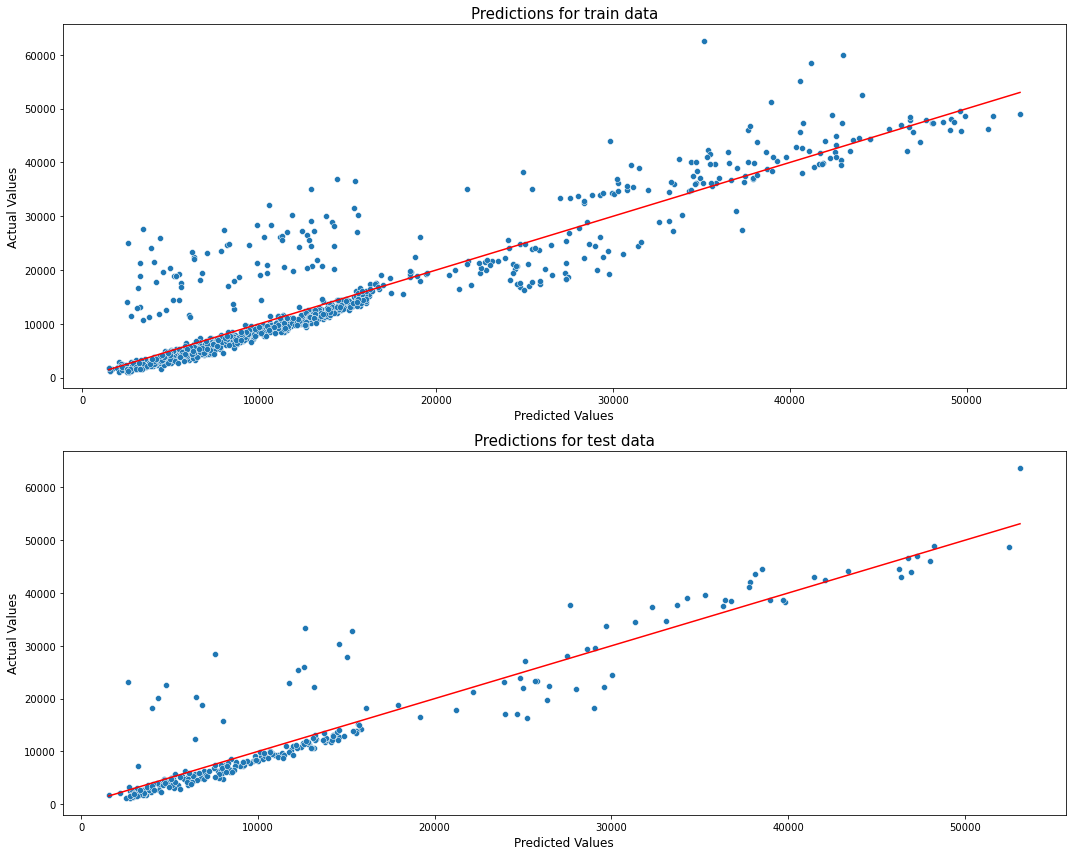

In [359]:
regression_plots(y_pred49, model49)

In [360]:
check_min_max(y_pred49)

Predicted values

max: 53123.0390625
min: 1559.44921875

Actual values

max: 63770.42801
min: 1131.5066


In [361]:
# hmmm, interesting
# more layers are great 
# lets add some more

In [362]:
# param count: 9,101
model50 = Sequential() 

model50.add(Dense(25, input_dim=6, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model50.add(Dense(1, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))

model50.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [364]:
history50 = model50.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 102ms/step - loss: 17825.1895 - mse: 325461152.0000 - mae: 13518.3047 - val_loss: 17593.0195 - val_mse: 310352992.0000 - val_mae: 12654.9531
Epoch 2/300
14/14 [==============================] - 0s 17ms/step - loss: 17959.0762 - mse: 325451744.0000 - mae: 13517.9531 - val_loss: 17592.7832 - val_mse: 310344704.0000 - val_mae: 12654.6260
Epoch 3/300
14/14 [==============================] - 0s 21ms/step - loss: 18000.6582 - mse: 325441632.0000 - mae: 13517.5732 - val_loss: 17592.4453 - val_mse: 310332736.0000 - val_mae: 12654.1553
Epoch 4/300
14/14 [==============================] - 0s 26ms/step - loss: 18006.8242 - mse: 325426016.0000 - mae: 13516.9980 - val_loss: 17591.9238 - val_mse: 310314400.0000 - val_mae: 12653.4307
Epoch 5/300
14/14 [==============================] - 0s 16ms/step - loss: 17865.9062 - mse: 325402016.0000 - mae: 13516.1328 - val_loss: 17591.1582 - val_mse: 310287488.0000 - val_mae: 12652.3682
Epoch 6/300
14/14 [

Epoch 86/300
14/14 [==============================] - 0s 10ms/step - loss: 4973.5093 - mse: 25830910.0000 - mae: 3001.0105 - val_loss: 4856.0752 - val_mse: 23719888.0000 - val_mae: 3497.4072
Epoch 87/300
14/14 [==============================] - 0s 10ms/step - loss: 4977.8223 - mse: 25317612.0000 - mae: 3163.9810 - val_loss: 4798.6421 - val_mse: 23395788.0000 - val_mae: 2744.0679
Epoch 88/300
14/14 [==============================] - 0s 9ms/step - loss: 4904.9468 - mse: 25232782.0000 - mae: 2914.1890 - val_loss: 4727.1299 - val_mse: 22489364.0000 - val_mae: 3024.0325
Epoch 89/300
14/14 [==============================] - 0s 11ms/step - loss: 5083.0088 - mse: 26185736.0000 - mae: 3227.1150 - val_loss: 4907.2378 - val_mse: 24445496.0000 - val_mae: 2909.7263
Epoch 90/300
14/14 [==============================] - 0s 10ms/step - loss: 5124.2891 - mse: 27379530.0000 - mae: 3095.7778 - val_loss: 5033.8877 - val_mse: 25740056.0000 - val_mae: 3048.0562
Epoch 91/300
14/14 [==========================

Epoch 129/300
14/14 [==============================] - 0s 13ms/step - loss: 5119.0762 - mse: 26703802.0000 - mae: 3096.2266 - val_loss: 4715.7290 - val_mse: 22446762.0000 - val_mae: 3425.2546
Epoch 130/300
14/14 [==============================] - 0s 10ms/step - loss: 5003.1270 - mse: 26372326.0000 - mae: 2994.1182 - val_loss: 4924.4111 - val_mse: 24606474.0000 - val_mae: 2735.9810
Epoch 131/300
14/14 [==============================] - 0s 9ms/step - loss: 4988.2471 - mse: 25703122.0000 - mae: 3114.2861 - val_loss: 4674.7876 - val_mse: 22010714.0000 - val_mae: 2849.3586
Epoch 132/300
14/14 [==============================] - 0s 13ms/step - loss: 4943.0796 - mse: 25208332.0000 - mae: 2978.4045 - val_loss: 4601.2646 - val_mse: 21404538.0000 - val_mae: 2845.7905
Epoch 133/300
14/14 [==============================] - 0s 11ms/step - loss: 4847.4399 - mse: 24282912.0000 - mae: 2987.5928 - val_loss: 4601.5552 - val_mse: 21388396.0000 - val_mae: 2901.4089
Epoch 134/300
14/14 [====================

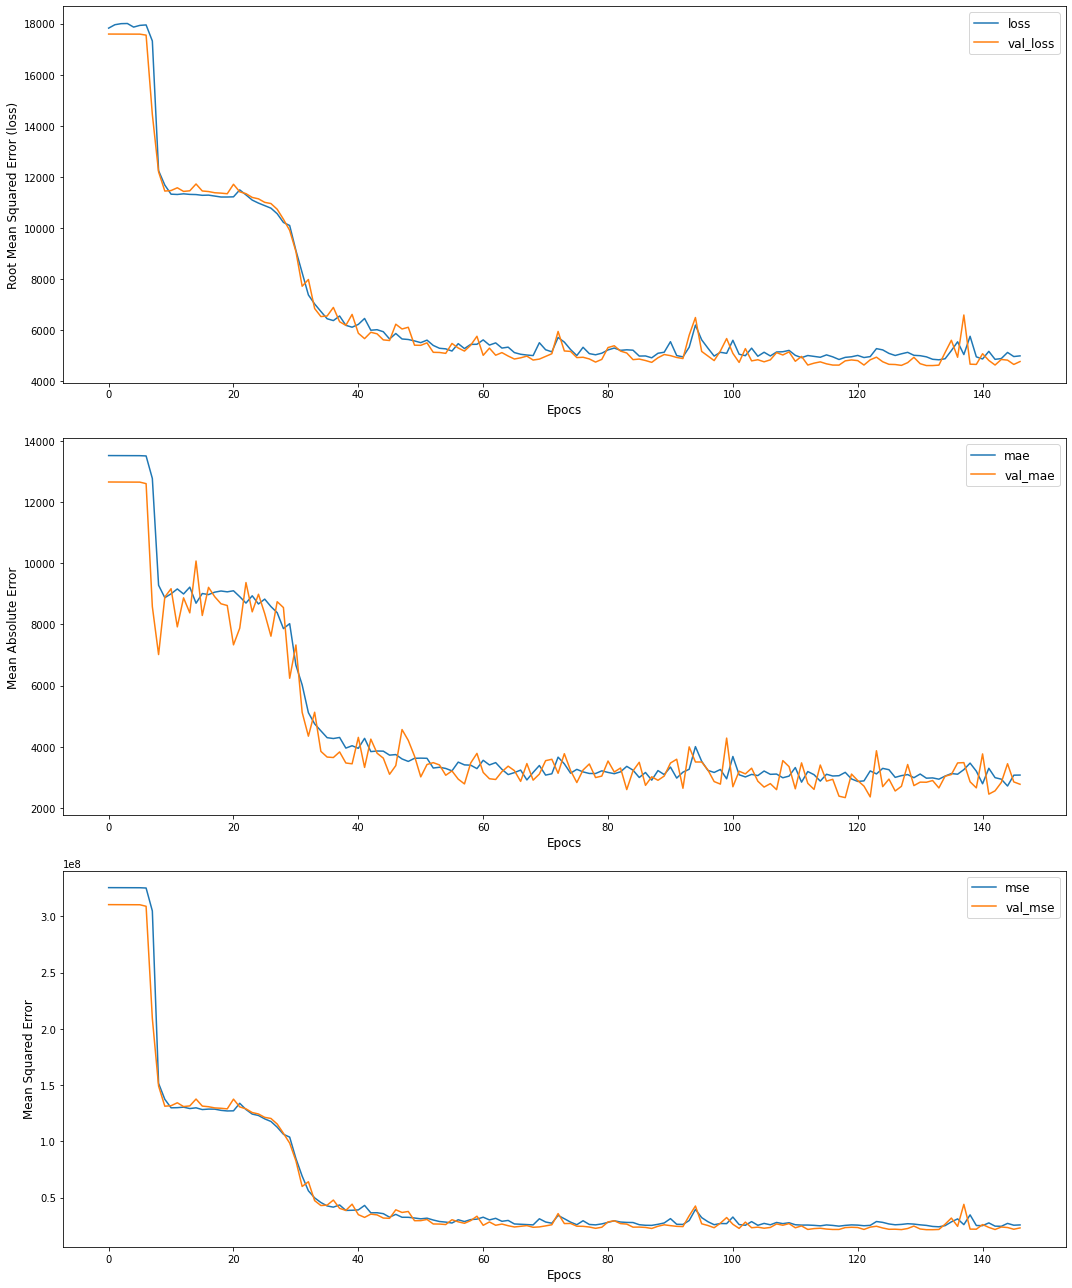

In [365]:
epoc_plots(history50)

In [366]:
y_pred50 = model50.predict(X_test)
r2_score(y_test, y_pred50) 

0.8690424571398727

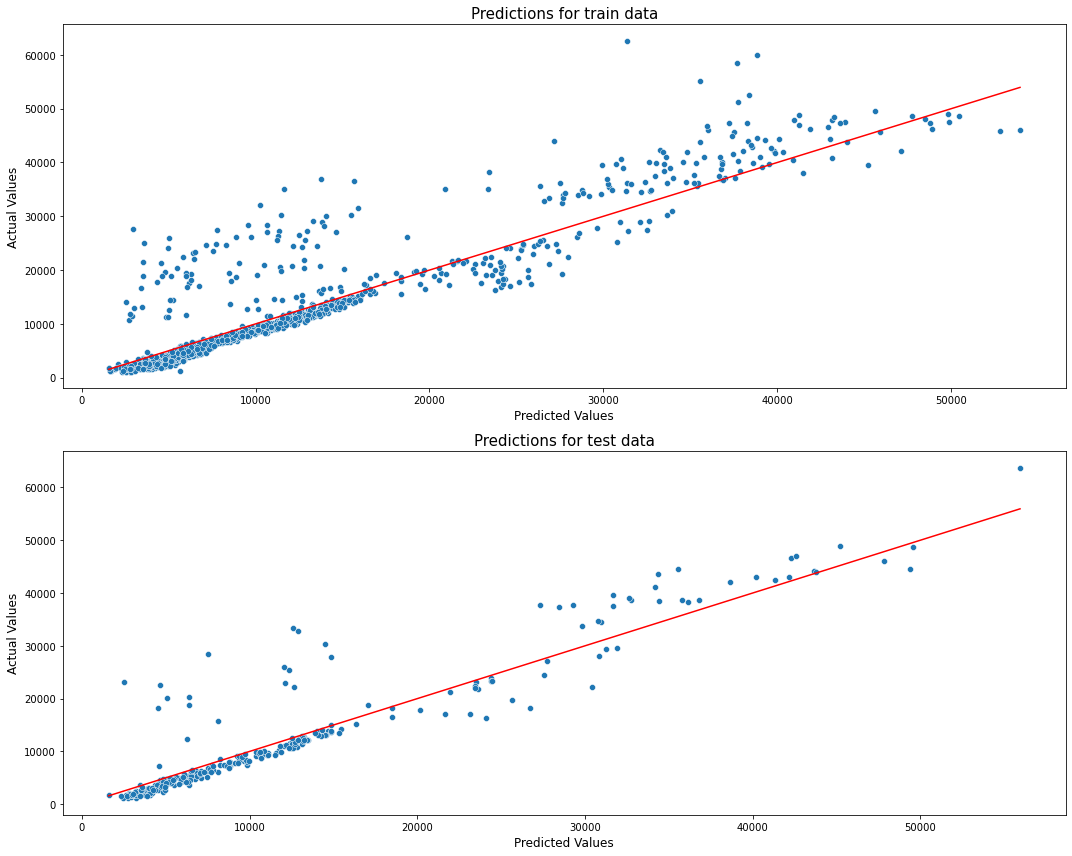

In [367]:
regression_plots(y_pred50, model50)

In [368]:
check_min_max(y_pred50)

Predicted values

max: 55949.6015625
min: 1597.5013427734375

Actual values

max: 63770.42801
min: 1131.5066


In [369]:
# less r2 score, but less total params too
# lets try to match the param count to ~14k 
# with a deeper NN, and see how it performs

In [395]:
# param count: 14,141
model51 = Sequential() 

model51.add(Dense(50, input_dim=6, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(50, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(50, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(50, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(25, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(5, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model51.add(Dense(1, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))

model51.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [396]:
history51 = model51.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 79ms/step - loss: 17959.5391 - mse: 325456128.0000 - mae: 13518.1064 - val_loss: 17592.6738 - val_mse: 310340736.0000 - val_mae: 12654.4775
Epoch 2/300
14/14 [==============================] - 0s 17ms/step - loss: 17980.6191 - mse: 325423456.0000 - mae: 13516.9219 - val_loss: 17590.2480 - val_mse: 310255296.0000 - val_mae: 12651.3574
Epoch 3/300
14/14 [==============================] - 0s 13ms/step - loss: 17870.9844 - mse: 324861056.0000 - mae: 13497.6777 - val_loss: 17528.8262 - val_mse: 308094784.0000 - val_mae: 12572.7686
Epoch 4/300
14/14 [==============================] - 0s 20ms/step - loss: 17603.5508 - mse: 312783264.0000 - mae: 13066.0635 - val_loss: 16270.7754 - val_mse: 265500304.0000 - val_mae: 10914.5879
Epoch 5/300
14/14 [==============================] - 0s 14ms/step - loss: 13907.4951 - mse: 201049024.0000 - mae: 9860.9824 - val_loss: 11848.7227 - val_mse: 140624368.0000 - val_mae: 10270.1572
Epoch 6/300
14/14 [==

14/14 [==============================] - 0s 12ms/step - loss: 5355.1909 - mse: 29379494.0000 - mae: 3290.4404 - val_loss: 5832.6875 - val_mse: 34236348.0000 - val_mae: 3248.7825
Epoch 87/300
14/14 [==============================] - 0s 9ms/step - loss: 5332.9385 - mse: 29151658.0000 - mae: 3307.2544 - val_loss: 4907.5830 - val_mse: 24171390.0000 - val_mae: 3546.5005
Epoch 88/300
14/14 [==============================] - 0s 9ms/step - loss: 5250.5596 - mse: 28252744.0000 - mae: 3282.8330 - val_loss: 4815.3662 - val_mse: 23332652.0000 - val_mae: 3175.6482
Epoch 89/300
14/14 [==============================] - 0s 10ms/step - loss: 5144.3867 - mse: 27253070.0000 - mae: 3143.3442 - val_loss: 4764.6094 - val_mse: 22808798.0000 - val_mae: 3161.5598
Epoch 90/300
14/14 [==============================] - 0s 10ms/step - loss: 5074.2856 - mse: 26530900.0000 - mae: 3096.5845 - val_loss: 4776.9834 - val_mse: 22942152.0000 - val_mae: 3329.3823
Epoch 91/300
14/14 [==============================] - 0s 9ms

Epoch 129/300
14/14 [==============================] - 0s 10ms/step - loss: 5012.6274 - mse: 26470568.0000 - mae: 3235.2905 - val_loss: 4781.5898 - val_mse: 23101042.0000 - val_mae: 2576.7246
Epoch 130/300
14/14 [==============================] - 0s 10ms/step - loss: 4978.6553 - mse: 25629114.0000 - mae: 2854.5525 - val_loss: 4650.2148 - val_mse: 21787878.0000 - val_mae: 3160.3838
Epoch 131/300
14/14 [==============================] - 0s 10ms/step - loss: 4873.6099 - mse: 24612198.0000 - mae: 3012.1375 - val_loss: 5299.6484 - val_mse: 28391426.0000 - val_mae: 2762.4600
Epoch 132/300
14/14 [==============================] - 0s 9ms/step - loss: 5046.3315 - mse: 26742024.0000 - mae: 3114.8860 - val_loss: 4661.6313 - val_mse: 21863970.0000 - val_mae: 2813.5530
Epoch 133/300
14/14 [==============================] - 0s 9ms/step - loss: 4979.6436 - mse: 25209956.0000 - mae: 2980.4612 - val_loss: 4702.5122 - val_mse: 22360170.0000 - val_mae: 2650.4402


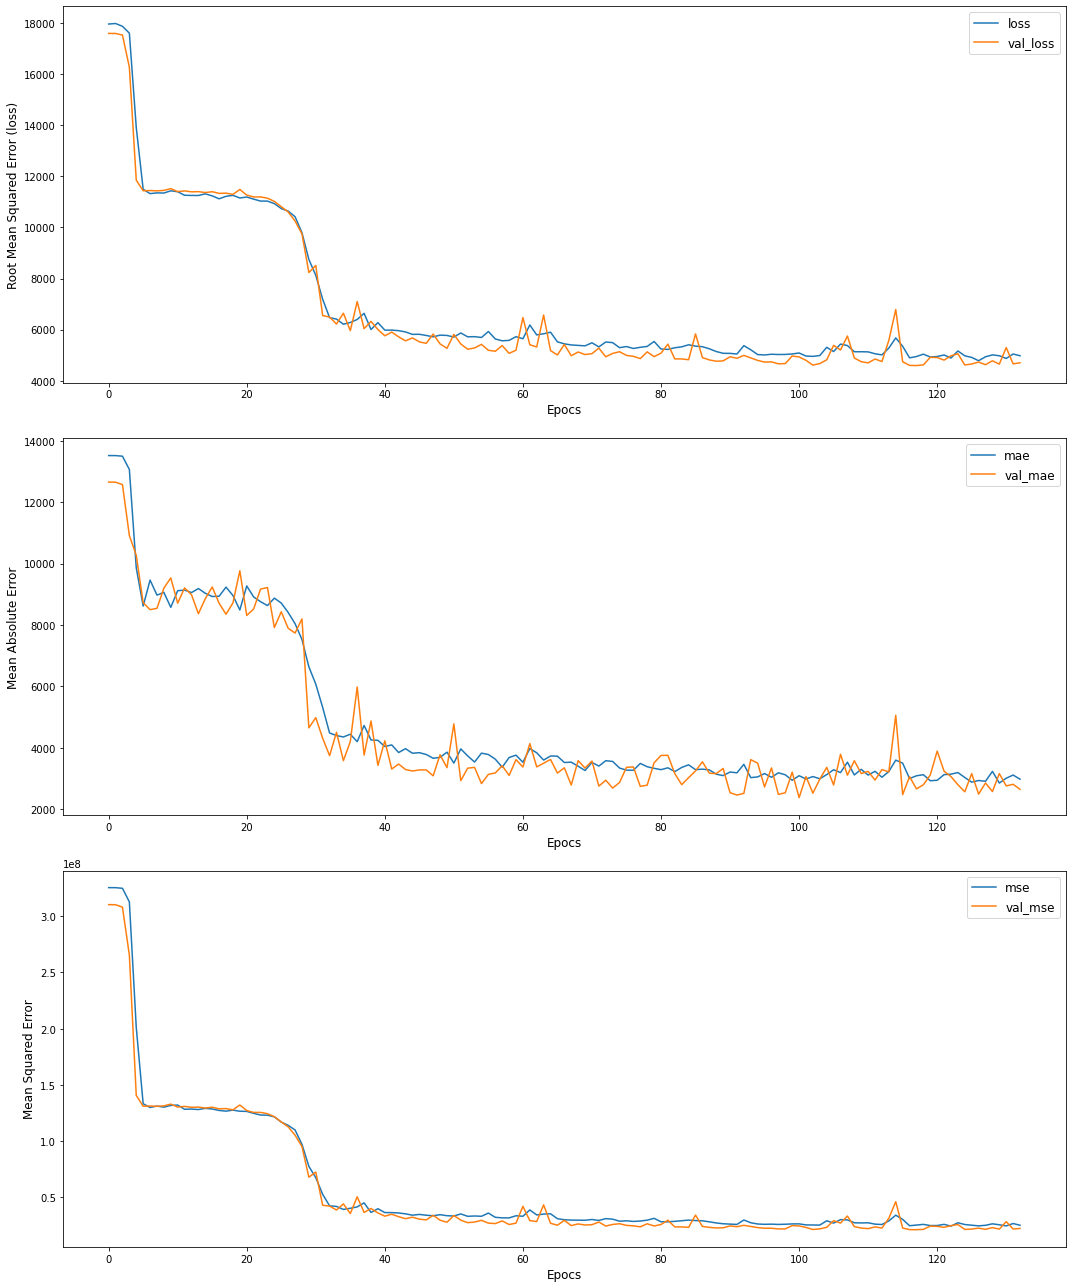

In [397]:
epoc_plots(history51)

In [398]:
y_pred51 = model51.predict(X_test)
r2_score(y_test, y_pred51) 

0.8682989573249962

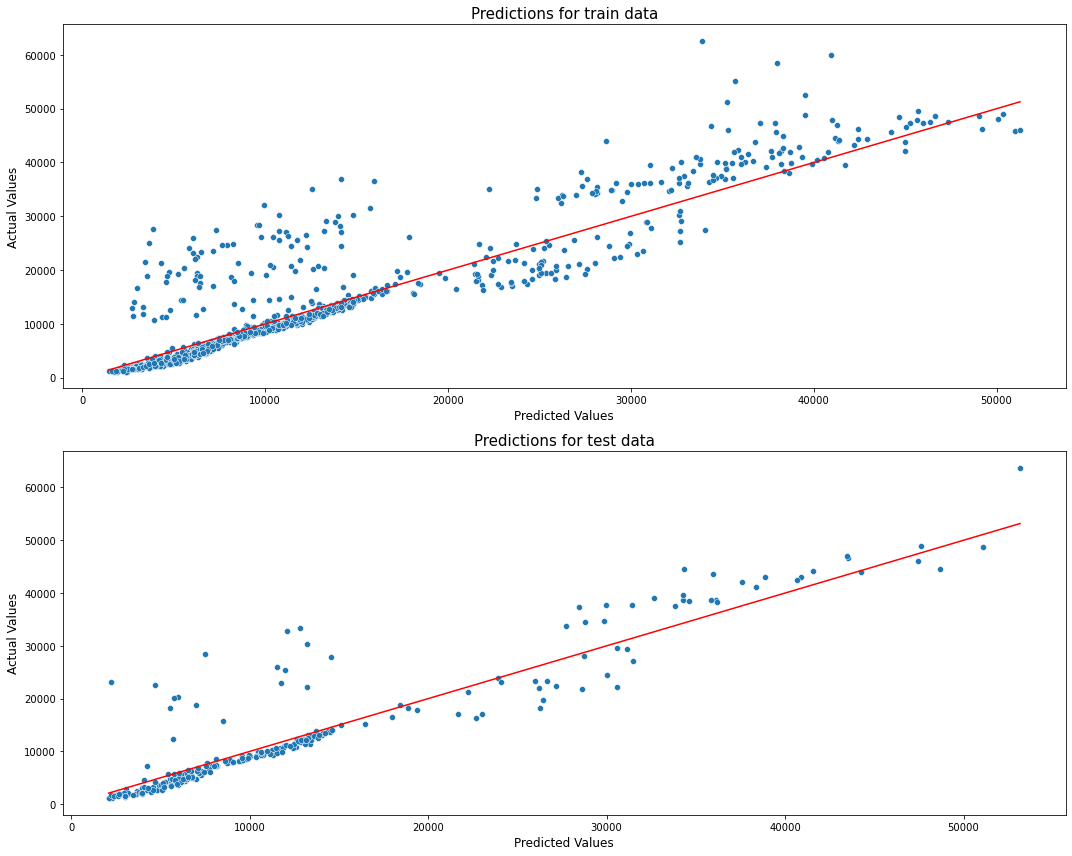

In [399]:
regression_plots(y_pred51, model51)

In [400]:
# so the model doesn't like more layers of less neurons
# lets try to fix that 

In [401]:
# param count: 29,101
model52 = Sequential() 

model52.add(Dense(75, input_dim=6, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model52.add(Dense(75, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model52.add(Dense(75, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model52.add(Dense(75, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model52.add(Dense(75, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model52.add(Dense(75, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model52.add(Dense(1, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))

model52.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [402]:
history52 = model52.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 38ms/step - loss: 17761.4355 - mse: 323557664.0000 - mae: 13450.6387 - val_loss: 17419.6426 - val_mse: 304273728.0000 - val_mae: 12431.2744
Epoch 2/300
14/14 [==============================] - 0s 13ms/step - loss: 17415.0430 - mse: 306345472.0000 - mae: 12817.9541 - val_loss: 16193.6963 - val_mse: 262998624.0000 - val_mae: 10803.9023
Epoch 3/300
14/14 [==============================] - 0s 9ms/step - loss: 14433.0498 - mse: 213905376.0000 - mae: 9363.1523 - val_loss: 11486.2725 - val_mse: 132261464.0000 - val_mae: 8222.4893
Epoch 4/300
14/14 [==============================] - 0s 10ms/step - loss: 11708.4072 - mse: 137848096.0000 - mae: 10016.5654 - val_loss: 11449.3789 - val_mse: 131401688.0000 - val_mae: 8393.4785
Epoch 5/300
14/14 [==============================] - 0s 10ms/step - loss: 11394.5059 - mse: 131927712.0000 - mae: 8466.3789 - val_loss: 11426.0605 - val_mse: 130825616.0000 - val_mae: 9042.4902
Epoch 6/300
14/14 [=======

14/14 [==============================] - 0s 12ms/step - loss: 5406.9297 - mse: 29816060.0000 - mae: 3462.2461 - val_loss: 5125.9634 - val_mse: 26388716.0000 - val_mae: 3441.1401
Epoch 87/300
14/14 [==============================] - 0s 9ms/step - loss: 5324.1030 - mse: 29194016.0000 - mae: 3422.3914 - val_loss: 5217.0620 - val_mse: 27437242.0000 - val_mae: 2950.1089
Epoch 88/300
14/14 [==============================] - 0s 8ms/step - loss: 5340.9800 - mse: 29065364.0000 - mae: 3376.9143 - val_loss: 5019.9727 - val_mse: 25353066.0000 - val_mae: 3505.6162
Epoch 89/300
14/14 [==============================] - 0s 9ms/step - loss: 5338.0303 - mse: 29281410.0000 - mae: 3363.9387 - val_loss: 5080.9375 - val_mse: 25932802.0000 - val_mae: 3543.1277
Epoch 90/300
14/14 [==============================] - 0s 8ms/step - loss: 5326.9399 - mse: 29544962.0000 - mae: 3337.7520 - val_loss: 5000.6582 - val_mse: 25199014.0000 - val_mae: 2964.0762
Epoch 91/300
14/14 [==============================] - 0s 8ms/s

Epoch 129/300
14/14 [==============================] - 0s 23ms/step - loss: 4961.1069 - mse: 25987818.0000 - mae: 2778.2175 - val_loss: 4729.4746 - val_mse: 22515690.0000 - val_mae: 3391.7622
Epoch 130/300
14/14 [==============================] - 0s 19ms/step - loss: 4929.7568 - mse: 25351976.0000 - mae: 3006.3225 - val_loss: 4656.8237 - val_mse: 21827990.0000 - val_mae: 2938.2898
Epoch 131/300
14/14 [==============================] - 0s 9ms/step - loss: 5070.0977 - mse: 26870472.0000 - mae: 3231.8984 - val_loss: 4771.9048 - val_mse: 22957310.0000 - val_mae: 2669.4187
Epoch 132/300
14/14 [==============================] - 0s 8ms/step - loss: 4966.1865 - mse: 25453180.0000 - mae: 2887.4031 - val_loss: 4726.2988 - val_mse: 22469106.0000 - val_mae: 3448.1738
Epoch 133/300
14/14 [==============================] - 0s 7ms/step - loss: 4867.9678 - mse: 25056610.0000 - mae: 3150.0791 - val_loss: 5086.5942 - val_mse: 26097762.0000 - val_mae: 2466.6841
Epoch 134/300
14/14 [======================

Epoch 172/300
14/14 [==============================] - 0s 8ms/step - loss: 4822.8320 - mse: 23655726.0000 - mae: 2906.5000 - val_loss: 4931.0718 - val_mse: 24527034.0000 - val_mae: 2751.2549


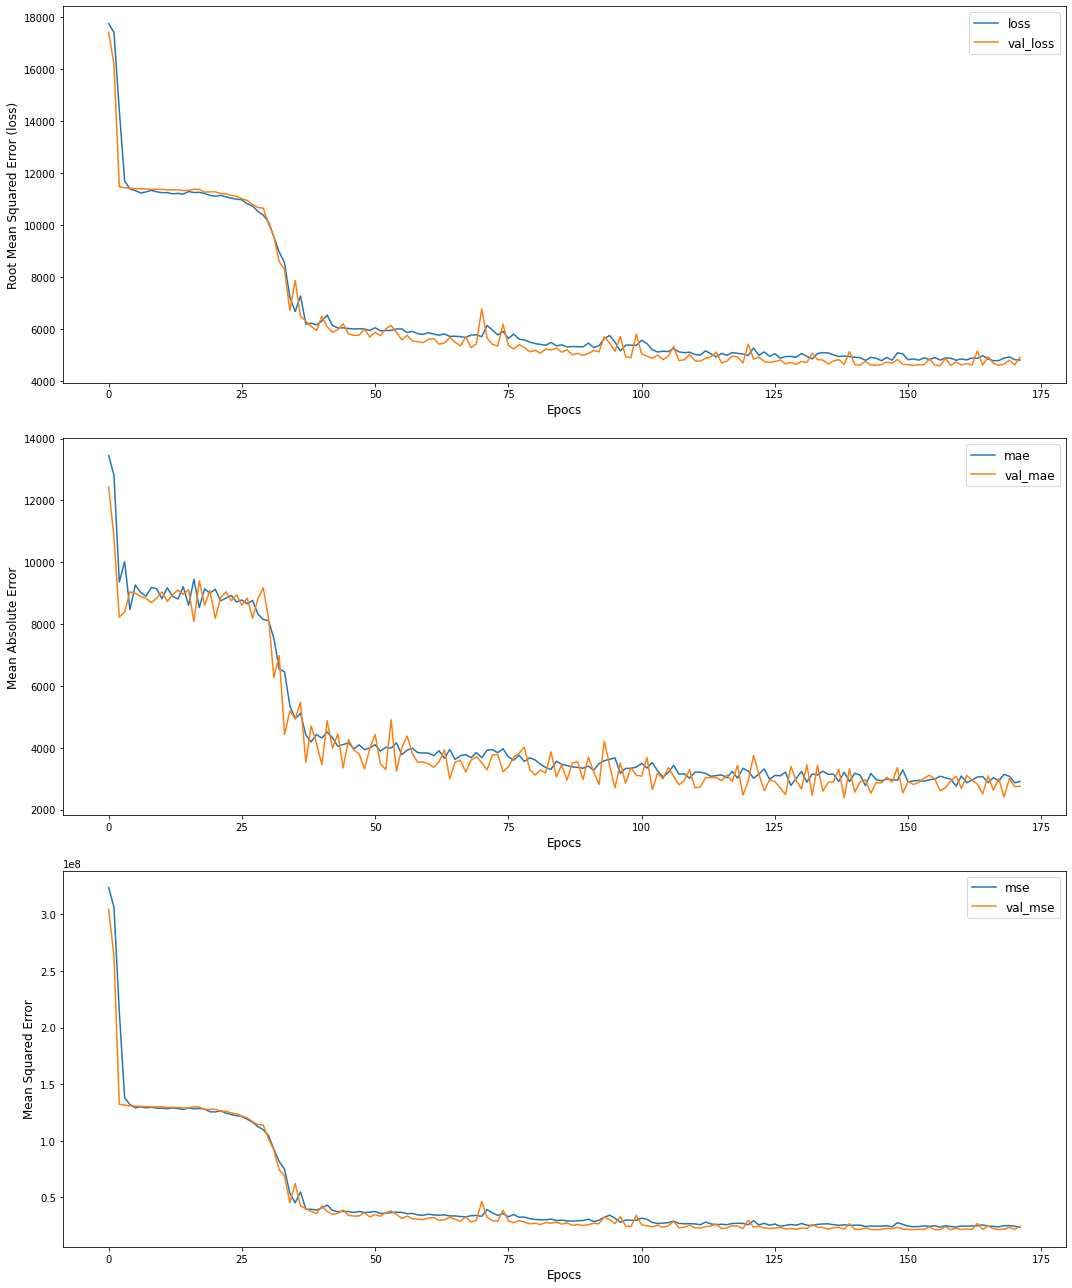

In [403]:
epoc_plots(history52)

In [404]:
y_pred52 = model52.predict(X_test)
r2_score(y_test, y_pred52) 

0.8628203612144675

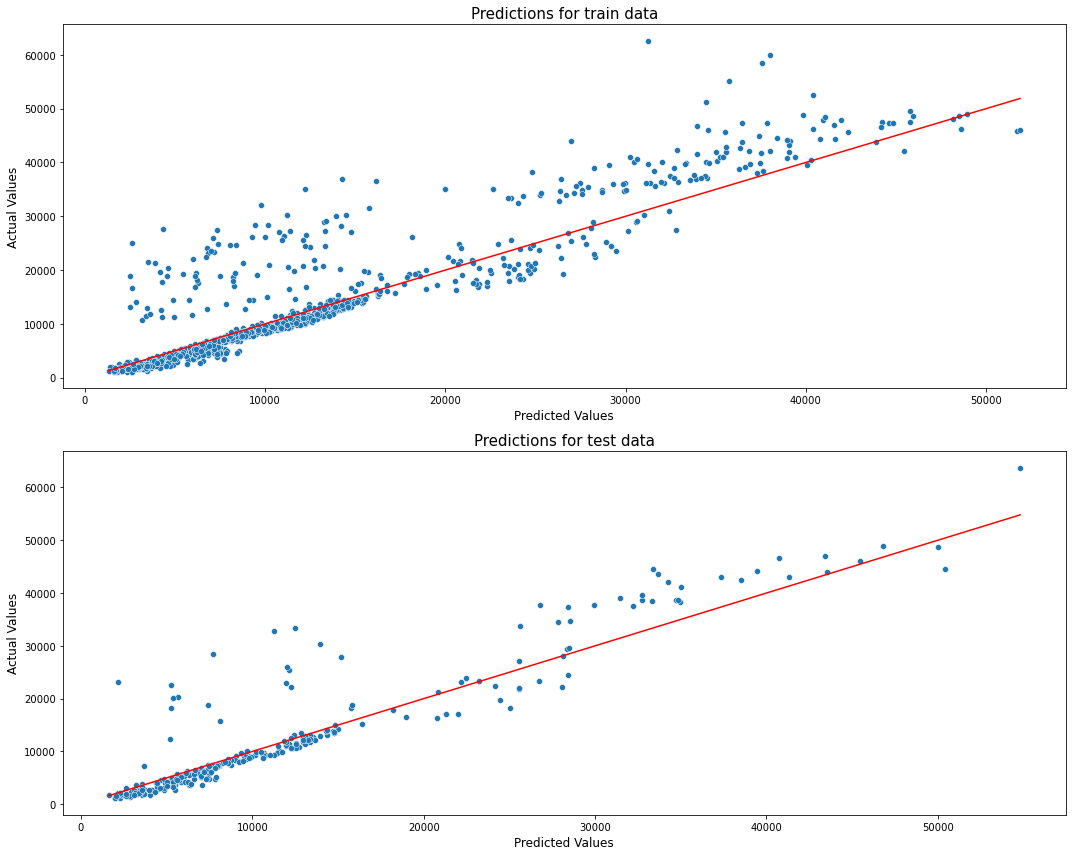

In [405]:
regression_plots(y_pred52, model52)

In [406]:
check_min_max(y_pred52)

Predicted values

max: 54796.46484375
min: 1616.5828857421875

Actual values

max: 63770.42801
min: 1131.5066


In [408]:
# hmmm, individual neuron count per layer 
# doesn't seem to perform that well when 
# the layer count is low
# so lets decrease the neuron count
# and make the layer count high

In [428]:
# param count: 14,191
model53 = Sequential() 

model53.add(Dense(30, input_dim=6, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
for _ in range(15):
    model53.add(Dense(30, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model53.add(Dense(1, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))

model53.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [430]:
history53 = model53.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 51ms/step - loss: 17945.5469 - mse: 325170368.0000 - mae: 13507.9355 - val_loss: 17560.7695 - val_mse: 309217408.0000 - val_mae: 12613.6797
Epoch 2/300
14/14 [==============================] - 0s 14ms/step - loss: 17729.8945 - mse: 320174464.0000 - mae: 13332.2383 - val_loss: 17101.4551 - val_mse: 293265856.0000 - val_mae: 12027.7314
Epoch 3/300
14/14 [==============================] - 0s 15ms/step - loss: 15877.5576 - mse: 259074704.0000 - mae: 10922.7451 - val_loss: 12225.1191 - val_mse: 149867584.0000 - val_mae: 6830.9487
Epoch 4/300
14/14 [==============================] - 0s 13ms/step - loss: 11989.6318 - mse: 144485824.0000 - mae: 9601.7041 - val_loss: 11705.5664 - val_mse: 137366880.0000 - val_mae: 7609.2197
Epoch 5/300
14/14 [==============================] - 0s 14ms/step - loss: 11490.5537 - mse: 134170760.0000 - mae: 8606.7344 - val_loss: 11632.2461 - val_mse: 135556256.0000 - val_mae: 9605.2910
Epoch 6/300
14/14 [======

14/14 [==============================] - 0s 10ms/step - loss: 4954.0664 - mse: 24928674.0000 - mae: 2978.5256 - val_loss: 4725.6226 - val_mse: 22589956.0000 - val_mae: 3119.0017
Epoch 87/300
14/14 [==============================] - 0s 9ms/step - loss: 4854.0898 - mse: 24755594.0000 - mae: 2999.6877 - val_loss: 4782.5391 - val_mse: 23184072.0000 - val_mae: 3308.9451
Epoch 88/300
14/14 [==============================] - 0s 9ms/step - loss: 4951.8579 - mse: 24995928.0000 - mae: 3069.9089 - val_loss: 4649.8042 - val_mse: 21882186.0000 - val_mae: 2652.7634
Epoch 89/300
14/14 [==============================] - 0s 8ms/step - loss: 4816.0591 - mse: 24289690.0000 - mae: 2907.6086 - val_loss: 4877.2598 - val_mse: 24117574.0000 - val_mae: 3328.1128
Epoch 90/300
14/14 [==============================] - 0s 8ms/step - loss: 4866.0151 - mse: 24784004.0000 - mae: 3065.6196 - val_loss: 4682.1460 - val_mse: 22213218.0000 - val_mae: 2322.8079
Epoch 91/300
14/14 [==============================] - 0s 10ms/

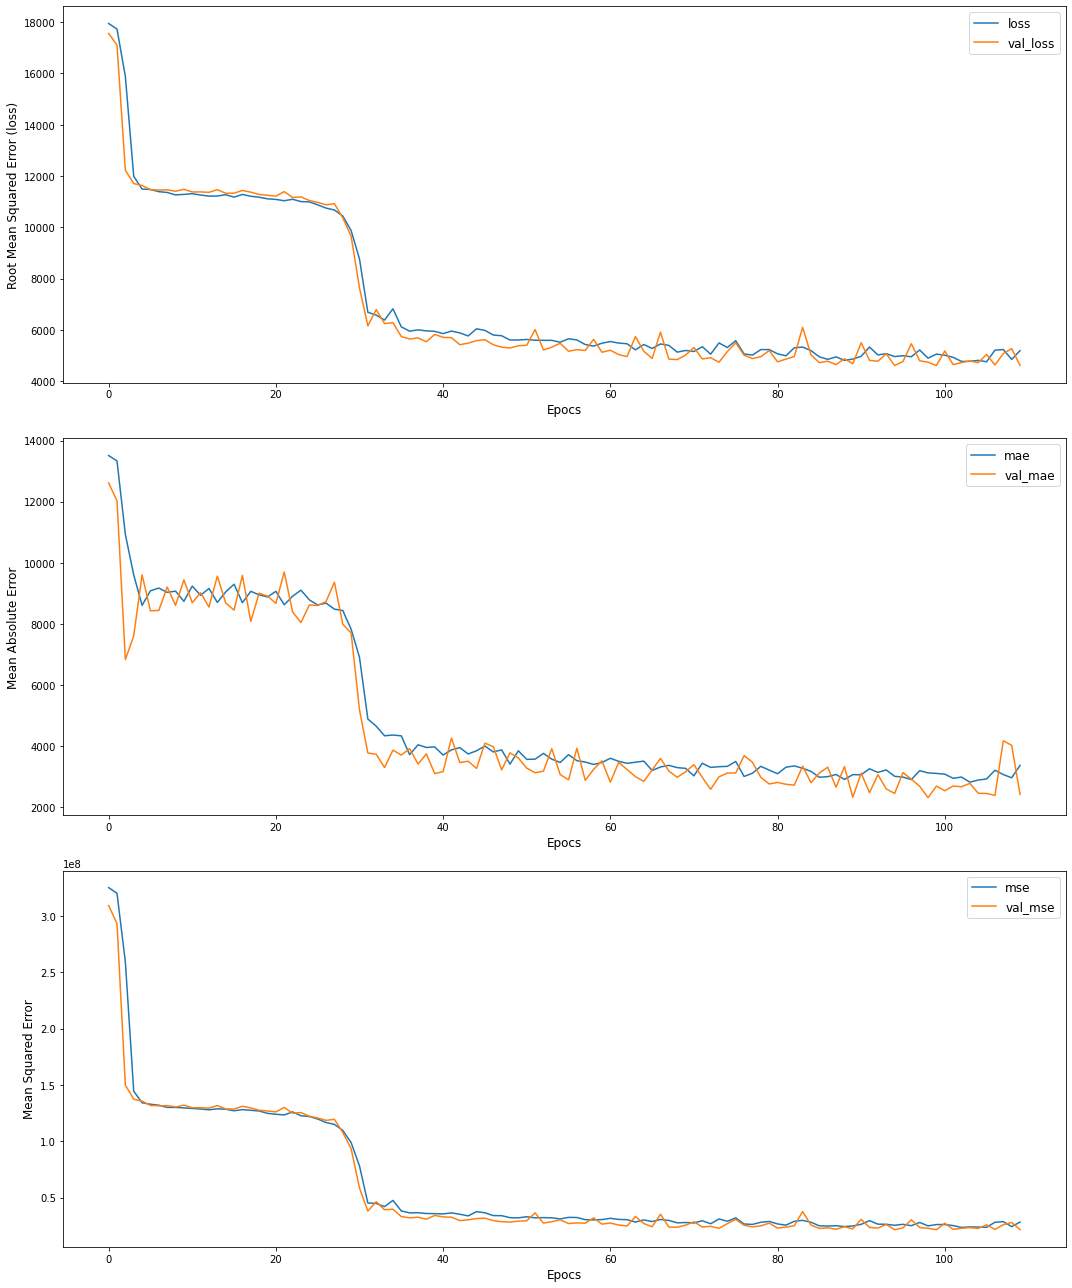

In [431]:
epoc_plots(history53)

In [432]:
y_pred53 = model53.predict(X_test)
r2_score(y_test, y_pred53) 

0.8740578898257473

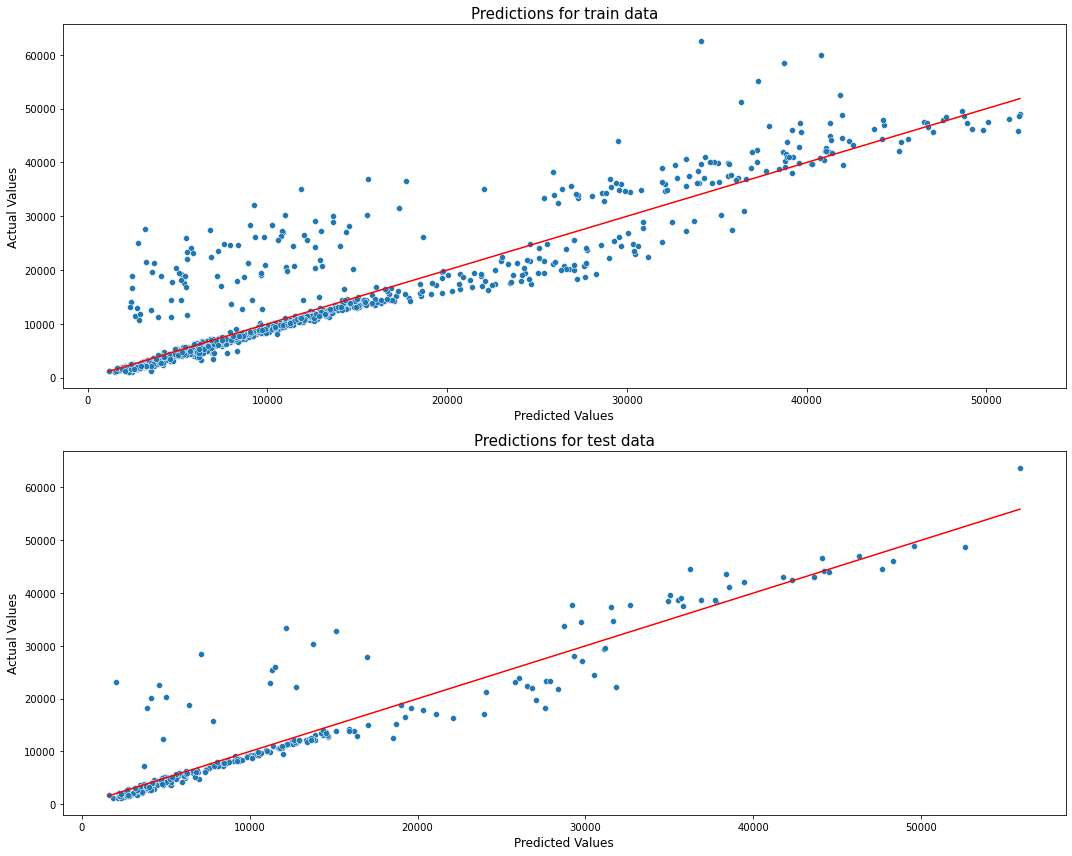

In [433]:
regression_plots(y_pred53, model53)

In [434]:
check_min_max(y_pred53)

Predicted values

max: 55891.46484375
min: 1588.843017578125

Actual values

max: 63770.42801
min: 1131.5066


In [435]:
# hmmm, that is a good r2 score for
# the amount of params this model has

In [440]:
# param count: 14,311
model54 = Sequential() 

model54.add(Dense(30, input_dim=6, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model54.add(Dense(30, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model54.add(Dense(30, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
for _ in range(50):
    model54.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
model54.add(Dense(1, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))

model54.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [442]:
history54 = model54.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 2s 147ms/step - loss: 17909.0898 - mse: 325421184.0000 - mae: 13516.8135 - val_loss: 17590.2773 - val_mse: 310256512.0000 - val_mae: 12651.1406
Epoch 2/300
14/14 [==============================] - 0s 23ms/step - loss: 17967.0938 - mse: 325211424.0000 - mae: 13509.1621 - val_loss: 17578.1992 - val_mse: 309831552.0000 - val_mae: 12634.3340
Epoch 3/300
14/14 [==============================] - 0s 24ms/step - loss: 17908.2656 - mse: 323957504.0000 - mae: 13463.8555 - val_loss: 17488.4785 - val_mse: 306683712.0000 - val_mae: 12509.1562
Epoch 4/300
14/14 [==============================] - 0s 28ms/step - loss: 17513.8203 - mse: 309325920.0000 - mae: 12903.1807 - val_loss: 15615.7910 - val_mse: 244632928.0000 - val_mae: 10044.5527
Epoch 5/300
14/14 [==============================] - 0s 30ms/step - loss: 12697.9238 - mse: 165367680.0000 - mae: 9494.0869 - val_loss: 11901.6357 - val_mse: 141980992.0000 - val_mae: 8550.8506
Epoch 6/300
14/14 [==

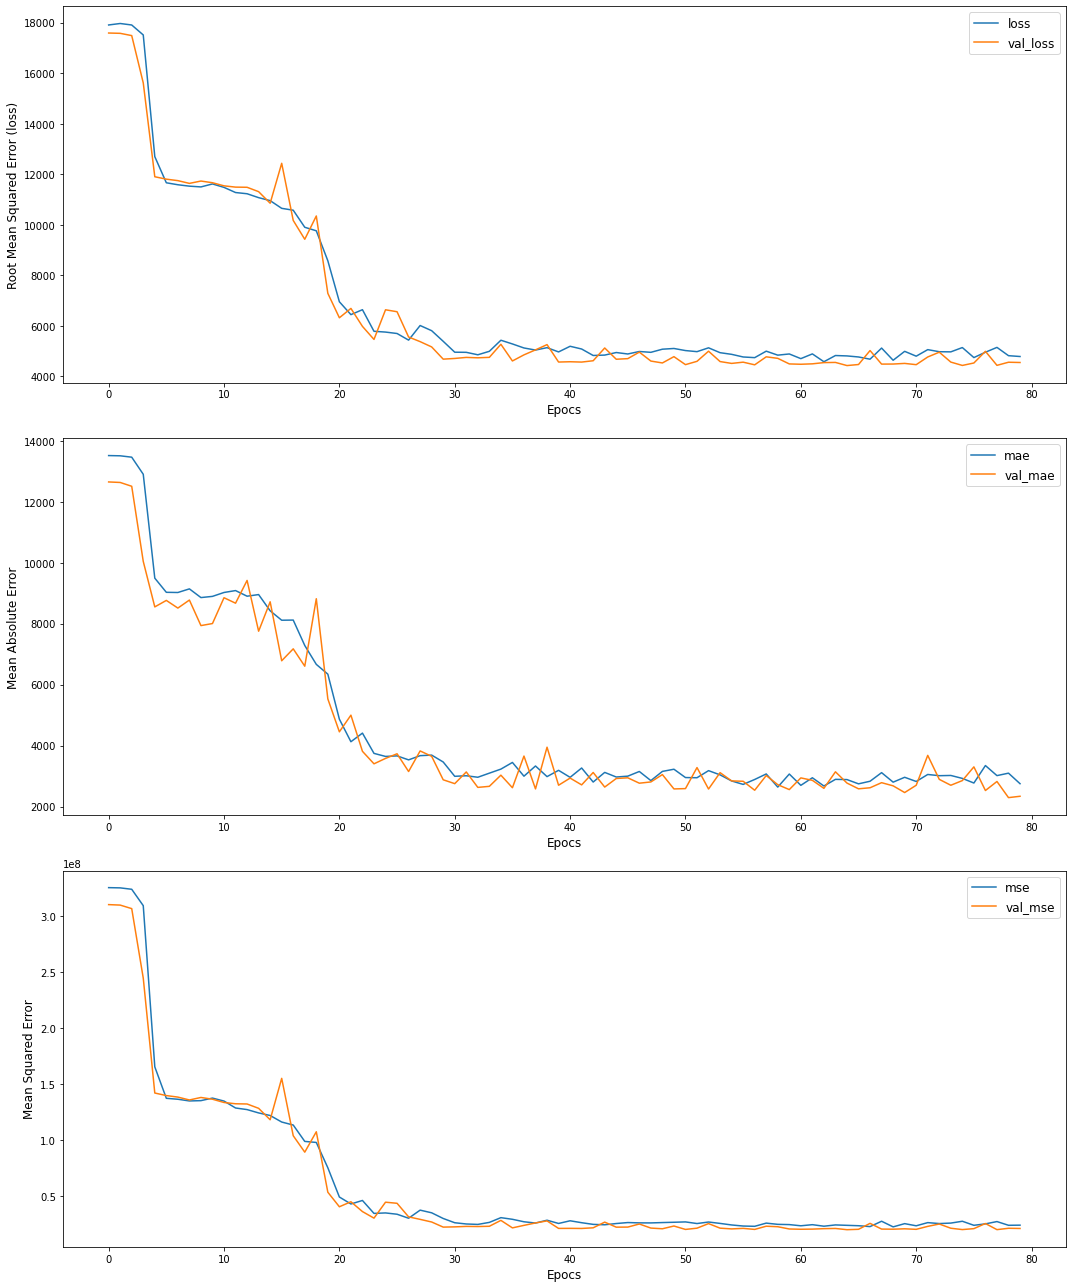

In [443]:
epoc_plots(history54)

In [444]:
y_pred54 = model54.predict(X_test)
r2_score(y_test, y_pred54) 

0.8692270530941013

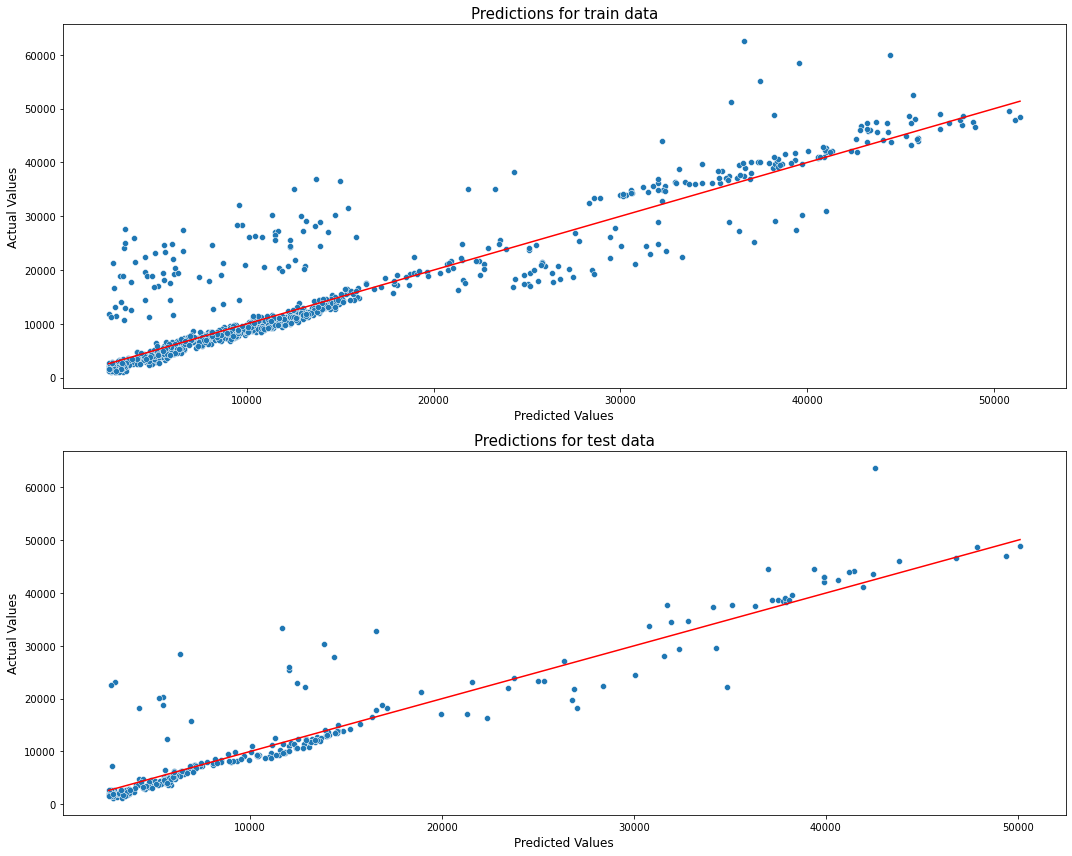

In [445]:
regression_plots(y_pred54, model54)

In [446]:
check_min_max(y_pred54)

Predicted values

max: 50122.75
min: 2619.304931640625

Actual values

max: 63770.42801
min: 1131.5066


In [447]:
# I feel like total param needs to be slightly 
# more than 14k for the model to perform better
# might be wrong though 
# need to experiment more here

In [448]:
# I feel like I've made a huge progress today 
# I've figured out why the model was not learning before
# and now I know how to stop a model from not learning
